In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('merged_data.csv')

In [ ]:

datatrainset, datatestset =train_test_split(data,test_size=0.2,random_state=0)

In [ ]:

datatrainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4660 entries, 192 to 2732
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   @timestamp           4660 non-null   object 
 1   general              0 non-null      float64
 2   general_application  4660 non-null   object 
 3   general_device_name  4660 non-null   object 
 4   general_full_id      4660 non-null   object 
 5   general_ip           4660 non-null   object 
 6   general_mac          4660 non-null   object 
 7   mqtt                 0 non-null      float64
 8   mqtt_duplicate       4660 non-null   bool   
 9   mqtt_message_id      4660 non-null   int64  
 10  mqtt_message_type    4660 non-null   object 
 11  mqtt_message_value   4636 non-null   object 
 12  mqtt_qos             4660 non-null   int64  
 13  mqtt_retained        4660 non-null   bool   
 14  mqtt_topic           4660 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(

In [ ]:

datatrainset.head(10)

,@timestamp,general,general_application,general_device_name,general_full_id,general_ip,general_mac,mqtt,mqtt_duplicate,mqtt_message_id,mqtt_message_type,mqtt_message_value,mqtt_qos,mqtt_retained,mqtt_topic
192,2025-01-24T18:28:29.278Z,NaN,Weather,ard-w-01,08:B6:1F:82:12:30_192.168.1.10_iiot/weather/an...,192.168.1.10,08:B6:1F:82:12:30,NaN,False,0,numeric,41.59,0,False,iiot/weather/analogtemp
2896,2025-01-24T18:22:06.607Z,NaN,Weather,ard-w-01,08:B6:1F:82:12:30_192.168.1.10_iiot/weather/bm...,192.168.1.10,08:B6:1F:82:12:30,NaN,False,0,numeric,74.11,0,False,iiot/weather/bmp180/altitude
4410,2025-01-24T18:25:06.381Z,NaN,Light-Gesture-Proximity,ard-w-15,8C:AA:B5:8A:A9:B4_192.168.1.18_iiot/light/rgb,192.168.1.18,8C:AA:B5:8A:A9:B4,NaN,False,0,array,"249.0, 336.0, 336.0",0,False,iiot/light/rgb
3700,2025-01-24T18:22:05.211Z,NaN,Steam,ard-w-08,08:B6:1F:81:D2:CC_192.168.1.13_iiot/steam,192.168.1.13,08:B6:1F:81:D2:CC,NaN,False,0,numeric,0.0,0,False,iiot/steam
1003,2025-01-24T18:28:22.534Z,NaN,Steam,ard-w-08,08:B6:1F:81:D2:CC_192.168.1.13_iiot/steam,192.168.1.13,08:B6:1F:81:D2:CC,NaN,False,0,numeric,9.0,0,False,iiot/steam
463,2025-01-24T18:28:04.045Z,NaN,Weather,ard-w-01,08:B6:1F:82:12:30_192.168.1.10_iiot/weather/bm...,192.168.1.10,08:B6:1F:82:12:30,NaN,False,0,numeric,74.53,0,False,iiot/weather/bmp180/altitude
541,2025-01-24T18:28:17.786Z,NaN,Proximity-Collision,ard-w-11,08:B6:1F:82:EF:30_192.168.1.20_iiot/proximity/...,192.168.1.20,08:B6:1F:82:EF:30,NaN,False,0,array,"20.0, 2.0",0,False,iiot/proximity/ambient/ch
4550,2025-01-24T18:25:28.807Z,NaN,Water,ard-w-06,08:B6:1F:84:66:78_192.168.1.11_iiot/water,192.168.1.11,08:B6:1F:84:66:78,NaN,False,0,numeric,1023.0,0,False,iiot/water
2308,2025-01-24T18:38:59.743Z,NaN,Flame,ard-w-13,08:B6:1F:82:EE:CC_192.168.1.23_iiot/flame,192.168.1.23,08:B6:1F:82:EE:CC,NaN,False,0,numeric,0.0,0,False,iiot/flame
1595,2025-01-24T18:39:13.862Z,NaN,Weather,ard-w-01,08:B6:1F:82:12:30_192.168.1.10_iiot/weather/bm...,192.168.1.10,08:B6:1F:82:12:30,NaN,False,0,numeric,100434.0,0,False,iiot/weather/bmp180/pressure


In [ ]:

datatrainset.shape

(4660, 15)

In [ ]:

datatrainset.columns

Index(['@timestamp', 'general', 'general_application', 'general_device_name',
       'general_full_id', 'general_ip', 'general_mac', 'mqtt',
       'mqtt_duplicate', 'mqtt_message_id', 'mqtt_message_type',
       'mqtt_message_value', 'mqtt_qos', 'mqtt_retained', 'mqtt_topic'],
      dtype='object')

In [ ]:

pd.set_option('display.float_format', '{:.2f}'.format)
datatrainset.describe()

,general,mqtt,mqtt_message_id,mqtt_qos
count,0.00,0.00,4660.00,4660.00
mean,NaN,NaN,0.00,0.00
std,NaN,NaN,0.00,0.00
min,NaN,NaN,0.00,0.00
25%,NaN,NaN,0.00,0.00
50%,NaN,NaN,0.00,0.00
75%,NaN,NaN,0.00,0.00
max,NaN,NaN,0.00,0.00


In [ ]:

datatrainset.dtypes

,0
@timestamp,object
general,float64
general_application,object
general_device_name,object
general_full_id,object
general_ip,object
general_mac,object
mqtt,float64
mqtt_duplicate,bool
mqtt_message_id,int64


In [ ]:
print("Types de données :\n\n", datatrainset.dtypes.value_counts())

Types de données :

 object     9
float64    2
bool       2
int64      2
Name: count, dtype: int64


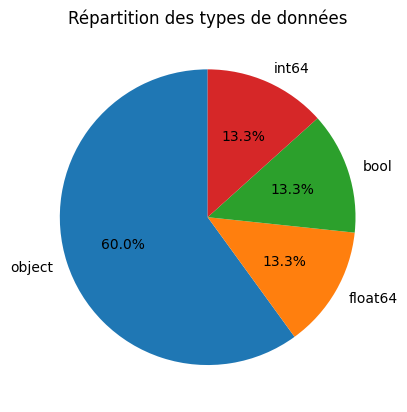

In [ ]:

datatrainset.dtypes.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Répartition des types de données")
plt.ylabel("")
plt.show()

In [ ]:
!pip install missingno

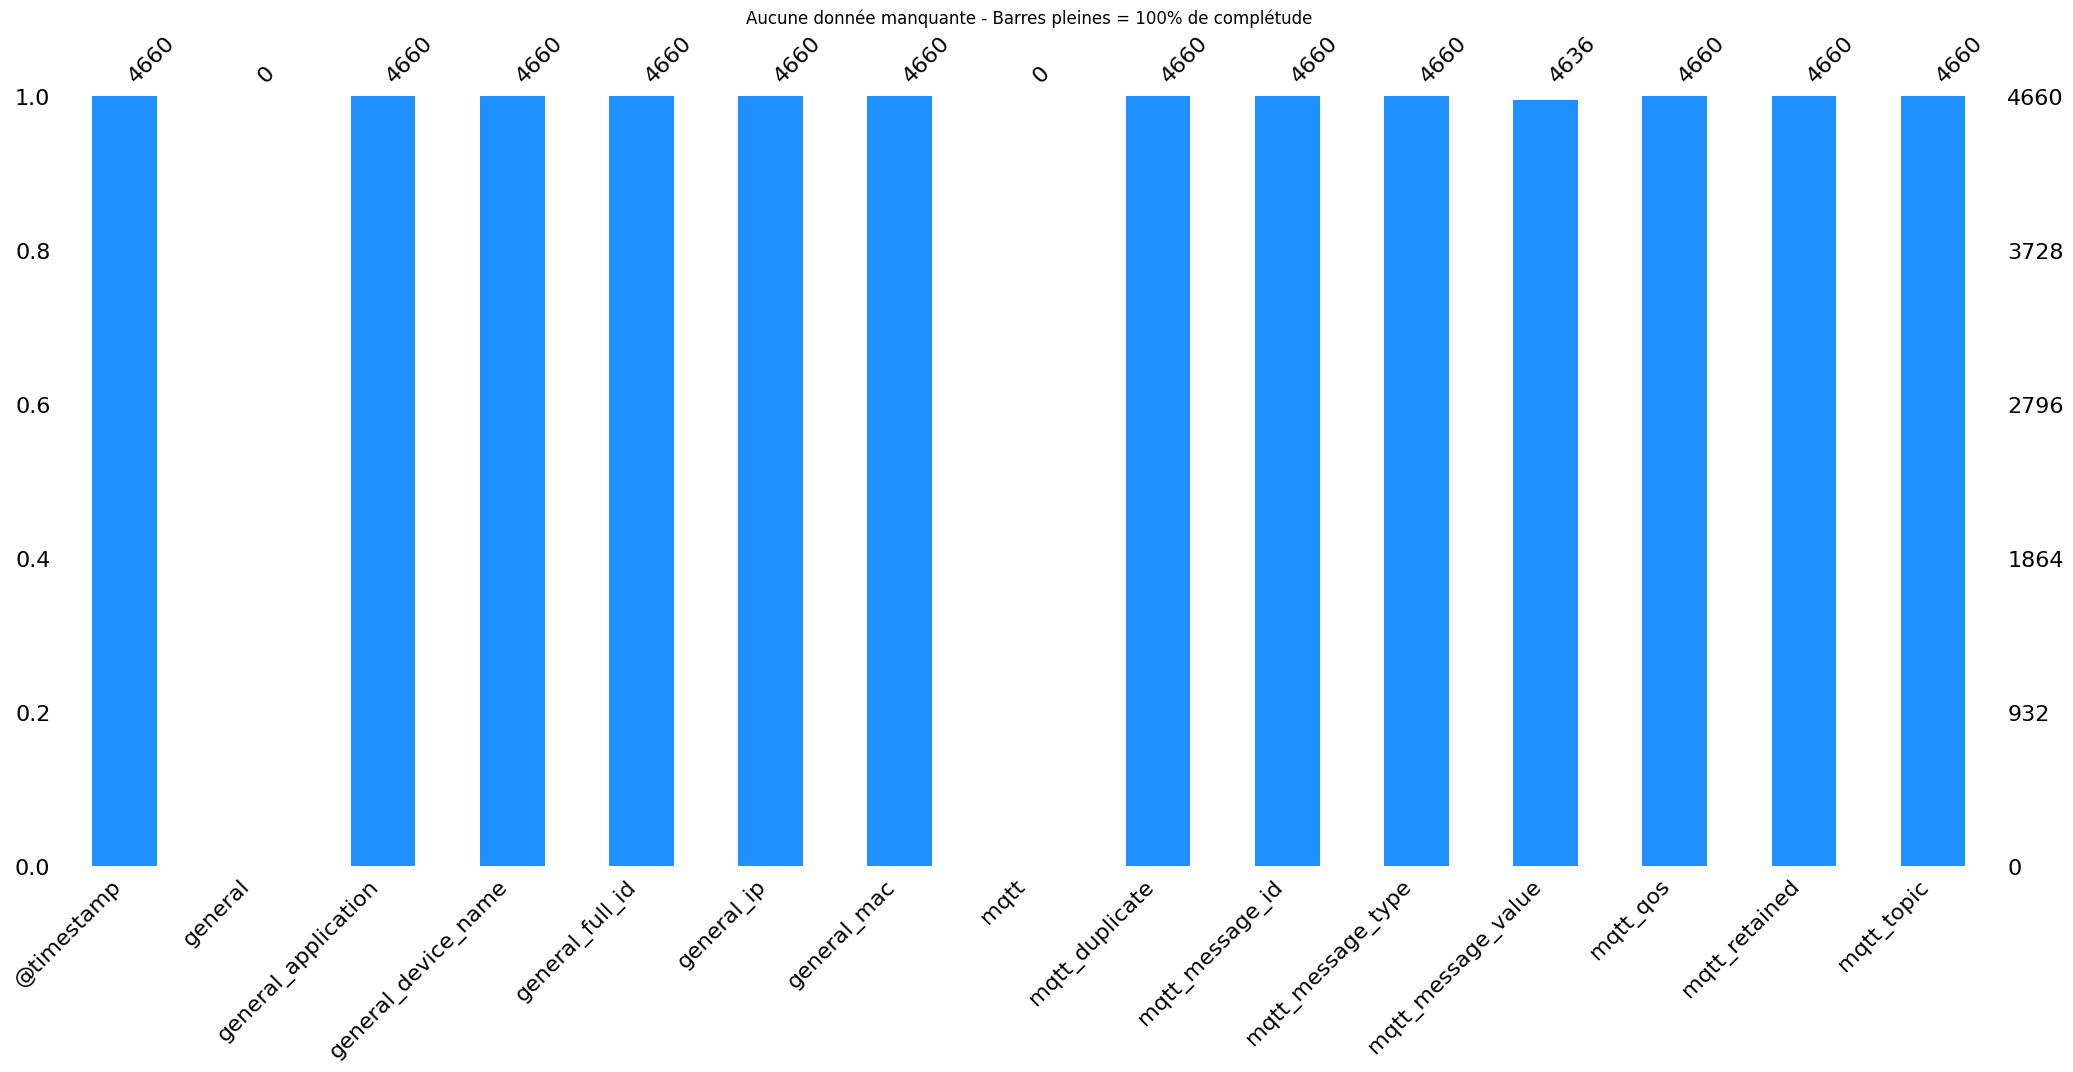

In [ ]:

import missingno as msno
msno.bar(datatrainset, color="dodgerblue")
plt.title("Aucune donnée manquante - Barres pleines = 100% de complétude")
plt.show()

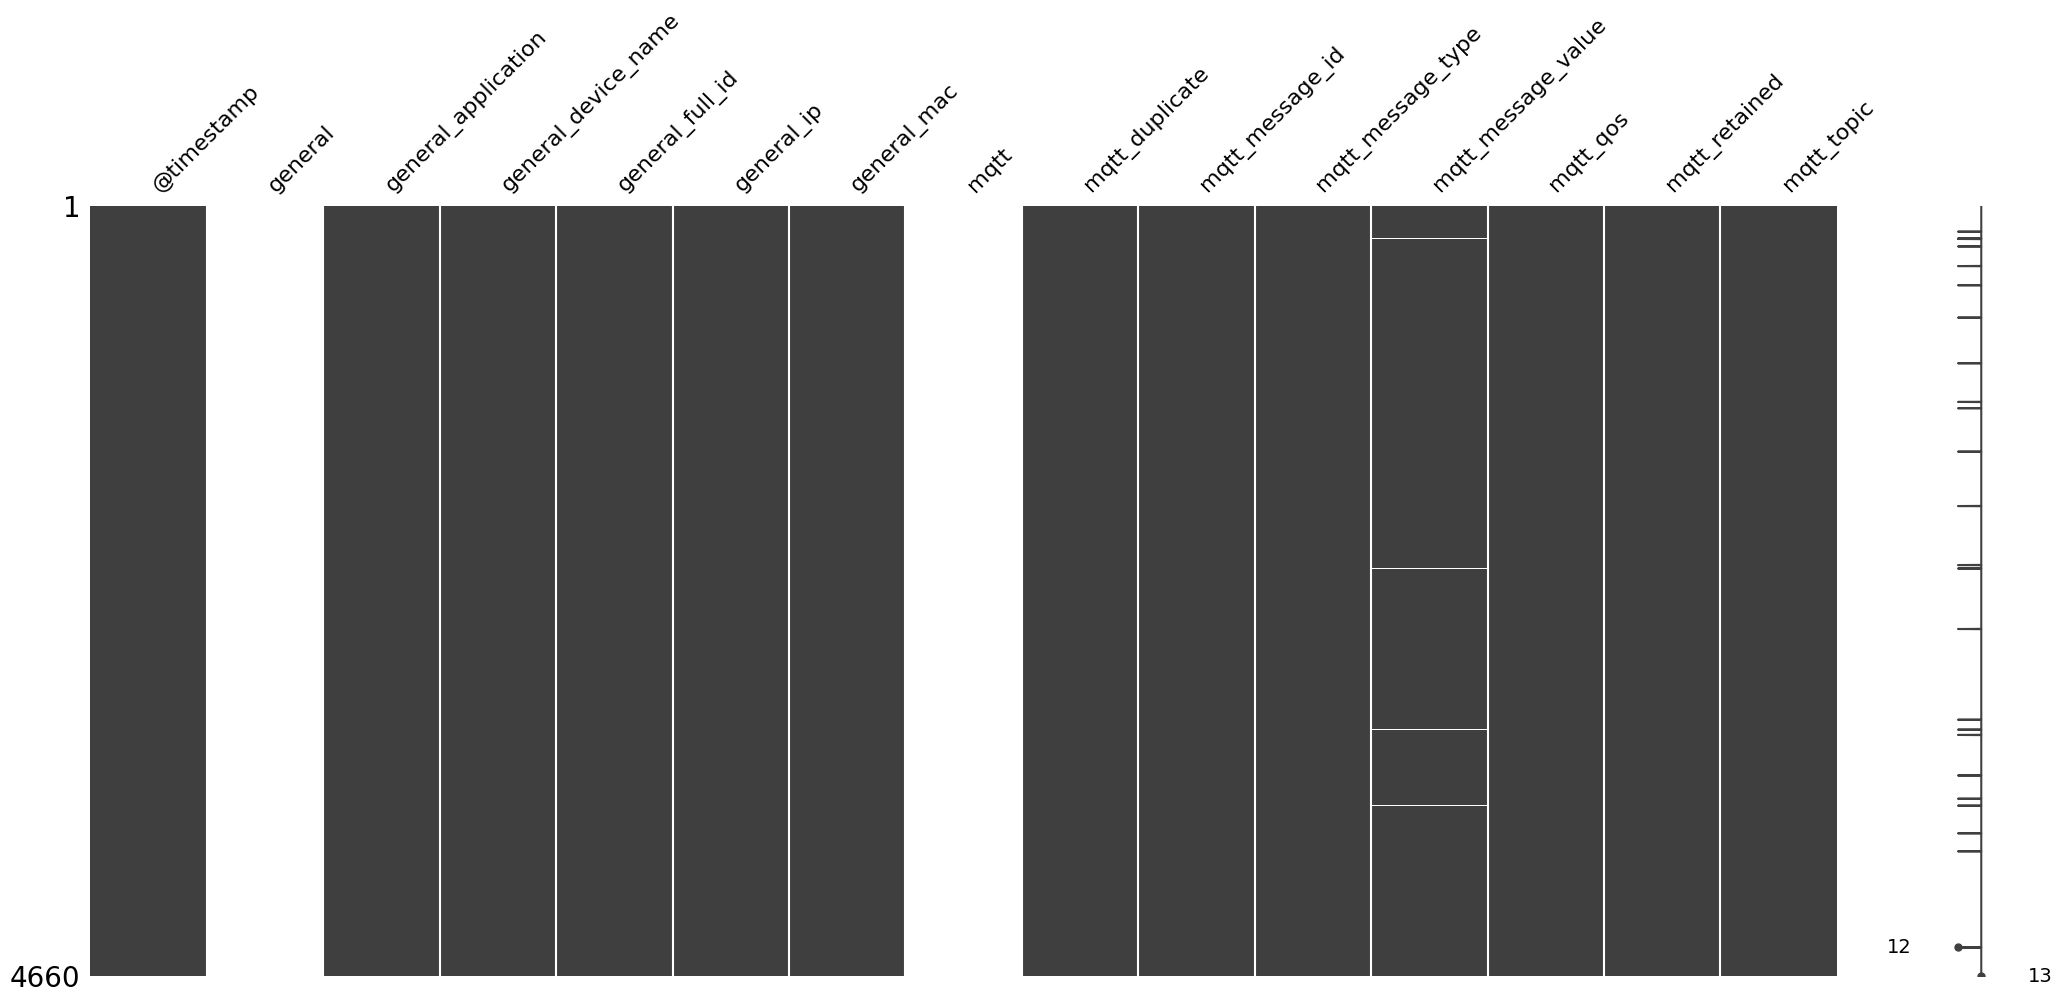

In [ ]:

msno.matrix(datatrainset)
plt.show()

In [ ]:
missing_values_count = datatrainset.isnull().sum()
columns_to_drop = missing_values_count[missing_values_count > 50].index.tolist()

if columns_to_drop:
    print(f"Dropping columns with more than 50 missing values: {columns_to_drop}")
    datatrainset = datatrainset.drop(columns=columns_to_drop)
    print("Updated datatrainset shape:", datatrainset.shape)
else:
    print("No columns found with more than 50 missing values.")

Dropping columns with more than 50 missing values: ['general', 'mqtt']
Updated datatrainset shape: (4660, 13)


In [ ]:
datatrainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4660 entries, 192 to 2732
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   @timestamp           4660 non-null   object
 1   general_application  4660 non-null   object
 2   general_device_name  4660 non-null   object
 3   general_full_id      4660 non-null   object
 4   general_ip           4660 non-null   object
 5   general_mac          4660 non-null   object
 6   mqtt_duplicate       4660 non-null   bool  
 7   mqtt_message_id      4660 non-null   int64 
 8   mqtt_message_type    4660 non-null   object
 9   mqtt_message_value   4636 non-null   object
 10  mqtt_qos             4660 non-null   int64 
 11  mqtt_retained        4660 non-null   bool  
 12  mqtt_topic           4660 non-null   object
dtypes: bool(2), int64(2), object(9)
memory usage: 575.0+ KB


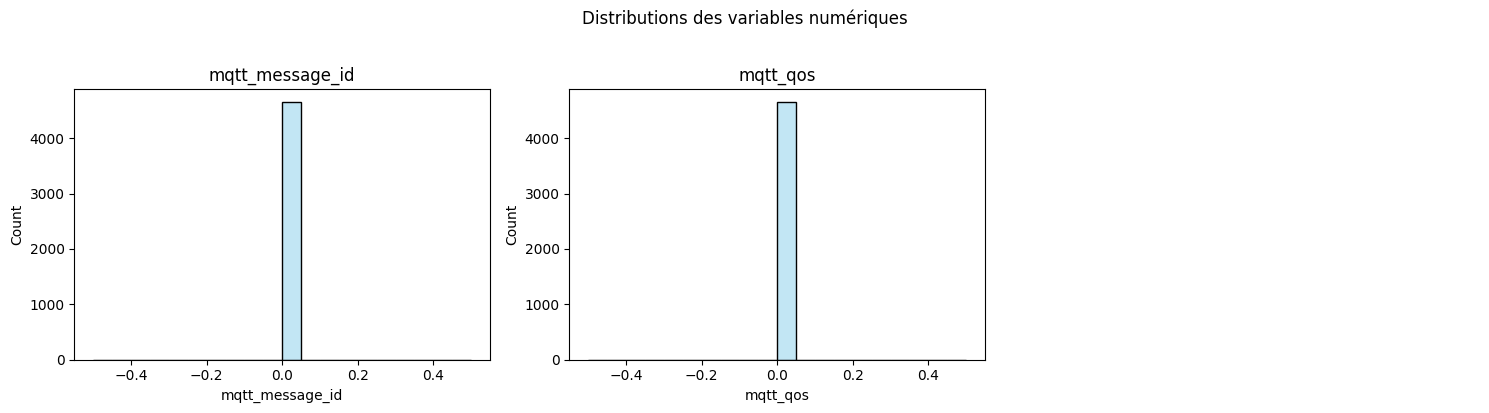

In [ ]:
colonnes_numeriques = datatrainset.select_dtypes(include=['float64', 'int64']).columns
n_colonnes = len(colonnes_numeriques)
n_lignes = (n_colonnes // 3) + (1 if n_colonnes % 3 != 0 else 0)

# Add squeeze=False to always get a 2D array
fig, axs = plt.subplots(n_lignes, 3, figsize=(15, n_lignes * 4), squeeze=False)
fig.suptitle("Distributions des variables numériques", y=1.02)

for i, colonne in enumerate(colonnes_numeriques):
    ligne = i // 3
    colonne_plot = i % 3
    sns.histplot(
        datatrainset[colonne],
        bins=20,
        color='skyblue',
        ax=axs[ligne, colonne_plot],
        edgecolor='black',
        kde=True
    )
    axs[ligne, colonne_plot].set_title(colonne)

# Hide unused subplots
for j in range(i + 1, n_lignes * 3):
    ligne = j // 3
    colonne_plot = j % 3
    axs[ligne, colonne_plot].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Sélectionner les colonnes non numériques
colonnes_categoriques = datatrainset.select_dtypes(include=['object', 'bool']).columns
print(f"Nombre de variables non numériques: {len(colonnes_categoriques)}\n")

# Analyse détaillée de chaque colonne
print("="*80)
print("ANALYSE DES VARIABLES CATÉGORIELLES")
print("="*80)

for col in colonnes_categoriques:
    print(f"\n📊 {col}")
    print("-" * 60)
    print(f"Valeurs uniques: {datatrainset[col].nunique()}")
    print(f"Valeurs manquantes: {datatrainset[col].isna().sum()} ({datatrainset[col].isna().sum()/len(datatrainset)*100:.2f}%)")

    if datatrainset[col].nunique() <= 20:  # Afficher si peu de valeurs
        print(f"\nDistribution des valeurs:")
        print(datatrainset[col].value_counts())
    else:
        print(f"\nTop 10 valeurs les plus fréquentes:")
        print(datatrainset[col].value_counts().head(10))

Nombre de variables non numériques: 11

ANALYSE DES VARIABLES CATÉGORIELLES

📊 @timestamp
------------------------------------------------------------
Valeurs uniques: 3590
Valeurs manquantes: 0 (0.00%)

Top 10 valeurs les plus fréquentes:
@timestamp
2025-01-24T18:28:52.168Z    11
2025-01-24T18:22:01.549Z    10
2025-01-24T18:28:52.169Z     9
2025-01-24T18:22:01.551Z     9
2025-01-24T18:22:01.550Z     8
2025-01-24T18:24:37.822Z     6
2025-01-24T18:28:05.190Z     6
2025-01-24T18:24:37.789Z     6
2025-01-24T18:24:37.791Z     6
2025-01-24T18:25:22.841Z     6
Name: count, dtype: int64

📊 general_application
------------------------------------------------------------
Valeurs uniques: 14
Valeurs manquantes: 0 (0.00%)

Distribution des valeurs:
general_application
Weather                    1499
Light-Gesture-Proximity     678
Sound                       468
Accelerometer-Gyroscope     461
Gas                         437
Ultrasonic                  249
Steam                       247
Water   

Colonnes à visualiser:  ['general_application', 'general_device_name', 'general_ip', 'general_mac', 'mqtt_duplicate', 'mqtt_message_type', 'mqtt_retained']
Nombre total:  7


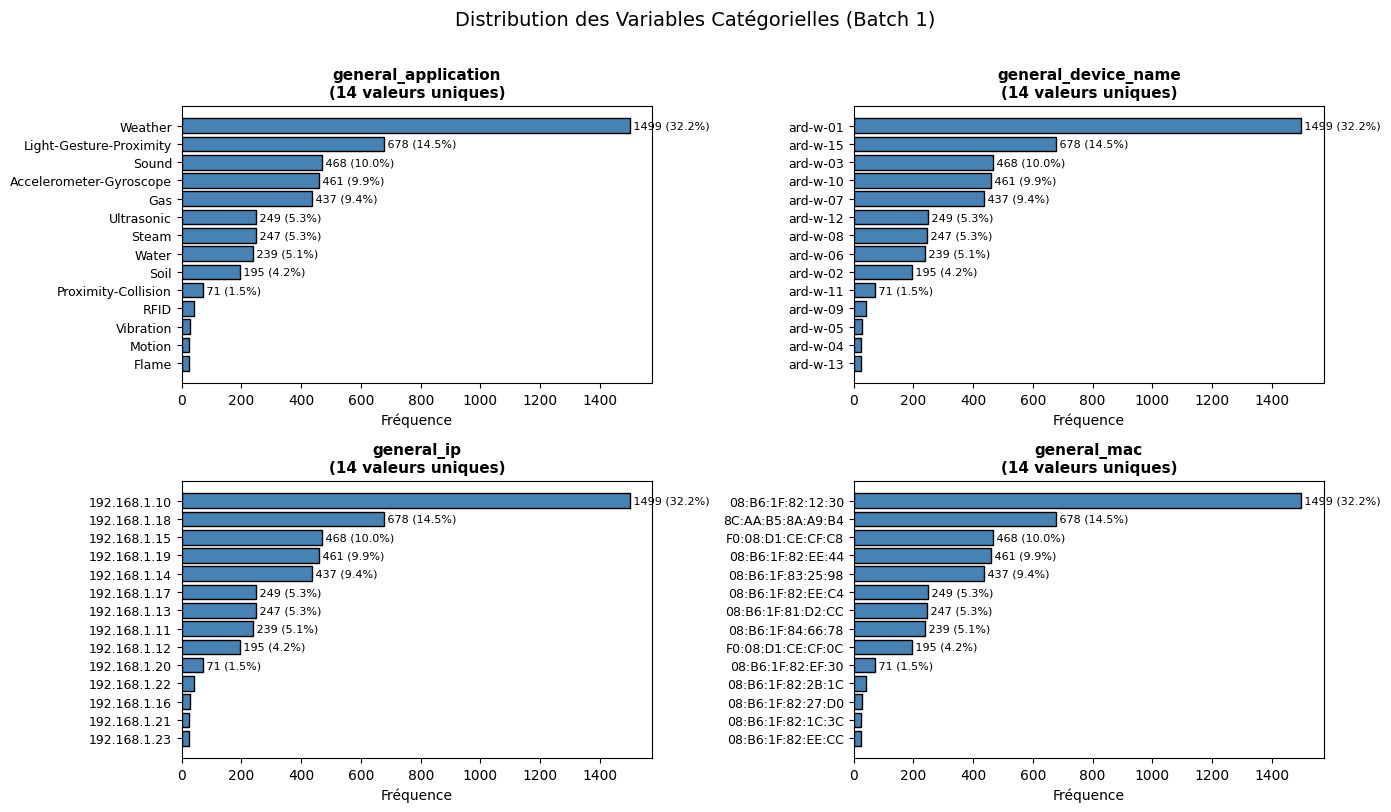

✅ Batch 1 affiché et mémoire libérée


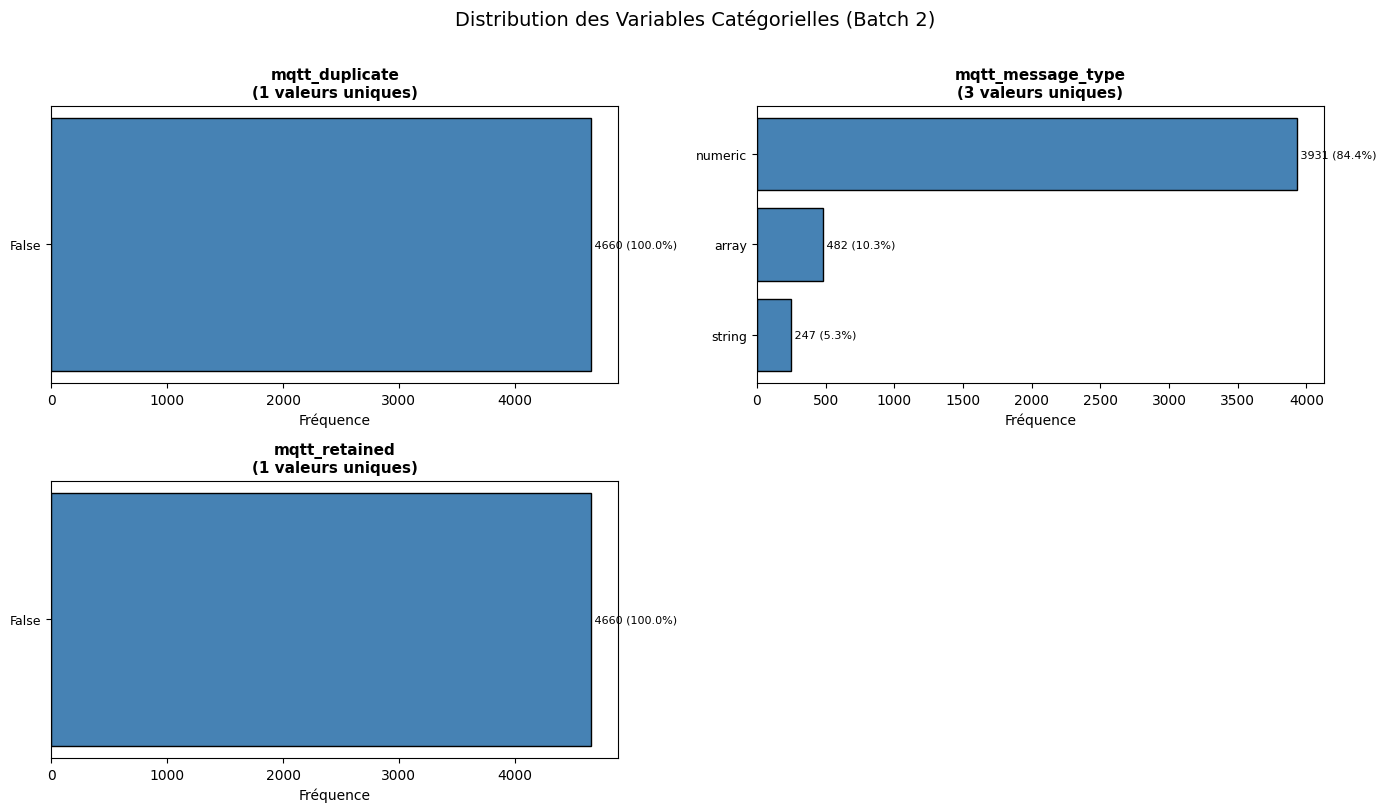

✅ Batch 2 affiché et mémoire libérée


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc  # Garbage collector pour libérer la RAM

# Sélectionner les colonnes catégorielles
colonnes_categoriques = datatrainset.select_dtypes(include=['object', 'bool']).columns

# Séparer les colonnes par nombre de valeurs uniques
colonnes_peu_valeurs = [col for col in colonnes_categoriques
                        if datatrainset[col]. nunique() <= 15 and col != '@timestamp']

print(f"Colonnes à visualiser:  {colonnes_peu_valeurs}")
print(f"Nombre total:  {len(colonnes_peu_valeurs)}")

# OPTION 1: Afficher par lots de 4 graphiques pour économiser la RAM
def plot_categorical_batch(columns, data, batch_size=4):
    """Affiche les variables catégorielles par lots"""

    for batch_start in range(0, len(columns), batch_size):
        batch_cols = columns[batch_start:batch_start + batch_size]
        n_cols_batch = len(batch_cols)
        n_lignes = (n_cols_batch // 2) + (1 if n_cols_batch % 2 != 0 else 0)

        fig, axs = plt.subplots(n_lignes, 2, figsize=(14, n_lignes * 4), squeeze=False)
        fig.suptitle(f"Distribution des Variables Catégorielles (Batch {batch_start//batch_size + 1})",
                     fontsize=14, y=1.01)

        for i, col in enumerate(batch_cols):
            ligne = i // 2
            colonne_plot = i % 2

            # Compter les valeurs (limiter à top 20 pour économiser la mémoire)
            value_counts = data[col].value_counts().head(20)

            # Utiliser matplotlib.bar au lieu de seaborn (plus léger)
            axs[ligne, colonne_plot].barh(
                range(len(value_counts)),
                value_counts.values,
                color='steelblue',
                edgecolor='black'
            )

            # Labels
            axs[ligne, colonne_plot].set_yticks(range(len(value_counts)))
            axs[ligne, colonne_plot].set_yticklabels(value_counts.index, fontsize=9)
            axs[ligne, colonne_plot].set_title(
                f'{col}\n({data[col].nunique()} valeurs uniques)',
                fontsize=11, fontweight='bold'
            )
            axs[ligne, colonne_plot].set_xlabel('Fréquence', fontsize=10)
            axs[ligne, colonne_plot]. invert_yaxis()

            # Ajouter les pourcentages (seulement pour les 10 premiers)
            total = len(data)
            for j, v in enumerate(value_counts.values[: 10]):
                axs[ligne, colonne_plot].text(
                    v, j, f' {v} ({v/total*100:.1f}%)',
                    va='center', fontsize=8
                )

        # Masquer les subplots non utilisés
        for j in range(i + 1, n_lignes * 2):
            ligne = j // 2
            colonne_plot = j % 2
            axs[ligne, colonne_plot].axis('off')

        plt.tight_layout()
        plt.show()

        # IMPORTANT: Libérer la mémoire
        plt.close(fig)
        gc.collect()

        print(f"✅ Batch {batch_start//batch_size + 1} affiché et mémoire libérée")

# Appeler la fonction
plot_categorical_batch(colonnes_peu_valeurs, datatrainset, batch_size=4)

⏳ Conversion des timestamps...
⏳ Extraction des informations temporelles...
📊 Graphique 1/4:  Distribution par heure...
📊 Graphique 2/4: Distribution par jour...
📊 Graphique 3/4: Timeline...
📊 Graphique 4/4: Heatmap...


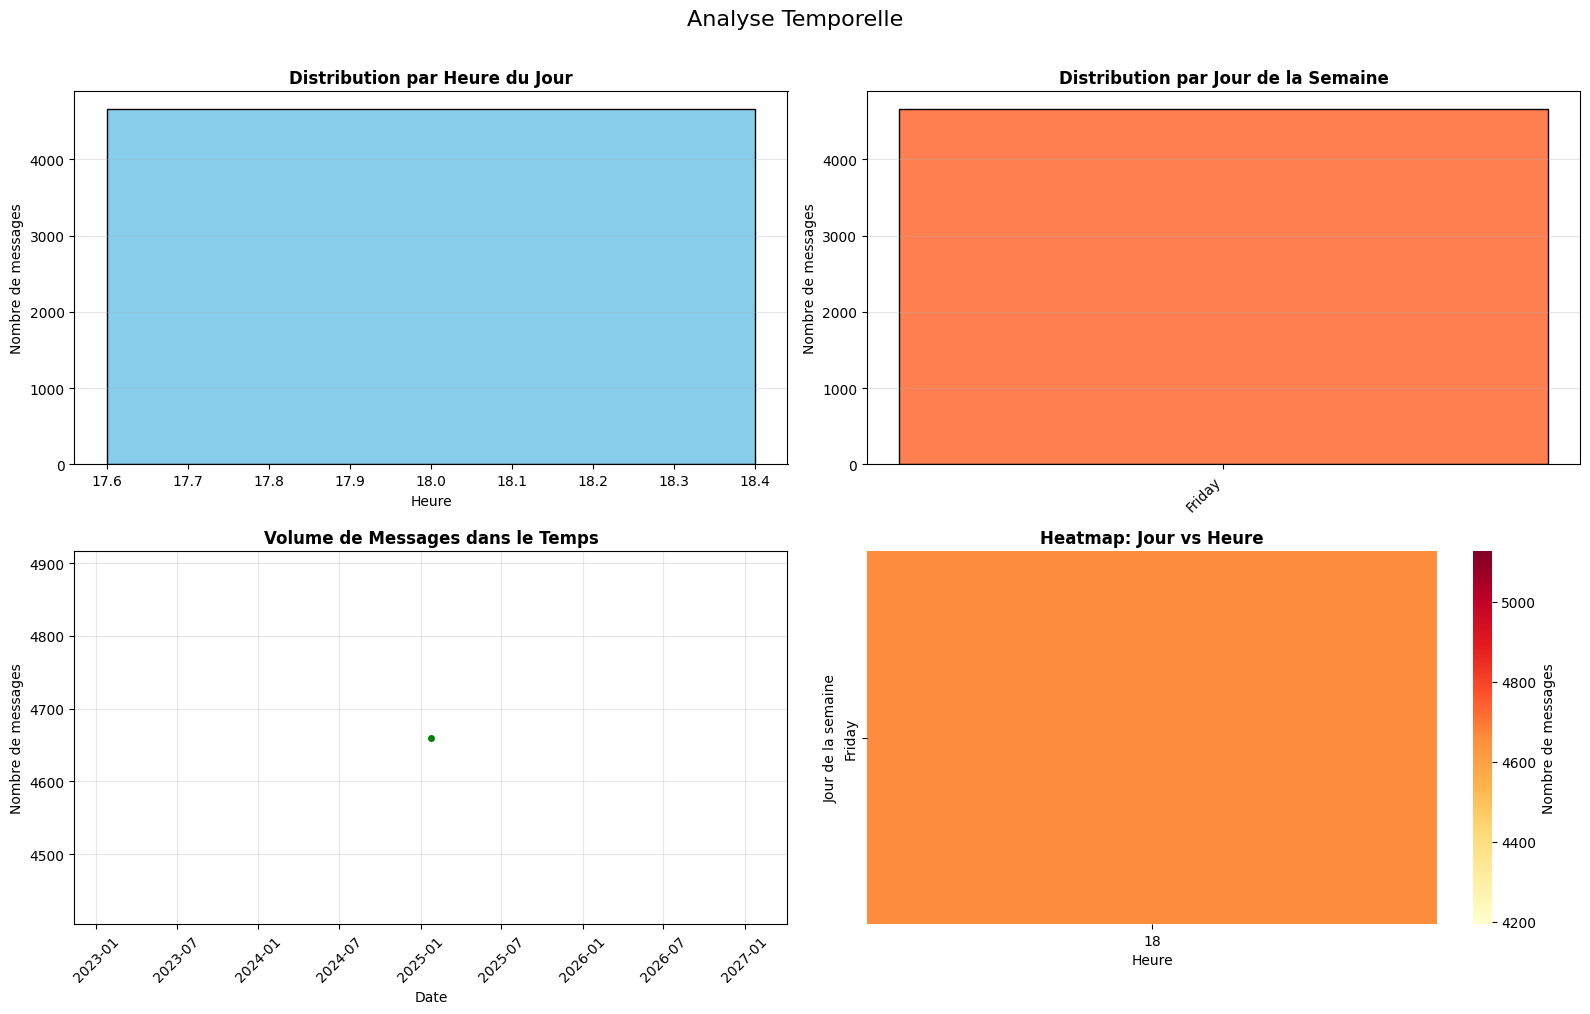


📅 Statistiques temporelles:
Première date: 2025-01-24 18:07:13.305000+00:00
Dernière date: 2025-01-24 18:39:27.308000+00:00
Période: 0 jours
✅ Mémoire libérée


In [ ]:

# Convertir @timestamp en datetime (optimisé)
print("⏳ Conversion des timestamps...")
datatrainset['timestamp_parsed'] = pd.to_datetime(datatrainset['@timestamp'], errors='coerce')

# Extraire uniquement les infos nécessaires (sans stocker toutes les colonnes)
print("⏳ Extraction des informations temporelles...")
datatrainset['hour'] = datatrainset['timestamp_parsed'].dt.hour
datatrainset['day_of_week'] = datatrainset['timestamp_parsed'].dt.day_name()

# Pour la date, on va l'utiliser directement sans la stocker
date_temp = datatrainset['timestamp_parsed'].dt.date

# Visualisations temporelles
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Analyse Temporelle", fontsize=16, y=1.01)

# 1. Distribution par heure
print("📊 Graphique 1/4:  Distribution par heure...")
hour_counts = datatrainset['hour'].value_counts().sort_index()
axs[0, 0].bar(hour_counts.index, hour_counts.values, color='skyblue', edgecolor='black')
axs[0, 0]. set_title('Distribution par Heure du Jour', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel('Heure')
axs[0, 0].set_ylabel('Nombre de messages')
axs[0, 0].grid(axis='y', alpha=0.3)

# 2. Distribution par jour de la semaine
print("📊 Graphique 2/4: Distribution par jour...")
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = datatrainset['day_of_week']. value_counts()
day_counts = day_counts.reindex([d for d in day_order if d in day_counts.index])
axs[0, 1]. bar(range(len(day_counts)), day_counts.values, color='coral', edgecolor='black')
axs[0, 1].set_xticks(range(len(day_counts)))
axs[0, 1].set_xticklabels(day_counts.index, rotation=45, ha='right')
axs[0, 1].set_title('Distribution par Jour de la Semaine', fontsize=12, fontweight='bold')
axs[0, 1].set_ylabel('Nombre de messages')
axs[0, 1]. grid(axis='y', alpha=0.3)

# 3. Timeline (messages par date) - Optimisé
print("📊 Graphique 3/4: Timeline...")
date_counts = pd.Series(date_temp).value_counts().sort_index()
axs[1, 0].plot(date_counts.index, date_counts.values, marker='o', color='green', linewidth=2, markersize=4)
axs[1, 0].set_title('Volume de Messages dans le Temps', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel('Date')
axs[1, 0]. set_ylabel('Nombre de messages')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(alpha=0.3)

# 4. Heatmap: Jour vs Heure - Optimisé
print("📊 Graphique 4/4: Heatmap...")
heatmap_data = datatrainset.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex([d for d in day_order if d in heatmap_data.index])
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, ax=axs[1, 1],
            cbar_kws={'label': 'Nombre de messages'}, linewidths=0)
axs[1, 1].set_title('Heatmap: Jour vs Heure', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel('Heure')
axs[1, 1].set_ylabel('Jour de la semaine')

plt.tight_layout()
plt.show()

# Statistiques temporelles
print("\n📅 Statistiques temporelles:")
first_date = datatrainset['timestamp_parsed'].min()
last_date = datatrainset['timestamp_parsed'].max()
print(f"Première date: {first_date}")
print(f"Dernière date: {last_date}")
print(f"Période: {(last_date - first_date).days} jours")

# Nettoyer la mémoire - Supprimer les colonnes temporaires
del date_temp, hour_counts, day_counts, date_counts, heatmap_data
gc.collect()
print("✅ Mémoire libérée")

⏳ Analyse des IPs et MACs...
📊 Graphique 1/4: Top IPs...
📊 Graphique 2/4: Distribution requêtes/IP...
📊 Graphique 3/4: Top MACs...
📊 Graphique 4/4: Top Devices...


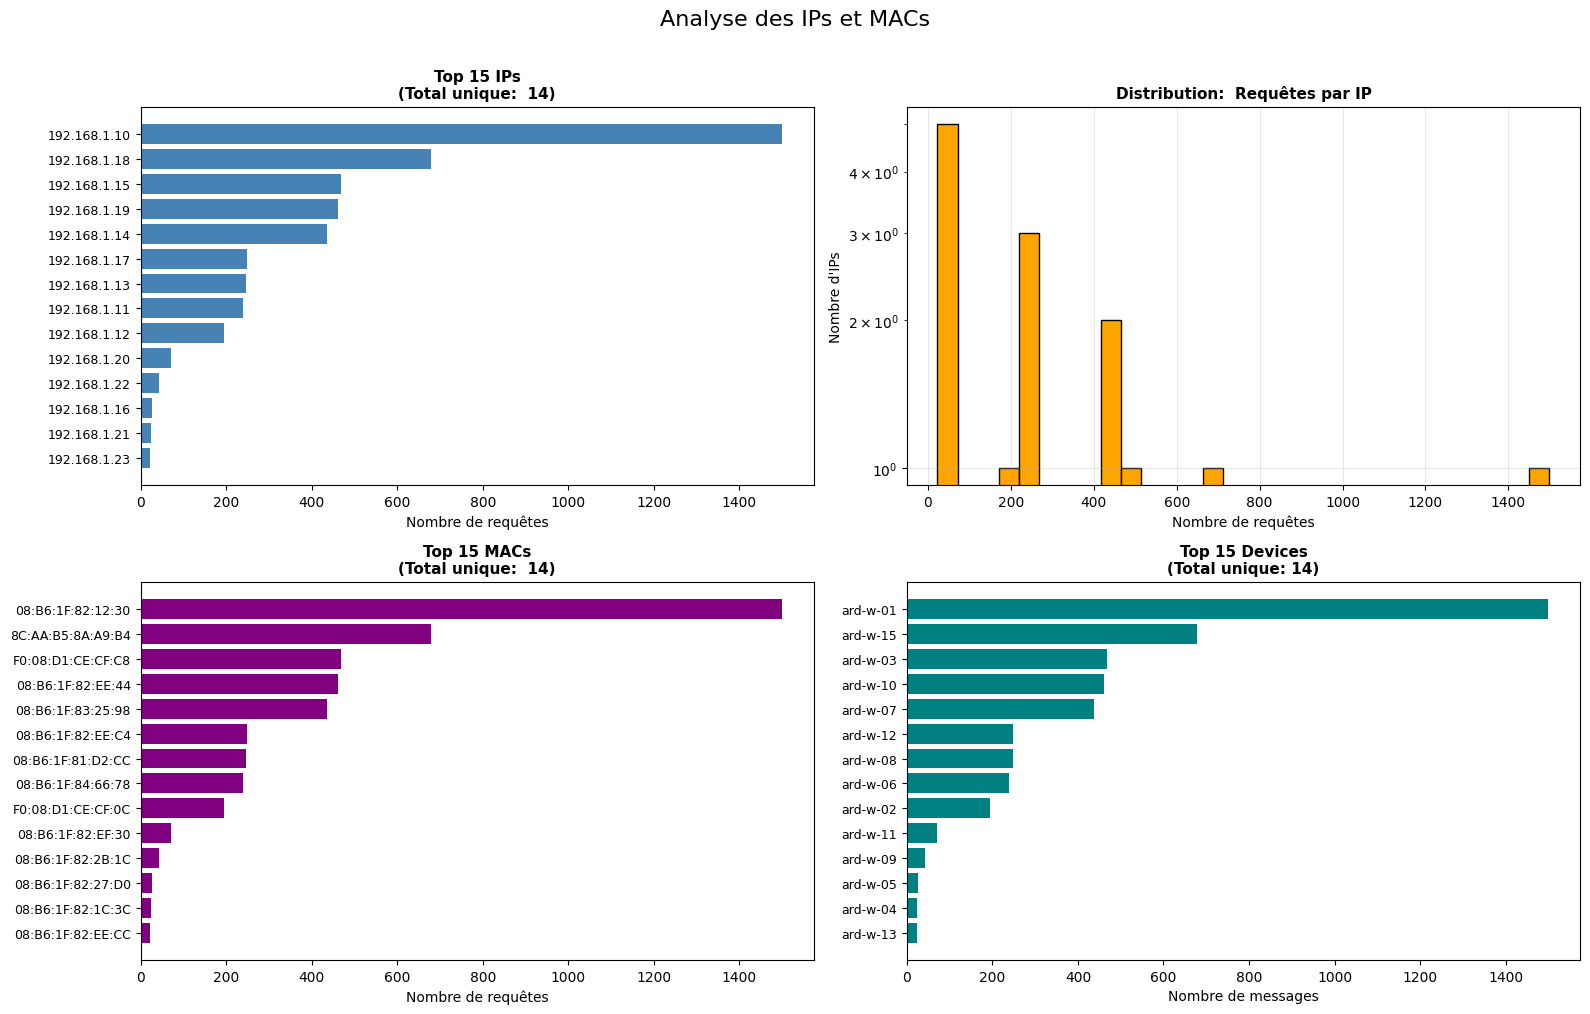


🌐 Statistiques IPs:
IPs uniques: 14
Moyenne de requêtes par IP: 332.86
IP la plus active: 192.168.1.10 (1499 requêtes)

📱 Statistiques MACs:
MACs uniques: 14
Devices uniques: 14
✅ Mémoire libérée


In [ ]:


print("⏳ Analyse des IPs et MACs...")

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Analyse des IPs et MACs", fontsize=16, y=1.01)

# 1. Top IPs (limité à 15 pour économiser la RAM)
print("📊 Graphique 1/4: Top IPs...")
top_ips = datatrainset['general_ip'].value_counts().head(15)
axs[0, 0].barh(range(len(top_ips)), top_ips.values, color='steelblue')
axs[0, 0].set_yticks(range(len(top_ips)))
axs[0, 0].set_yticklabels(top_ips.index, fontsize=9)
axs[0, 0].set_title(f'Top 15 IPs\n(Total unique:  {datatrainset["general_ip"]. nunique()})',
                     fontsize=11, fontweight='bold')
axs[0, 0].set_xlabel('Nombre de requêtes')
axs[0, 0].invert_yaxis()

# 2. Distribution du nombre de requêtes par IP
print("📊 Graphique 2/4: Distribution requêtes/IP...")
ip_counts = datatrainset['general_ip']. value_counts()
axs[0, 1].hist(ip_counts.values, bins=30, color='orange', edgecolor='black')
axs[0, 1]. set_title('Distribution:  Requêtes par IP', fontsize=11, fontweight='bold')
axs[0, 1].set_xlabel('Nombre de requêtes')
axs[0, 1].set_ylabel("Nombre d'IPs")
axs[0, 1]. set_yscale('log')
axs[0, 1]. grid(alpha=0.3)

# 3. Top MACs
print("📊 Graphique 3/4: Top MACs...")
top_macs = datatrainset['general_mac']. value_counts().head(15)
axs[1, 0].barh(range(len(top_macs)), top_macs.values, color='purple')
axs[1, 0].set_yticks(range(len(top_macs)))
axs[1, 0].set_yticklabels(top_macs.index, fontsize=9)
axs[1, 0].set_title(f'Top 15 MACs\n(Total unique:  {datatrainset["general_mac"].nunique()})',
                     fontsize=11, fontweight='bold')
axs[1, 0].set_xlabel('Nombre de requêtes')
axs[1, 0].invert_yaxis()

# 4. Top Devices
print("📊 Graphique 4/4: Top Devices...")
top_devices = datatrainset['general_device_name'].value_counts().head(15)
axs[1, 1].barh(range(len(top_devices)), top_devices.values, color='teal')
axs[1, 1].set_yticks(range(len(top_devices)))
axs[1, 1].set_yticklabels(top_devices.index, fontsize=9)
axs[1, 1].set_title(f'Top 15 Devices\n(Total unique: {datatrainset["general_device_name"].nunique()})',
                     fontsize=11, fontweight='bold')
axs[1, 1].set_xlabel('Nombre de messages')
axs[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Statistiques détaillées
print("\n🌐 Statistiques IPs:")
print(f"IPs uniques: {datatrainset['general_ip'].nunique()}")
print(f"Moyenne de requêtes par IP: {len(datatrainset) / datatrainset['general_ip'].nunique():.2f}")
print(f"IP la plus active: {top_ips.index[0]} ({top_ips.values[0]} requêtes)")

print("\n📱 Statistiques MACs:")
print(f"MACs uniques: {datatrainset['general_mac'].nunique()}")
print(f"Devices uniques: {datatrainset['general_device_name'].nunique()}")

# Nettoyer
del top_ips, ip_counts, top_macs, top_devices
gc.collect()
print("✅ Mémoire libérée")

⏳ Analyse MQTT...
📊 Graphique 1/4: Types de messages...
📊 Graphique 2/4: Top topics...
📊 Graphique 3/4: Duplicates...
📊 Graphique 4/4: Retained...


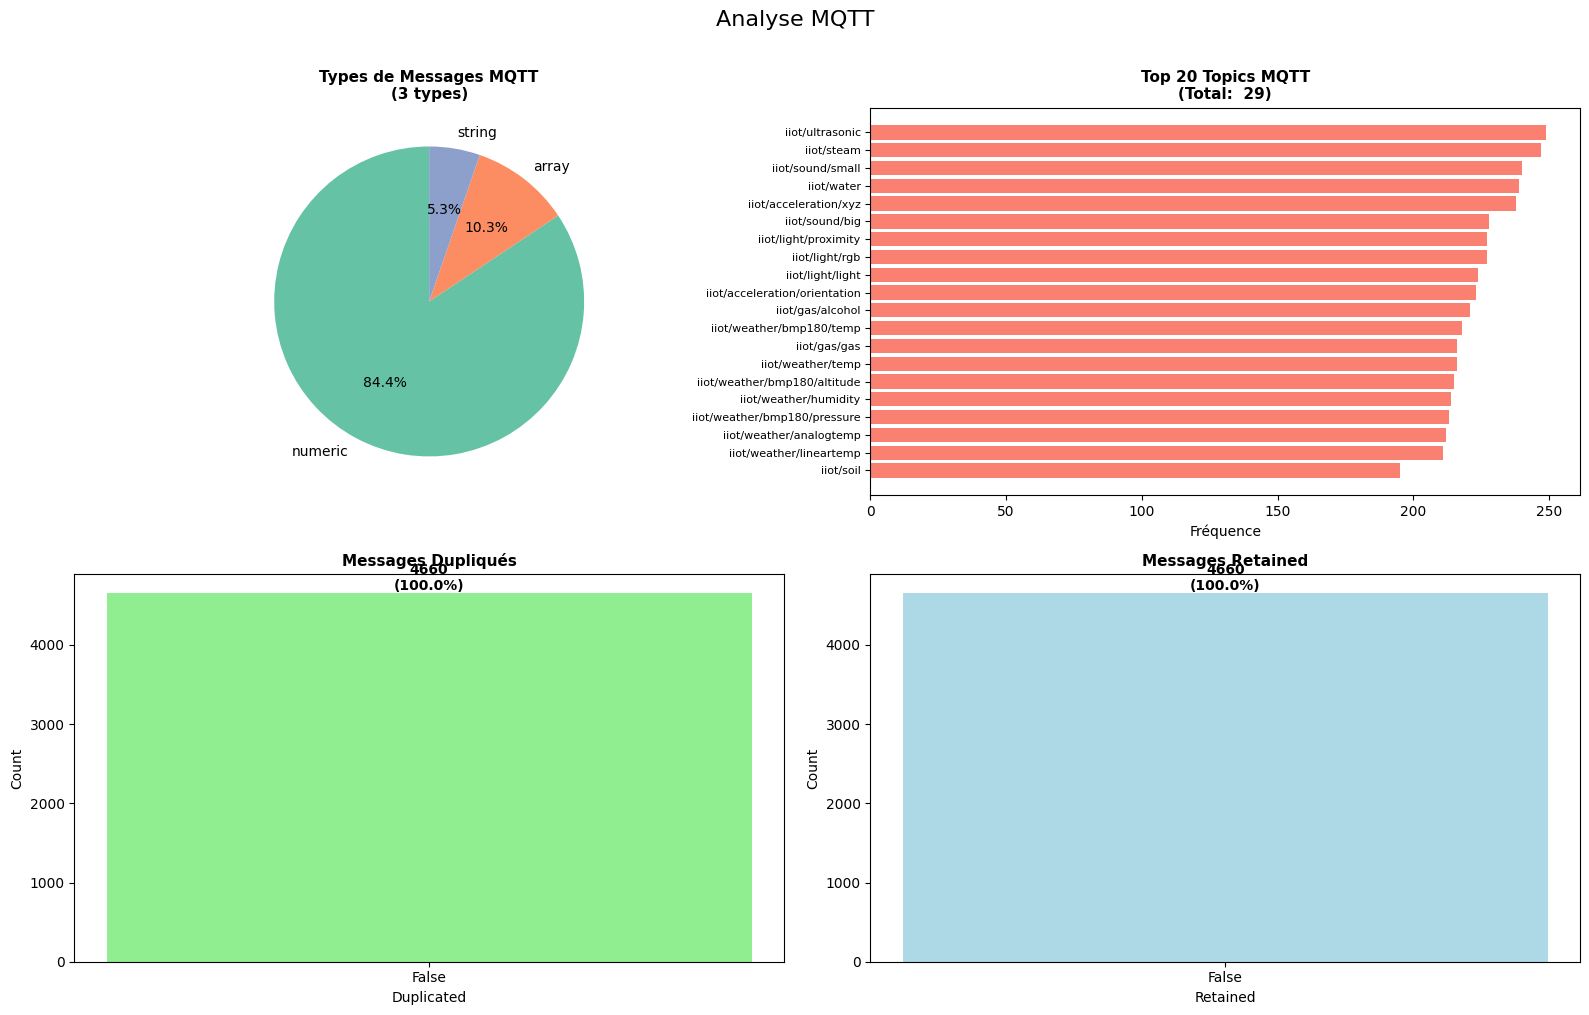


📨 Statistiques MQTT:
Topics uniques: 29
Types de messages: ['numeric', 'array', 'string']
Taux de duplication: 0.00%
Taux de retention: 0.00%
✅ Mémoire libérée


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc

print("⏳ Analyse MQTT...")

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Analyse MQTT", fontsize=16, y=1.01)

# 1. Types de messages MQTT
print("📊 Graphique 1/4: Types de messages...")
mqtt_types = datatrainset['mqtt_message_type']. value_counts()
colors = sns.color_palette('Set2', len(mqtt_types))
axs[0, 0].pie(mqtt_types.values, labels=mqtt_types.index, autopct='%1.1f%%',
              colors=colors, startangle=90)
axs[0, 0].set_title(f'Types de Messages MQTT\n({datatrainset["mqtt_message_type"].nunique()} types)',
                     fontsize=11, fontweight='bold')

# 2. Top Topics MQTT (limité à 20)
print("📊 Graphique 2/4: Top topics...")
top_topics = datatrainset['mqtt_topic'].value_counts().head(20)
axs[0, 1]. barh(range(len(top_topics)), top_topics.values, color='salmon')
axs[0, 1].set_yticks(range(len(top_topics)))
axs[0, 1]. set_yticklabels(top_topics.index, fontsize=8)
axs[0, 1].set_title(f'Top 20 Topics MQTT\n(Total:  {datatrainset["mqtt_topic"].nunique()})',
                     fontsize=11, fontweight='bold')
axs[0, 1]. set_xlabel('Fréquence')
axs[0, 1].invert_yaxis()

# 3. Messages dupliqués
print("📊 Graphique 3/4: Duplicates...")
duplicate_counts = datatrainset['mqtt_duplicate'].value_counts()
axs[1, 0].bar(duplicate_counts.index. astype(str), duplicate_counts.values,
              color=['lightgreen', 'lightcoral'])
axs[1, 0].set_title('Messages Dupliqués', fontsize=11, fontweight='bold')
axs[1, 0].set_xlabel('Duplicated')
axs[1, 0].set_ylabel('Count')
for i, v in enumerate(duplicate_counts.values):
    axs[1, 0].text(i, v, f'{v}\n({v/len(datatrainset)*100:.1f}%)',
                   ha='center', va='bottom', fontweight='bold')

# 4. Messages retained
print("📊 Graphique 4/4: Retained...")
retained_counts = datatrainset['mqtt_retained'].value_counts()
axs[1, 1].bar(retained_counts.index.astype(str), retained_counts.values,
              color=['lightblue', 'lightyellow'])
axs[1, 1].set_title('Messages Retained', fontsize=11, fontweight='bold')
axs[1, 1].set_xlabel('Retained')
axs[1, 1].set_ylabel('Count')
for i, v in enumerate(retained_counts.values):
    axs[1, 1].text(i, v, f'{v}\n({v/len(datatrainset)*100:.1f}%)',
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📨 Statistiques MQTT:")
print(f"Topics uniques: {datatrainset['mqtt_topic'].nunique()}")
print(f"Types de messages: {datatrainset['mqtt_message_type'].unique().tolist()}")
print(f"Taux de duplication: {datatrainset['mqtt_duplicate'].sum() / len(datatrainset) * 100:.2f}%")
print(f"Taux de retention: {datatrainset['mqtt_retained'].sum() / len(datatrainset) * 100:.2f}%")

# Nettoyer
del mqtt_types, top_topics, duplicate_counts, retained_counts
gc. collect()
print("✅ Mémoire libérée")

⏳ Analyse des longueurs de messages...
📊 Graphique 1/2: Distribution des longueurs...
📊 Graphique 2/2:  Présence de messages...


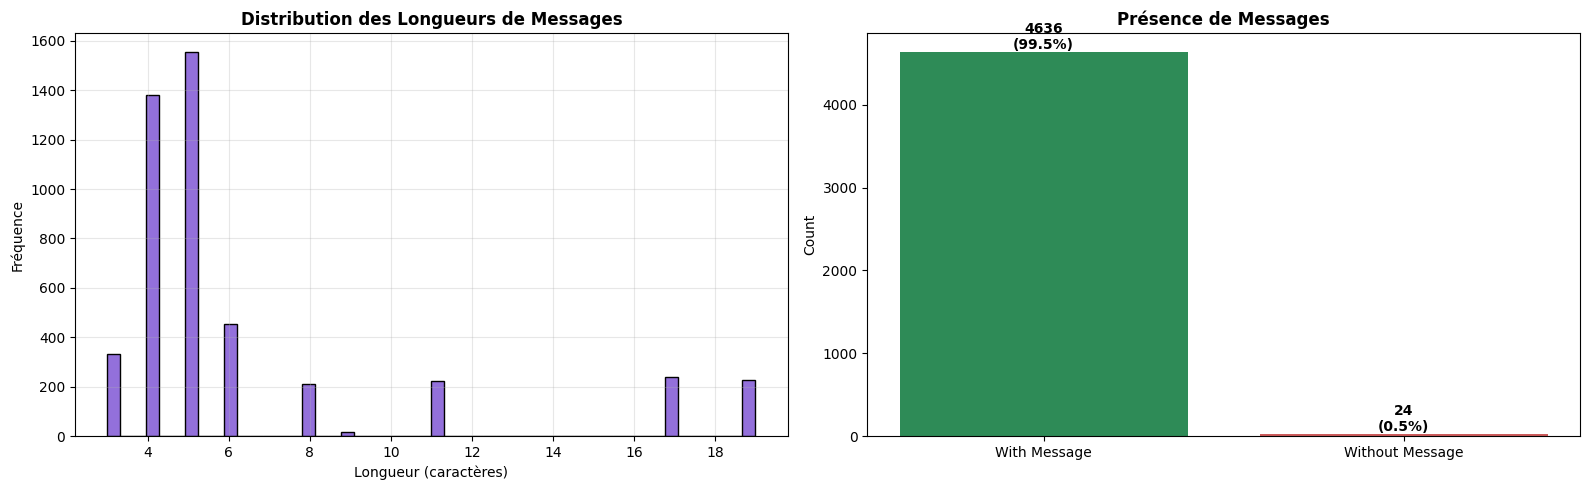


📝 Statistiques des messages:
Longueur moyenne: 6.40 caractères
Longueur médiane: 5.00 caractères
Longueur max: 19 caractères
Messages vides: 24
✅ Mémoire libérée


In [ ]:
import matplotlib.pyplot as plt
import gc

print("⏳ Analyse des longueurs de messages...")

# Calculer sans stocker (économie de RAM)
message_lengths = datatrainset['mqtt_message_value'].str.len()
has_message = ~datatrainset['mqtt_message_value'].isna()

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# 1. Distribution des longueurs
print("📊 Graphique 1/2: Distribution des longueurs...")
axs[0].hist(message_lengths. dropna(), bins=50, color='mediumpurple', edgecolor='black')
axs[0].set_title('Distribution des Longueurs de Messages', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Longueur (caractères)')
axs[0].set_ylabel('Fréquence')
axs[0].grid(alpha=0.3)

# 2. Messages vides vs non-vides
print("📊 Graphique 2/2:  Présence de messages...")
has_msg_counts = has_message.value_counts()
axs[1].bar(['With Message', 'Without Message'],
           [has_msg_counts.get(True, 0), has_msg_counts.get(False, 0)],
           color=['seagreen', 'indianred'])
axs[1].set_title('Présence de Messages', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Count')
for i, v in enumerate([has_msg_counts.get(True, 0), has_msg_counts.get(False, 0)]):
    if v > 0:
        axs[1].text(i, v, f'{v}\n({v/len(datatrainset)*100:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📝 Statistiques des messages:")
print(f"Longueur moyenne: {message_lengths.mean():.2f} caractères")
print(f"Longueur médiane: {message_lengths.median():.2f} caractères")
print(f"Longueur max: {message_lengths.max():.0f} caractères")
print(f"Messages vides: {datatrainset['mqtt_message_value'].isna().sum()}")

# Nettoyer
del message_lengths, has_message, has_msg_counts
gc. collect()
print("✅ Mémoire libérée")

⏳ Analyse pour détection DDoS...

⚠️ INDICATEURS POTENTIELS DE DDoS:

🔴 Top 10 IPs avec le plus haut taux de duplication:
general_ip
192.168.1.10   0.00
192.168.1.11   0.00
192.168.1.12   0.00
192.168.1.13   0.00
192.168.1.14   0.00
192.168.1.15   0.00
192.168.1.16   0.00
192.168.1.17   0.00
192.168.1.18   0.00
192.168.1.19   0.00
Name: mqtt_duplicate, dtype: float64

🔴 Top 10 IPs les plus actives:
general_ip
192.168.1.10    1499
192.168.1.18     678
192.168.1.15     468
192.168.1.19     461
192.168.1.14     437
192.168.1.17     249
192.168.1.13     247
192.168.1.11     239
192.168.1.12     195
192.168.1.20      71
Name: count, dtype: int64

🔴 Top 10 Topics les plus ciblés:
mqtt_topic
iiot/ultrasonic                  249
iiot/steam                       247
iiot/sound/small                 240
iiot/water                       239
iiot/acceleration/xyz            238
iiot/sound/big                   228
iiot/light/proximity             227
iiot/light/rgb                   227
iiot/light

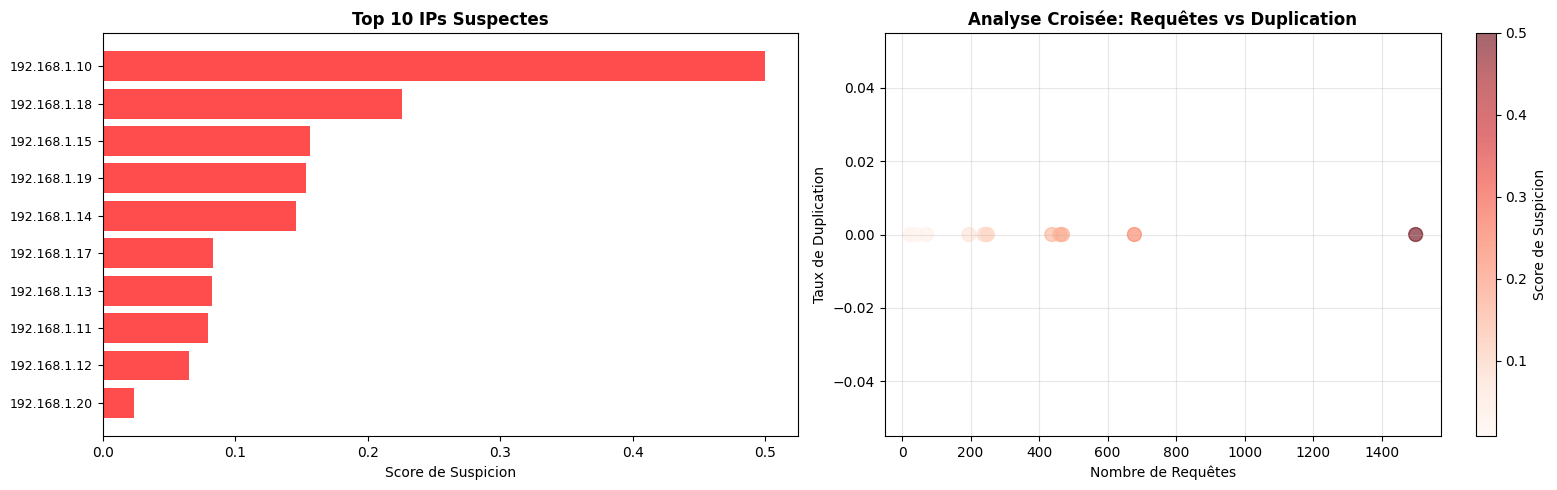


✅ Analyse terminée - Mémoire libérée


In [ ]:
import gc

print("⏳ Analyse pour détection DDoS...")
print("\n⚠️ INDICATEURS POTENTIELS DE DDoS:")
print("="*60)

# 1. IPs avec taux de duplication élevé (Top 10 seulement)
print("\n🔴 Top 10 IPs avec le plus haut taux de duplication:")
ip_duplicate_rate = datatrainset. groupby('general_ip')['mqtt_duplicate'].mean().sort_values(ascending=False).head(10)
print(ip_duplicate_rate)

# 2. IPs avec le plus de requêtes (Top 10)
print(f"\n🔴 Top 10 IPs les plus actives:")
ip_request_counts = datatrainset['general_ip'].value_counts().head(10)
print(ip_request_counts)

# 3. Topics les plus ciblés (Top 10)
print(f"\n🔴 Top 10 Topics les plus ciblés:")
topic_counts = datatrainset['mqtt_topic'].value_counts().head(10)
print(topic_counts)

# 4. Analyse des IPs suspectes (optimisé - seulement top 20 IPs)
print("\n🚨 Calcul du score de suspicion pour les top 20 IPs...")
top_ips_to_analyze = datatrainset['general_ip'].value_counts().head(20).index

suspicious_ips = datatrainset[datatrainset['general_ip'].isin(top_ips_to_analyze)]. groupby('general_ip').agg({
    'mqtt_message_id': 'count',
    'mqtt_duplicate': 'mean',
    'mqtt_topic': 'nunique'
})

suspicious_ips. columns = ['request_count', 'duplicate_rate', 'unique_topics']
suspicious_ips['suspicion_score'] = (
    suspicious_ips['request_count'] / suspicious_ips['request_count'].max() +
    suspicious_ips['duplicate_rate']
) / 2

suspicious_ips = suspicious_ips.sort_values('suspicion_score', ascending=False)

print(f"\n🚨 Top 10 IPs suspectes (score combiné):")
print(suspicious_ips.head(10))

# Visualisation compacte
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Graphique 1: Top IPs suspectes
top_suspicious = suspicious_ips.head(10)
axs[0].barh(range(len(top_suspicious)), top_suspicious['suspicion_score']. values,
            color='red', alpha=0.7)
axs[0].set_yticks(range(len(top_suspicious)))
axs[0].set_yticklabels(top_suspicious. index, fontsize=9)
axs[0].set_xlabel('Score de Suspicion')
axs[0].set_title('Top 10 IPs Suspectes', fontsize=12, fontweight='bold')
axs[0].invert_yaxis()

# Graphique 2: Taux de duplication vs Nombre de requêtes
axs[1]. scatter(suspicious_ips['request_count'],
               suspicious_ips['duplicate_rate'],
               c=suspicious_ips['suspicion_score'],
               cmap='Reds', s=100, alpha=0.6)
axs[1].set_xlabel('Nombre de Requêtes')
axs[1].set_ylabel('Taux de Duplication')
axs[1].set_title('Analyse Croisée: Requêtes vs Duplication', fontsize=12, fontweight='bold')
axs[1].grid(alpha=0.3)
plt.colorbar(axs[1].collections[0], ax=axs[1], label='Score de Suspicion')

plt.tight_layout()
plt.show()

# Nettoyer
del ip_duplicate_rate, ip_request_counts, topic_counts, suspicious_ips, top_suspicious
gc.collect()
print("\n✅ Analyse terminée - Mémoire libérée")

In [ ]:

print("🎯 CRÉATION DE LA VARIABLE CIBLE:  is_ddos")
print("="*60)

# ============================================================
# CALCULER DES MÉTRIQUES SIMPLES PAR IP
# ============================================================
print("\n⏳ Calcul des métriques par IP...")

# Nombre de requêtes par IP
datatrainset['requests_per_ip'] = datatrainset. groupby('general_ip')['general_ip'].transform('count')

# Taux de duplication par IP
datatrainset['duplicate_rate_per_ip'] = datatrainset.groupby('general_ip')['mqtt_duplicate'].transform('mean')

# Nombre de topics uniques par IP
datatrainset['unique_topics_per_ip'] = datatrainset.groupby('general_ip')['mqtt_topic'].transform('nunique')

print("✅ Métriques calculées")

# ============================================================
# CRÉER LA VARIABLE CIBLE BINAIRE
# ============================================================
print("\n⏳ Création de la variable cible binaire...")

# Définir les seuils
SEUIL_REQUETES = 200        # Plus de 200 requêtes = suspect
SEUIL_DUPLICATE = 0.3       # Plus de 30% de duplicates = suspect
SEUIL_TOPICS = 5            # Moins de 5 topics = suspect

# Créer is_ddos:  1 si DDoS, 0 si Normal
datatrainset['is_ddos'] = (
    (datatrainset['requests_per_ip'] > SEUIL_REQUETES) &
    (
        (datatrainset['duplicate_rate_per_ip'] > SEUIL_DUPLICATE) |
        (datatrainset['unique_topics_per_ip'] < SEUIL_TOPICS)
    )
).astype(int)

print("✅ Variable 'is_ddos' créée")

# ============================================================
# AFFICHER LES RÉSULTATS
# ============================================================
print("\n" + "="*60)
print("📊 RÉSULTATS")
print("="*60)

print("\n📈 Distribution de is_ddos:")
print(datatrainset['is_ddos'].value_counts())

print("\n📈 Pourcentages:")
print(datatrainset['is_ddos']. value_counts(normalize=True))

print("\n✅ TERMINÉ!")
print(f"   - 0 = Trafic Normal")
print(f"   - 1 = Attaque DDoS")

🎯 CRÉATION DE LA VARIABLE CIBLE:  is_ddos

⏳ Calcul des métriques par IP...
✅ Métriques calculées

⏳ Création de la variable cible binaire...
✅ Variable 'is_ddos' créée

📊 RÉSULTATS

📈 Distribution de is_ddos:
is_ddos
1    2779
0    1881
Name: count, dtype: int64

📈 Pourcentages:
is_ddos
1   0.60
0   0.40
Name: proportion, dtype: float64

✅ TERMINÉ!
   - 0 = Trafic Normal
   - 1 = Attaque DDoS


/tmp/ipython-input-4081587754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_ddos', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')
/tmp/ipython-input-4081587754.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal (0)', 'DDoS (1)'], rotation=0)


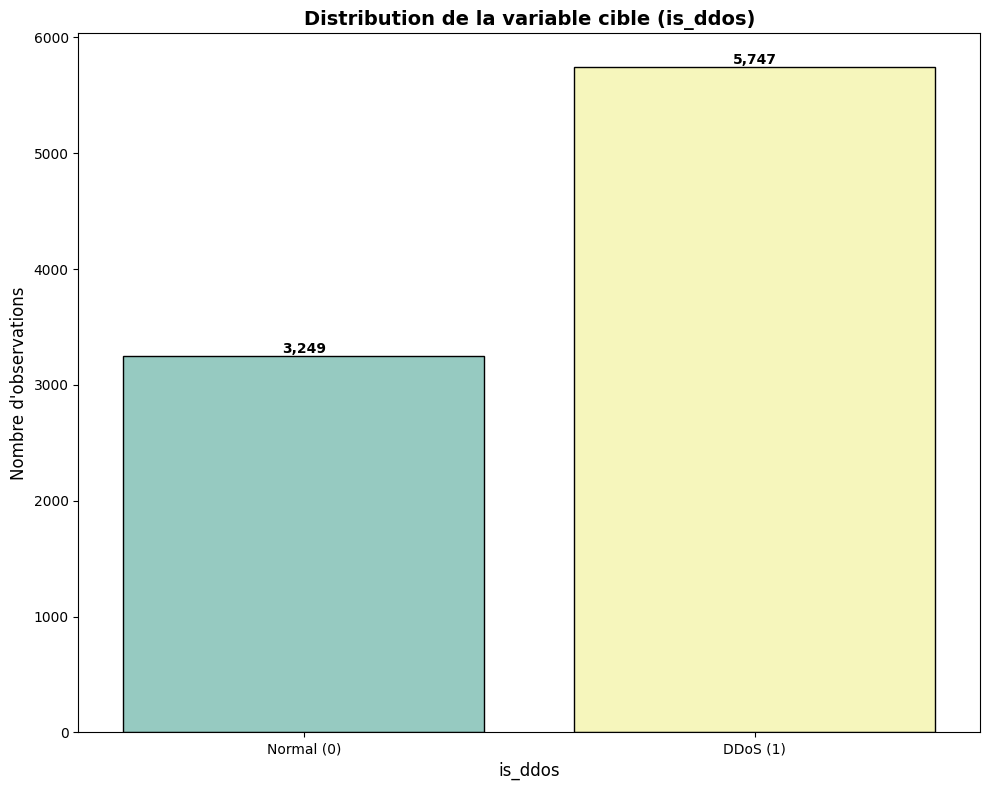


📊 Distribution de is_ddos:
is_ddos
1    5747
0    3249
Name: count, dtype: int64

📊 Pourcentages:
is_ddos
1   0.64
0   0.36
Name: proportion, dtype: float64


In [ ]:


fig, ax = plt.subplots(figsize=(10, 8))

# Countplot
sns.countplot(x='is_ddos', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')

# Titre et axes
ax.set_title('Distribution de la variable cible (is_ddos)', fontsize=14, fontweight='bold')
ax.set_xlabel('is_ddos', fontsize=12)
ax.set_ylabel('Nombre d\'observations', fontsize=12)

# Changer les labels des catégories
ax.set_xticklabels(['Normal (0)', 'DDoS (1)'], rotation=0)

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p. get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Stats de base
print("\n📊 Distribution de is_ddos:")
print(datatrainset['is_ddos'].value_counts())
print("\n📊 Pourcentages:")
print(datatrainset['is_ddos']. value_counts(normalize=True))

In [ ]:
target_col = 'is_ddos'
distrib = datatrainset['is_ddos']. value_counts().sort_index()

print(f"\nDistribution de la variable cible '{target_col}':")
print(distrib)

desequilibre = distrib. iloc[0] / distrib. iloc[-1]

print(f"\n📊 Ratio de déséquilibre: {desequilibre:.2f}: 1 (Normal: DDoS)")

if desequilibre > 5:
    print("⚠️  Déséquilibre extrême - SMOTE fortement conseillé")
elif desequilibre > 2:
    print("⚠️  Bon candidat pour SMOTE")
else:
    print("✅ Équilibre correct - Pas besoin de SMOTE")


Distribution de la variable cible 'is_ddos':
is_ddos
0    1881
1    2779
Name: count, dtype: int64

📊 Ratio de déséquilibre: 0.68: 1 (Normal: DDoS)
✅ Équilibre correct - Pas besoin de SMOTE



🔹 mqtt_message_id vs is_ddos:
 is_ddos             0     1
mqtt_message_id            
0               36.12 63.88


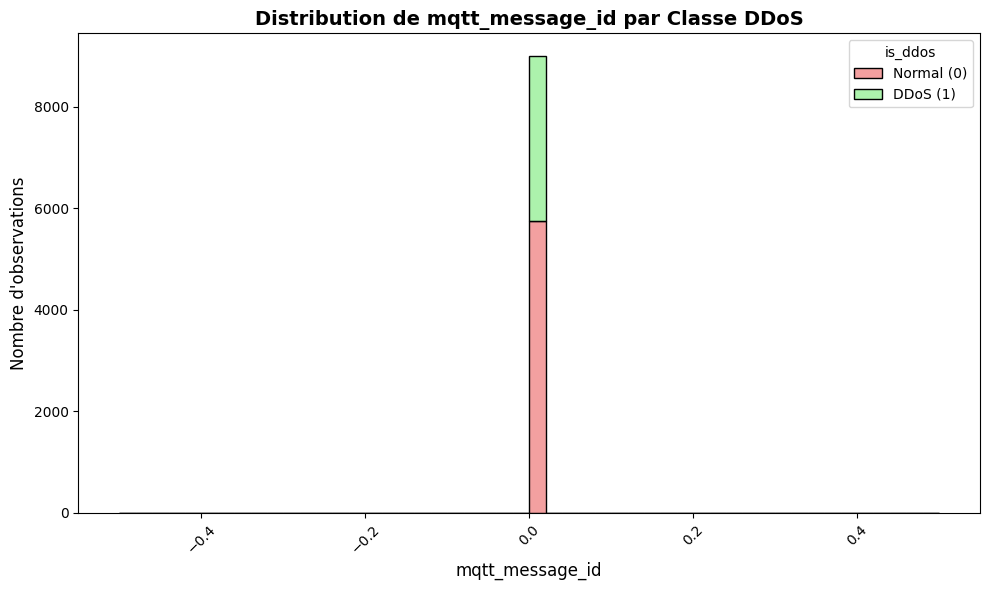


🔹 mqtt_message_type vs is_ddos:
 is_ddos               0     1
mqtt_message_type            
array              4.15 95.85
numeric           41.63 58.37
string             7.92 92.08


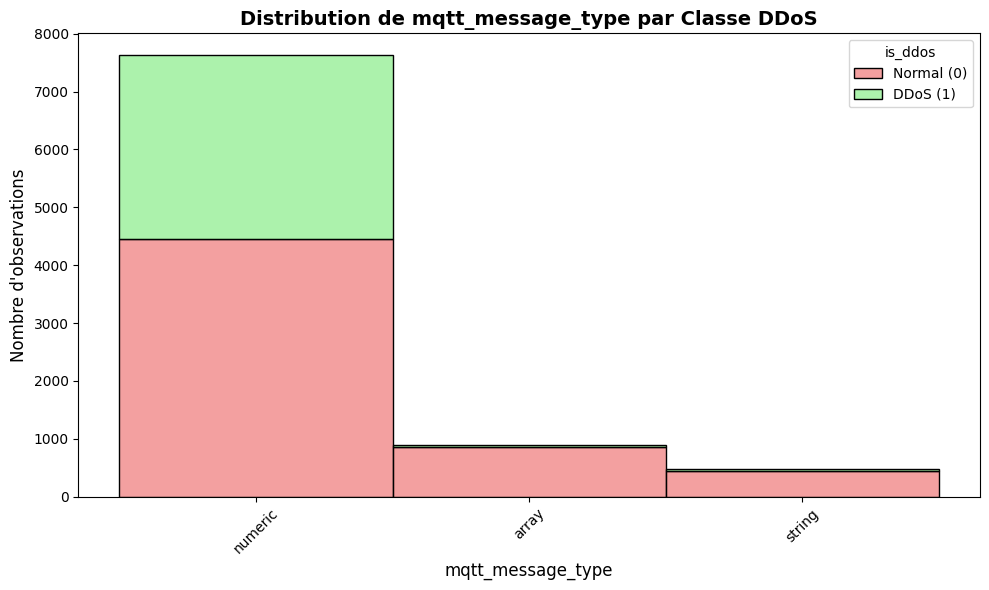


🔹 mqtt_qos vs is_ddos:
 is_ddos      0     1
mqtt_qos            
0        36.12 63.88


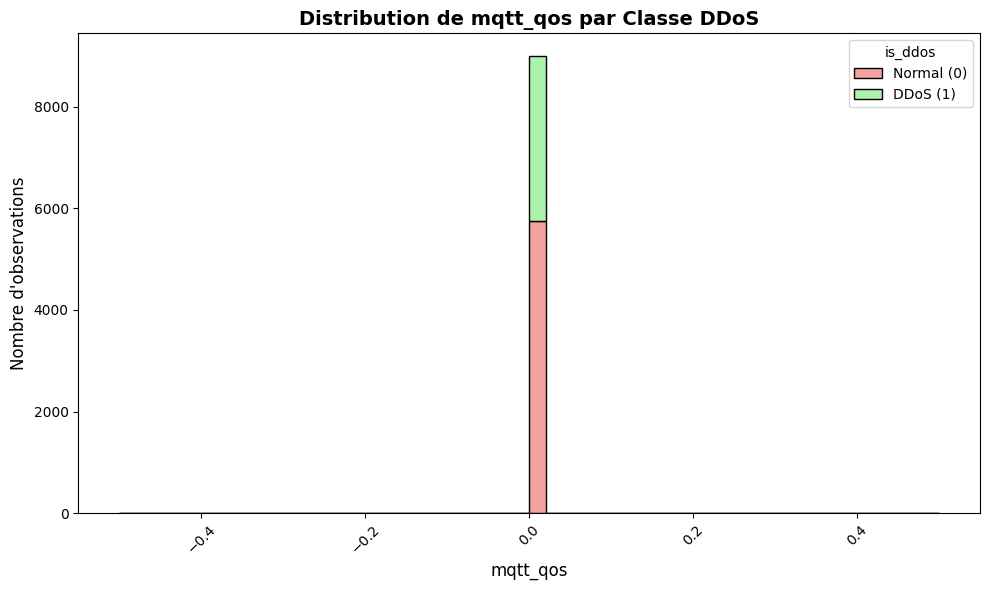


🔹 day_of_week vs is_ddos:
 is_ddos         0     1
day_of_week            
Friday      36.12 63.88


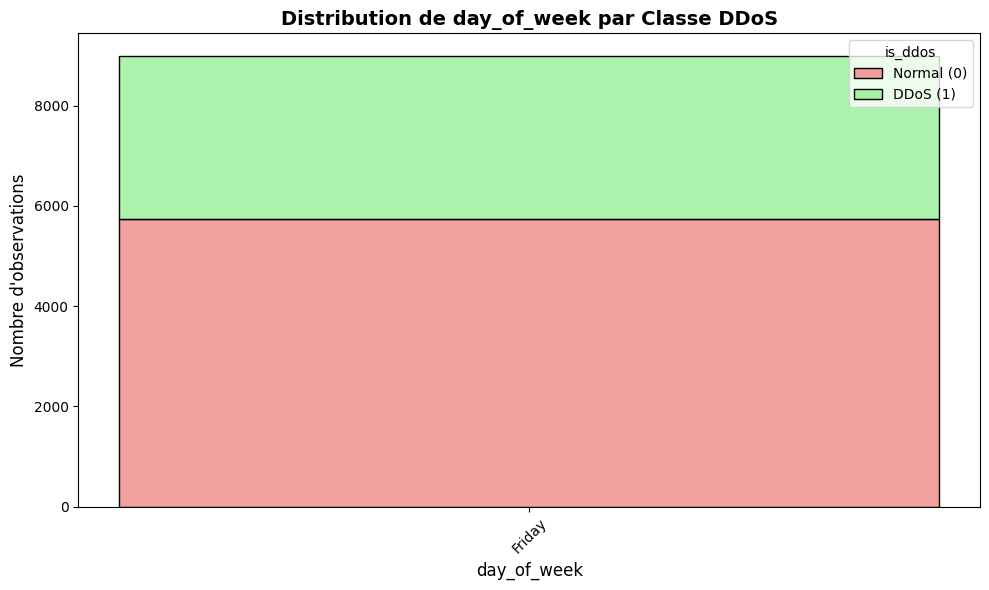


🔹 unique_topics_per_ip vs is_ddos:
 is_ddos                   0      1
unique_topics_per_ip              
1                      7.15  92.85
2                      2.88  97.12
3                      0.00 100.00
4                    100.00   0.00
7                    100.00   0.00


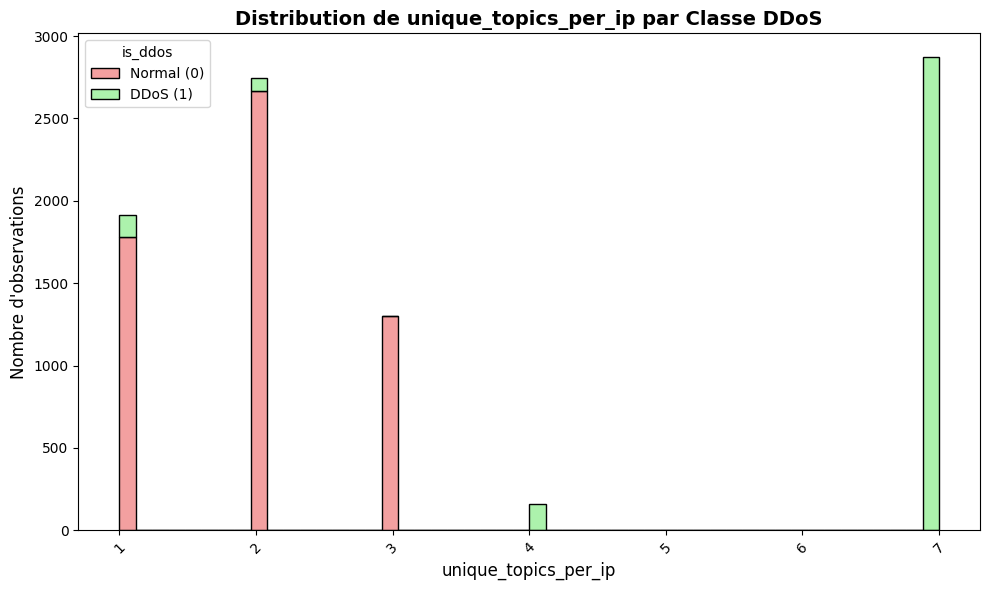

In [ ]:
for col in datatrainset.select_dtypes(include=['object', 'category', 'int64']).columns:
    if col != 'is_ddos' and datatrainset[col]. nunique() < 10:
        cross_tab = pd.crosstab(datatrainset[col], datatrainset['is_ddos'], normalize='index')*100
        print(f"\n🔹 {col} vs is_ddos:\n", cross_tab)

        plt.figure(figsize=(10, 6))
        sns.histplot(data=datatrainset, x=col, hue='is_ddos', multiple='stack',
                     palette=['lightgreen', 'lightcoral'], bins=50)
        plt.title(f"Distribution de {col} par Classe DDoS", fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Nombre d\'observations', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='is_ddos', labels=['Normal (0)', 'DDoS (1)'])
        plt.tight_layout()
        plt.show()

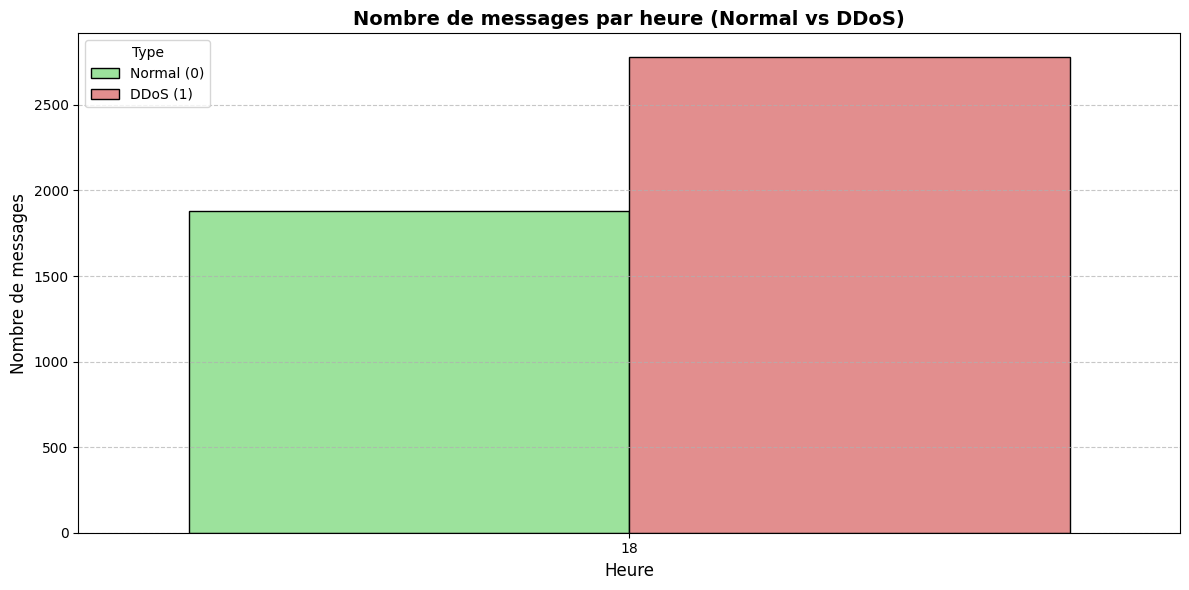

In [ ]:


# S'assurer que la colonne 'hour' existe
if 'hour' not in datatrainset.columns:
    datatrainset['hour'] = pd.to_datetime(datatrainset['@timestamp']).dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x="hour", hue="is_ddos", data=datatrainset,
              palette=['lightgreen', 'lightcoral'], edgecolor='black')
plt.title("Nombre de messages par heure (Normal vs DDoS)", fontsize=14, fontweight='bold')
plt.xlabel("Heure", fontsize=12)
plt.ylabel("Nombre de messages", fontsize=12)
plt.legend(title='Type', labels=['Normal (0)', 'DDoS (1)'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

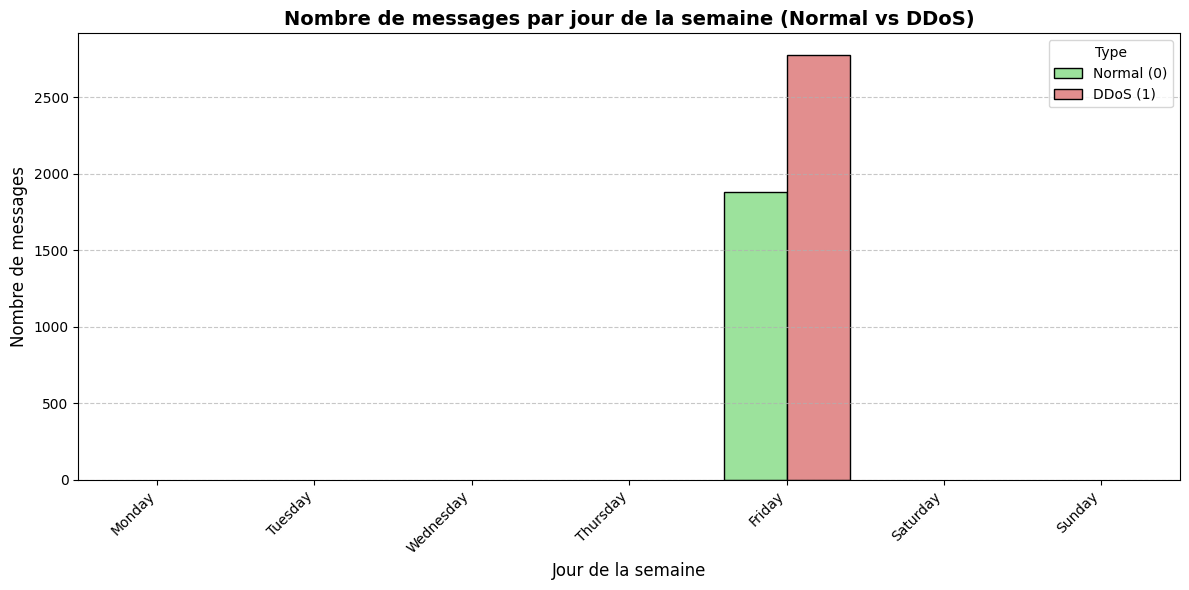

In [ ]:


# S'assurer que la colonne 'day_of_week' existe
if 'day_of_week' not in datatrainset.columns:
    datatrainset['day_of_week'] = pd.to_datetime(datatrainset['@timestamp']).dt.day_name()

# Ordre des jours
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.countplot(x="day_of_week", hue="is_ddos", data=datatrainset, order=day_order,
              palette=['lightgreen', 'lightcoral'], edgecolor='black')
plt.title("Nombre de messages par jour de la semaine (Normal vs DDoS)",
          fontsize=14, fontweight='bold')
plt.xlabel("Jour de la semaine", fontsize=12)
plt.ylabel("Nombre de messages", fontsize=12)
plt.legend(title='Type', labels=['Normal (0)', 'DDoS (1)'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

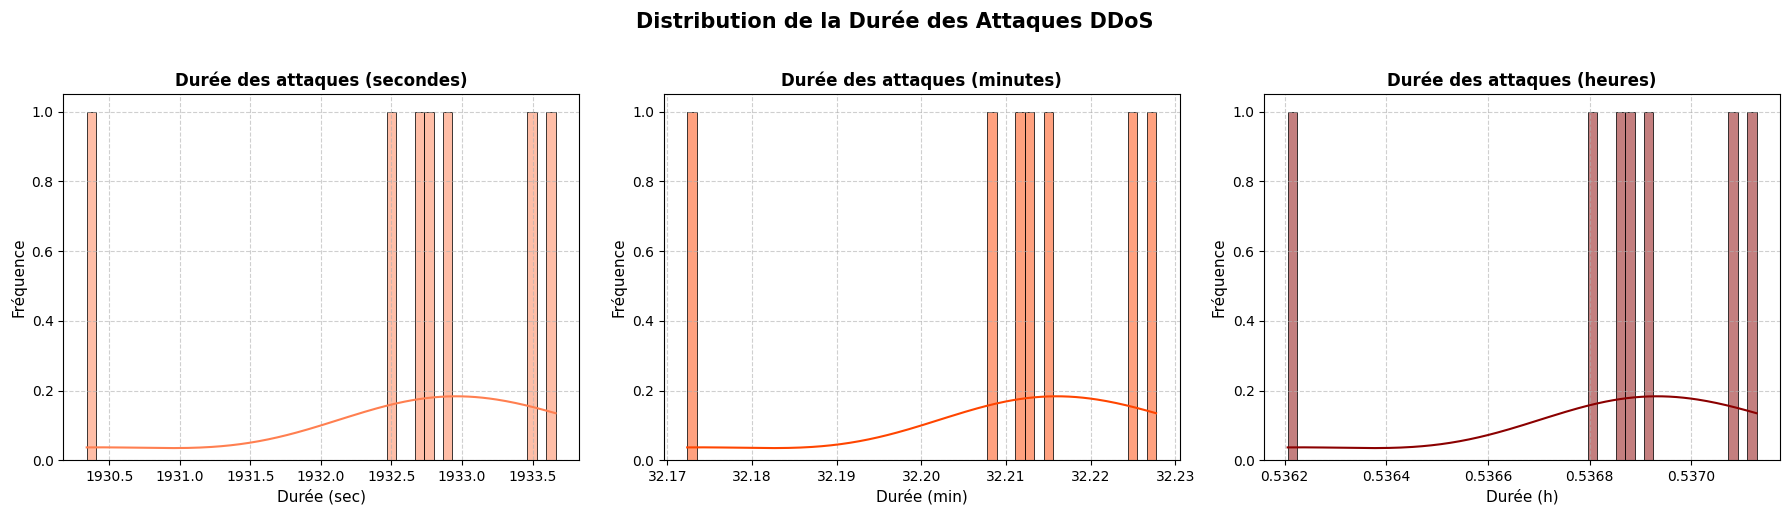


📊 STATISTIQUES DE DURÉE D'ATTAQUE:

En secondes:
   Moyenne: 1932.62 sec
   Médiane: 1932.75 sec
   Min: 1930.34 sec
   Max: 1933.66 sec

En minutes:
   Moyenne:  32.21 min
   Médiane: 32.21 min
   Min: 32.17 min
   Max: 32.23 min

En heures:
   Moyenne: 0.54 h
   Médiane: 0.54 h
   Max: 0.54 h


In [ ]:


# S'assurer que le timestamp est au bon format
datatrainset['timestamp_parsed'] = pd.to_datetime(datatrainset['@timestamp'])

# Filtrer seulement les attaques DDoS
ddos_data = datatrainset[datatrainset['is_ddos'] == 1]

# Calculer la durée d'attaque par IP
attack_duration = ddos_data.groupby('general_ip')['timestamp_parsed'].agg(['min', 'max'])
attack_duration['duration_seconds'] = (attack_duration['max'] - attack_duration['min']).dt.total_seconds()
attack_duration['duration_minutes'] = attack_duration['duration_seconds'] / 60
attack_duration['duration_hours'] = attack_duration['duration_minutes'] / 60

# Créer 3 graphiques selon la durée
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Graphique 1: En secondes
sns.histplot(attack_duration["duration_seconds"], bins=50, kde=True, color="coral", ax=axs[0])
axs[0].set_title("Durée des attaques (secondes)", fontsize=12, fontweight='bold')
axs[0].set_xlabel("Durée (sec)", fontsize=11)
axs[0].set_ylabel("Fréquence", fontsize=11)
axs[0].grid(True, linestyle="--", alpha=0.6)

# Graphique 2: En minutes
sns. histplot(attack_duration["duration_minutes"], bins=50, kde=True, color="orangered", ax=axs[1])
axs[1].set_title("Durée des attaques (minutes)", fontsize=12, fontweight='bold')
axs[1].set_xlabel("Durée (min)", fontsize=11)
axs[1].set_ylabel("Fréquence", fontsize=11)
axs[1].grid(True, linestyle="--", alpha=0.6)

# Graphique 3: En heures
sns.histplot(attack_duration["duration_hours"], bins=50, kde=True, color="darkred", ax=axs[2])
axs[2].set_title("Durée des attaques (heures)", fontsize=12, fontweight='bold')
axs[2].set_xlabel("Durée (h)", fontsize=11)
axs[2].set_ylabel("Fréquence", fontsize=11)
axs[2].grid(True, linestyle="--", alpha=0.6)

plt.suptitle("Distribution de la Durée des Attaques DDoS", fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Statistiques détaillées
print("\n📊 STATISTIQUES DE DURÉE D'ATTAQUE:")
print("="*60)
print(f"\nEn secondes:")
print(f"   Moyenne: {attack_duration['duration_seconds'].mean():.2f} sec")
print(f"   Médiane: {attack_duration['duration_seconds'].median():.2f} sec")
print(f"   Min: {attack_duration['duration_seconds'].min():.2f} sec")
print(f"   Max: {attack_duration['duration_seconds'].max():.2f} sec")

print(f"\nEn minutes:")
print(f"   Moyenne:  {attack_duration['duration_minutes'].mean():.2f} min")
print(f"   Médiane: {attack_duration['duration_minutes'].median():.2f} min")
print(f"   Min: {attack_duration['duration_minutes'].min():.2f} min")
print(f"   Max: {attack_duration['duration_minutes'].max():.2f} min")

print(f"\nEn heures:")
print(f"   Moyenne: {attack_duration['duration_hours'].mean():.2f} h")
print(f"   Médiane: {attack_duration['duration_hours'].median():.2f} h")
print(f"   Max: {attack_duration['duration_hours'].max():.2f} h")

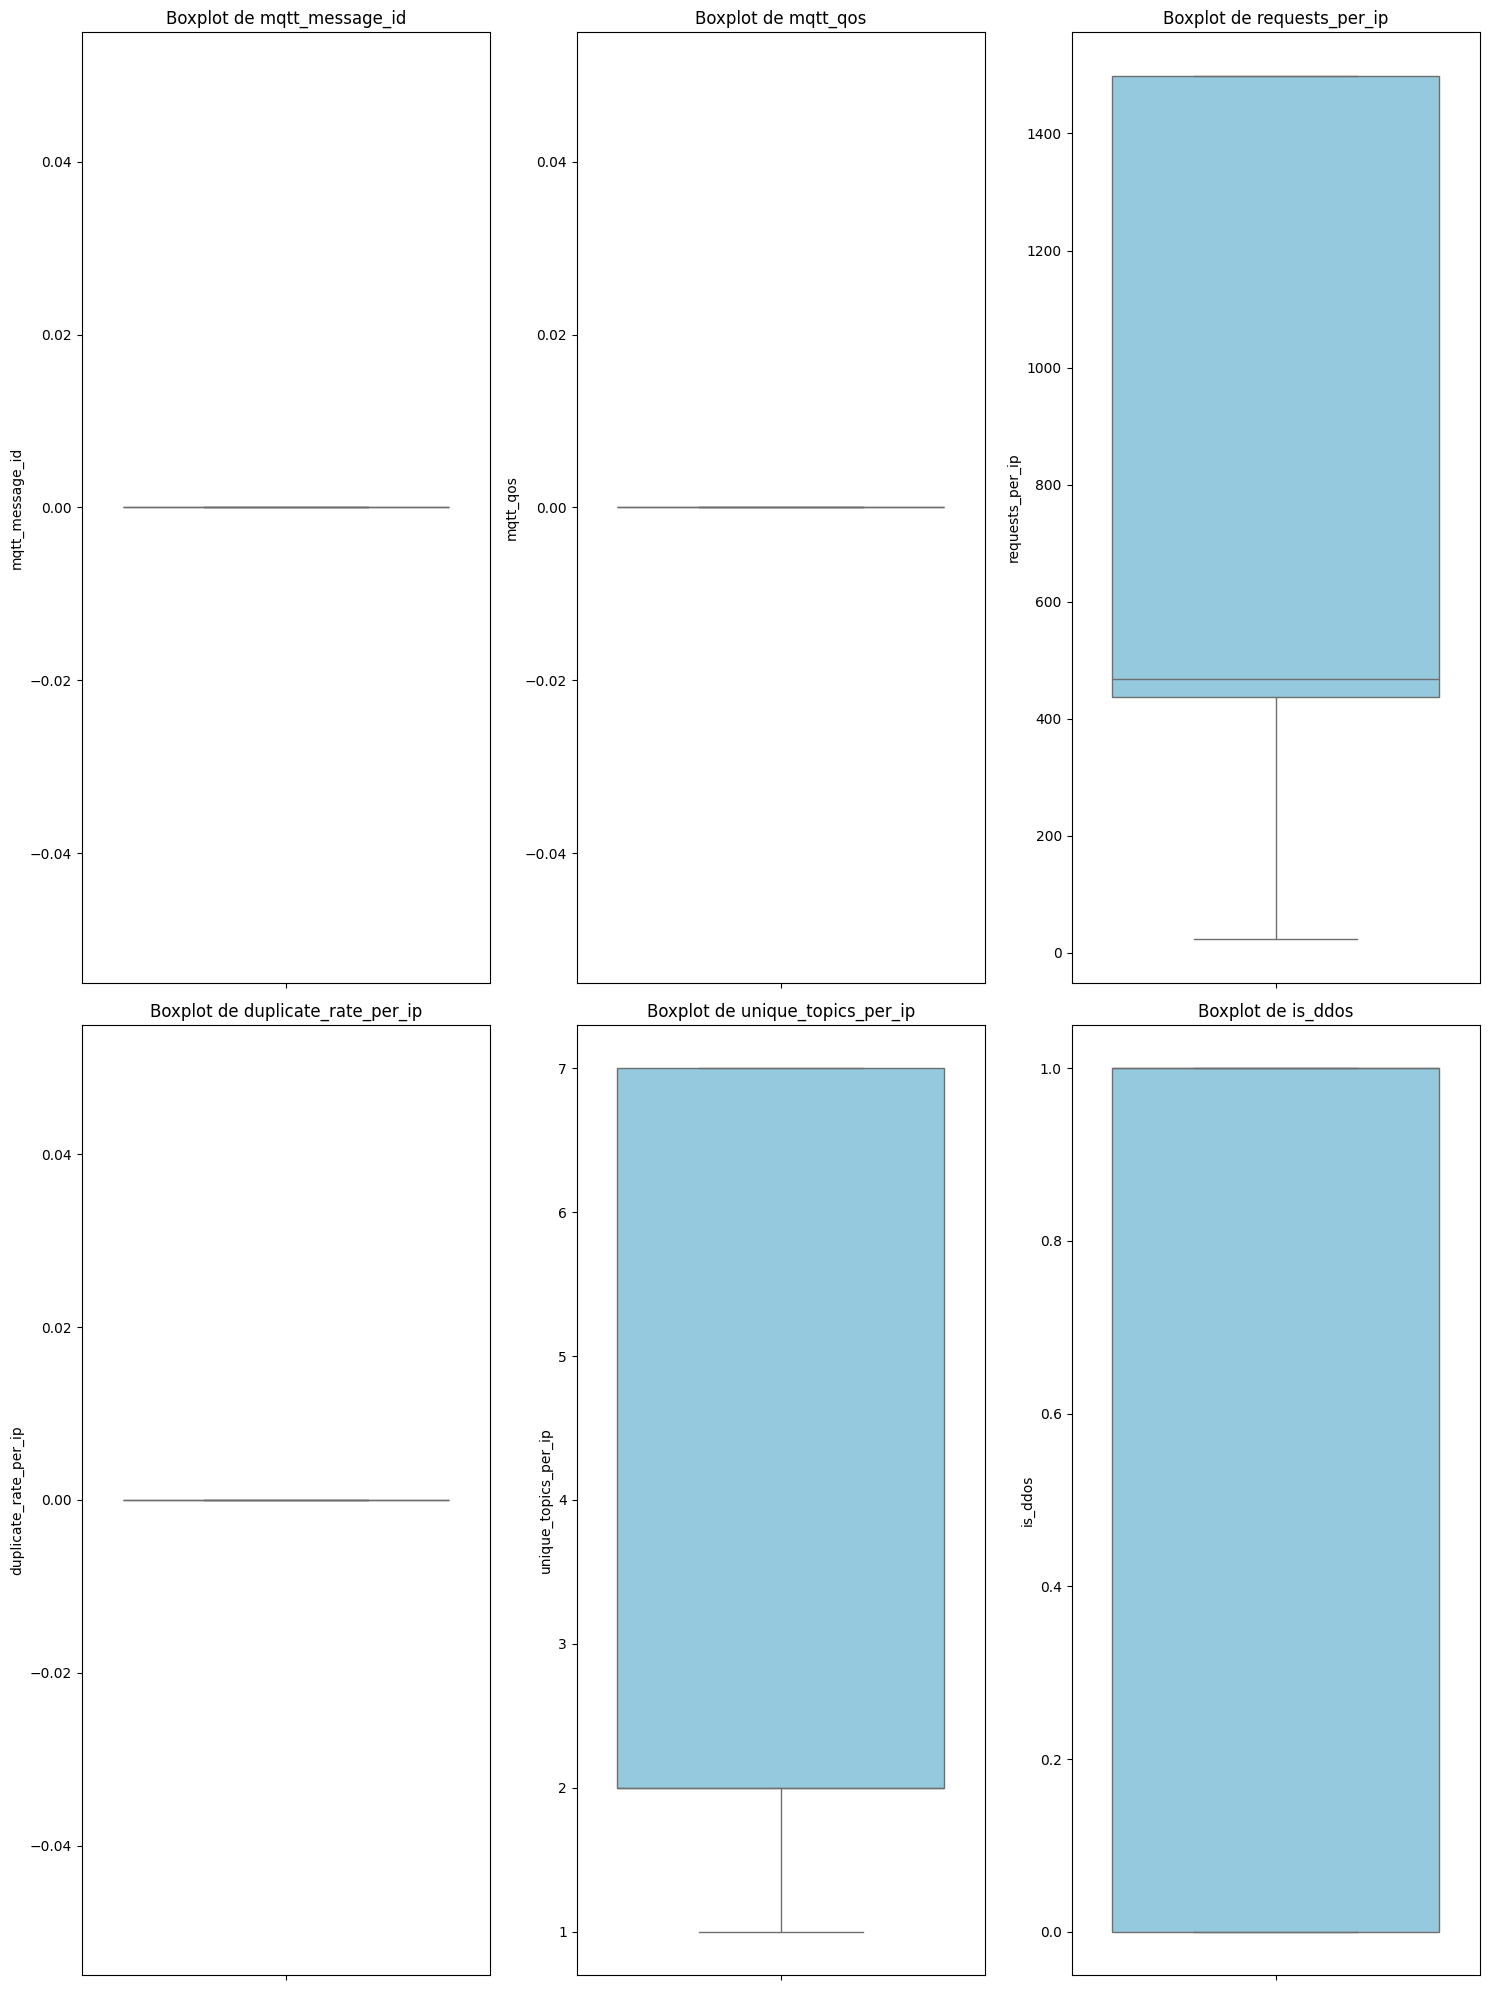

In [ ]:
import math
plt.figure(figsize=(15, 20))

colonnes_numeriques = datatrainset.select_dtypes(include=['int64', 'float64']).columns
n=len(colonnes_numeriques)
rows=math.ceil(n/3)
for i, colonne in enumerate(colonnes_numeriques, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data=datatrainset, y=colonne, color='skyblue')
    plt.title(f'Boxplot de {colonne}')
    plt.tight_layout()

plt.show()

🔧 ENCODAGE DES VARIABLES POUR ANALYSE COMPLÈTE

⏳ Encodage des variables catégorielles...
   Colonnes à encoder:  11
   ✓ general_application encodé (14 valeurs uniques)
   ✓ general_device_name encodé (14 valeurs uniques)
   ✓ general_full_id encodé (29 valeurs uniques)
   ✓ general_ip encodé (14 valeurs uniques)
   ✓ general_mac encodé (14 valeurs uniques)
   ✓ mqtt_duplicate encodé (1 valeurs uniques)
   ✓ mqtt_message_type encodé (3 valeurs uniques)
   ✓ mqtt_message_value encodé (204 valeurs uniques)
   ✓ mqtt_retained encodé (1 valeurs uniques)
   ✓ mqtt_topic encodé (29 valeurs uniques)
   ✓ day_of_week encodé (1 valeurs uniques)

✅ Encodage terminé!

⏳ Calcul de la matrice de corrélation...
   20 variables dans la matrice de corrélation


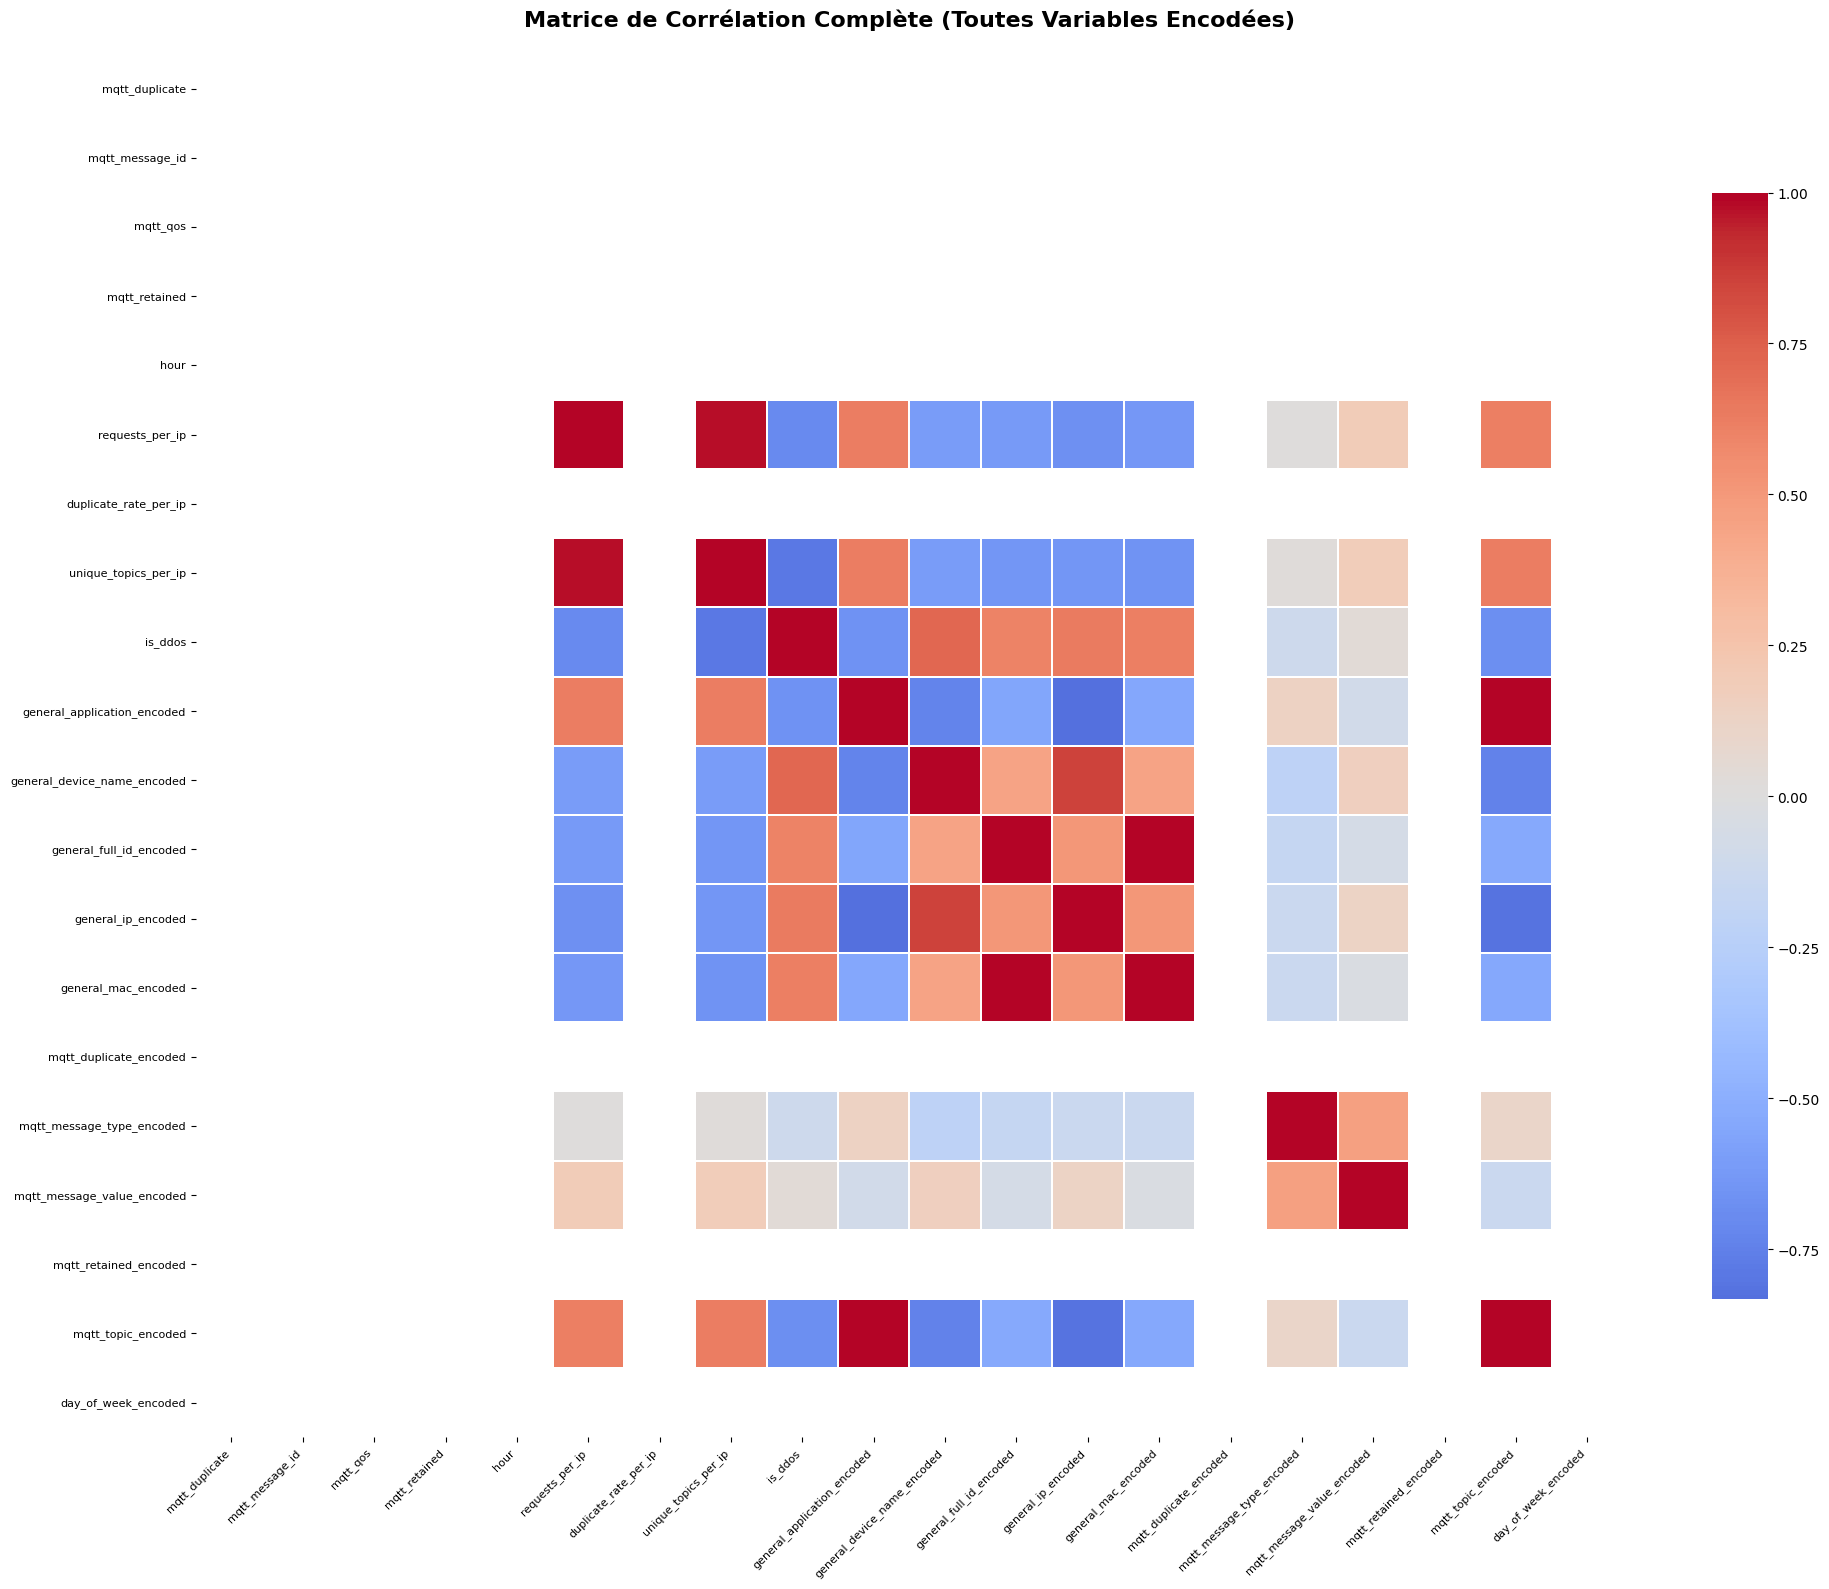


⏳ Corrélation avec is_ddos...

📊 TOP 15 VARIABLES LES PLUS CORRÉLÉES AVEC is_ddos:
is_ddos                        1.00
general_device_name_encoded    0.72
general_ip_encoded             0.63
general_mac_encoded            0.62
general_full_id_encoded        0.60
mqtt_message_value_encoded     0.03
mqtt_message_type_encoded     -0.11
general_application_encoded   -0.67
mqtt_topic_encoded            -0.68
requests_per_ip               -0.71
unique_topics_per_ip          -0.79
mqtt_duplicate                  NaN
mqtt_message_id                 NaN
mqtt_qos                        NaN
mqtt_retained                   NaN
Name: is_ddos, dtype: float64

📊 TOP 15 VARIABLES LES MOINS CORRÉLÉES AVEC is_ddos:
mqtt_message_value_encoded     0.03
mqtt_message_type_encoded     -0.11
general_application_encoded   -0.67
mqtt_topic_encoded            -0.68
requests_per_ip               -0.71
unique_topics_per_ip          -0.79
mqtt_duplicate                  NaN
mqtt_message_id                 NaN
mqtt

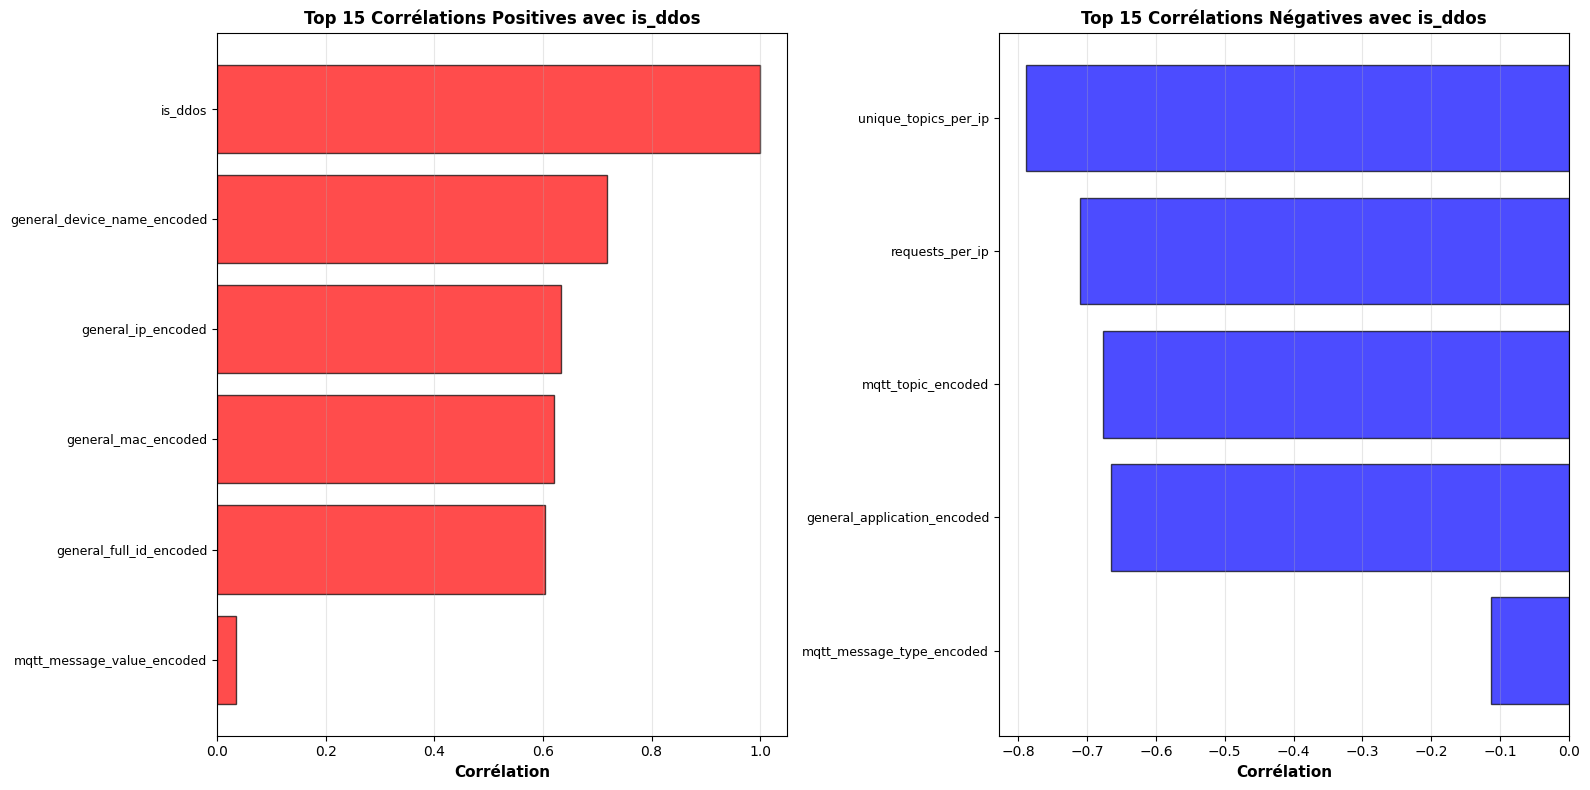


⚠️ INDICATEURS POTENTIELS DE DDoS

🔴 Top 10 IPs avec le plus haut taux de duplication:
general_ip
192.168.1.10   0.00
192.168.1.11   0.00
192.168.1.12   0.00
192.168.1.13   0.00
192.168.1.14   0.00
192.168.1.15   0.00
192.168.1.16   0.00
192.168.1.17   0.00
192.168.1.18   0.00
192.168.1.19   0.00
Name: mqtt_duplicate, dtype: float64

🔴 Top 10 IPs les plus actives:
general_ip
192.168.1.10    1499
192.168.1.18     678
192.168.1.15     468
192.168.1.19     461
192.168.1.14     437
192.168.1.17     249
192.168.1.13     247
192.168.1.11     239
192.168.1.12     195
192.168.1.20      71
Name: count, dtype: int64

🔴 Top 10 Topics les plus ciblés:
mqtt_topic
iiot/ultrasonic                  249
iiot/steam                       247
iiot/sound/small                 240
iiot/water                       239
iiot/acceleration/xyz            238
iiot/sound/big                   228
iiot/light/proximity             227
iiot/light/rgb                   227
iiot/light/light                 224
iiot/ac

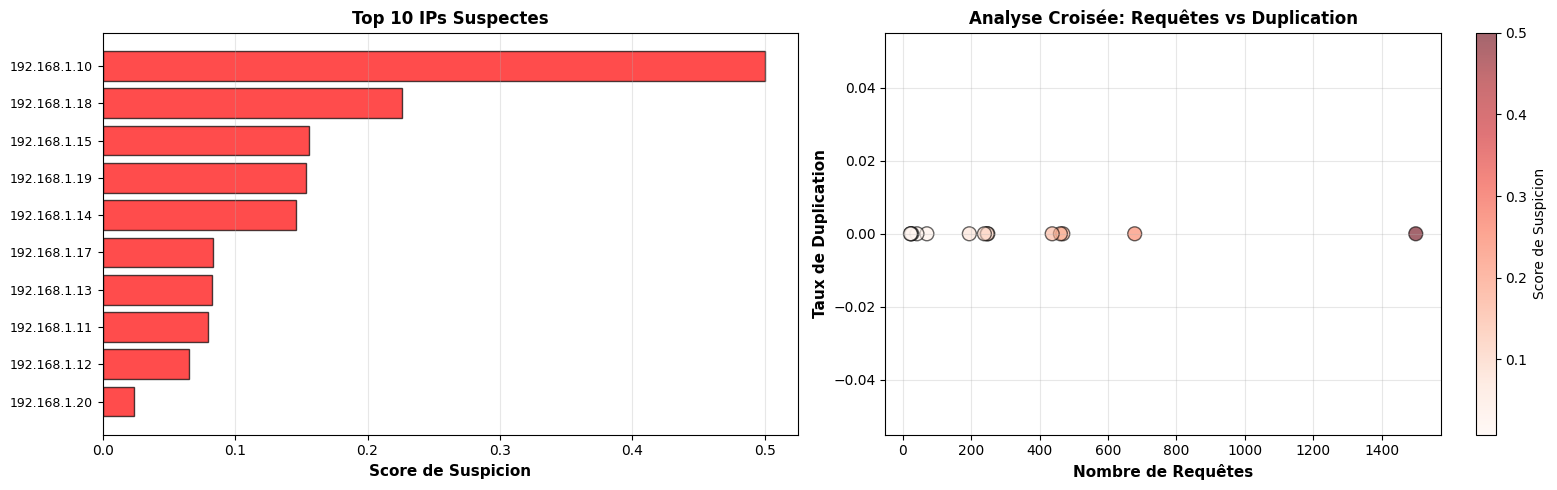


⏳ Nettoyage de la mémoire...
✅ Analyse terminée - Mémoire libérée


In [ ]:
import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

print("="*70)
print("🔧 ENCODAGE DES VARIABLES POUR ANALYSE COMPLÈTE")
print("="*70)

# ============================================================
# ÉTAPE 1: ENCODER LES VARIABLES CATÉGORIELLES
# ============================================================
print("\n⏳ Encodage des variables catégorielles...")

# Créer une copie pour l'encodage
data_encoded = datatrainset.copy()

# Liste des colonnes à encoder
categorical_cols = data_encoded.select_dtypes(include=['object', 'bool']).columns
categorical_cols = [col for col in categorical_cols if col not in ['@timestamp', 'timestamp_parsed']]

print(f"   Colonnes à encoder:  {len(categorical_cols)}")

# Encoder chaque colonne
le = LabelEncoder()
encoded_mapping = {}  # Pour garder trace de l'encodage

for col in categorical_cols:
    try:
        # Gérer les valeurs manquantes
        data_encoded[col] = data_encoded[col].fillna('MISSING')

        # Encoder
        data_encoded[f'{col}_encoded'] = le. fit_transform(data_encoded[col].astype(str))

        # Garder le mapping (optionnel)
        encoded_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

        print(f"   ✓ {col} encodé ({data_encoded[col].nunique()} valeurs uniques)")
    except Exception as e:
        print(f"   ✗ {col} ignoré:  {str(e)}")

print(f"\n✅ Encodage terminé!")

# ============================================================
# ÉTAPE 2: MATRICE DE CORRÉLATION COMPLÈTE
# ============================================================
print("\n⏳ Calcul de la matrice de corrélation...")

# Sélectionner toutes les colonnes numériques (y compris encodées)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64', 'int32', 'bool']).columns
data_for_corr = data_encoded[numeric_cols]

# Supprimer les colonnes non pertinentes si nécessaire
cols_to_drop = ['timestamp_parsed'] if 'timestamp_parsed' in data_for_corr.columns else []
data_for_corr = data_for_corr. drop(cols_to_drop, axis=1, errors='ignore')

print(f"   {data_for_corr.shape[1]} variables dans la matrice de corrélation")

# Calculer la corrélation
corr_matrix = data_for_corr.corr()

# Créer la heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.1, cbar_kws={"shrink": 0.8})
plt.title("Matrice de Corrélation Complète (Toutes Variables Encodées)",
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 3: CORRÉLATION AVEC is_ddos
# ============================================================
print("\n⏳ Corrélation avec is_ddos...")

# Corrélations avec la variable cible
if 'is_ddos' in corr_matrix.columns:
    ddos_corr = corr_matrix['is_ddos'].sort_values(ascending=False)

    print("\n📊 TOP 15 VARIABLES LES PLUS CORRÉLÉES AVEC is_ddos:")
    print("="*60)
    print(ddos_corr.head(15))

    print("\n📊 TOP 15 VARIABLES LES MOINS CORRÉLÉES AVEC is_ddos:")
    print("="*60)
    print(ddos_corr.tail(15))

    # Visualisation des corrélations avec is_ddos
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Top corrélations positives
    top_positive = ddos_corr[ddos_corr > 0]. sort_values(ascending=False).head(15)
    axs[0].barh(range(len(top_positive)), top_positive. values, color='red', alpha=0.7, edgecolor='black')
    axs[0].set_yticks(range(len(top_positive)))
    axs[0].set_yticklabels(top_positive.index, fontsize=9)
    axs[0].set_xlabel('Corrélation', fontsize=11, fontweight='bold')
    axs[0].set_title('Top 15 Corrélations Positives avec is_ddos', fontsize=12, fontweight='bold')
    axs[0].invert_yaxis()
    axs[0].grid(axis='x', alpha=0.3)

    # Top corrélations négatives
    top_negative = ddos_corr[ddos_corr < 0].sort_values(ascending=True).head(15)
    axs[1].barh(range(len(top_negative)), top_negative.values, color='blue', alpha=0.7, edgecolor='black')
    axs[1].set_yticks(range(len(top_negative)))
    axs[1].set_yticklabels(top_negative.index, fontsize=9)
    axs[1].set_xlabel('Corrélation', fontsize=11, fontweight='bold')
    axs[1].set_title('Top 15 Corrélations Négatives avec is_ddos', fontsize=12, fontweight='bold')
    axs[1].invert_yaxis()
    axs[1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

# ============================================================
# ÉTAPE 4: ANALYSE DDoS (VOTRE CODE ORIGINAL)
# ============================================================
print("\n" + "="*70)
print("⚠️ INDICATEURS POTENTIELS DE DDoS")
print("="*70)

# 1. IPs avec taux de duplication élevé (Top 10 seulement)
print("\n🔴 Top 10 IPs avec le plus haut taux de duplication:")
ip_duplicate_rate = datatrainset. groupby('general_ip')['mqtt_duplicate'].mean().sort_values(ascending=False).head(10)
print(ip_duplicate_rate)

# 2. IPs avec le plus de requêtes (Top 10)
print(f"\n🔴 Top 10 IPs les plus actives:")
ip_request_counts = datatrainset['general_ip'].value_counts().head(10)
print(ip_request_counts)

# 3. Topics les plus ciblés (Top 10)
print(f"\n🔴 Top 10 Topics les plus ciblés:")
topic_counts = datatrainset['mqtt_topic'].value_counts().head(10)
print(topic_counts)

# 4. Analyse des IPs suspectes (optimisé - seulement top 20 IPs)
print("\n🚨 Calcul du score de suspicion pour les top 20 IPs...")
top_ips_to_analyze = datatrainset['general_ip'].value_counts().head(20).index

suspicious_ips = datatrainset[datatrainset['general_ip'].isin(top_ips_to_analyze)].groupby('general_ip').agg({
    'mqtt_message_id': 'count',
    'mqtt_duplicate': 'mean',
    'mqtt_topic': 'nunique'
})

suspicious_ips.columns = ['request_count', 'duplicate_rate', 'unique_topics']
suspicious_ips['suspicion_score'] = (
    suspicious_ips['request_count'] / suspicious_ips['request_count'].max() +
    suspicious_ips['duplicate_rate']
) / 2

suspicious_ips = suspicious_ips.sort_values('suspicion_score', ascending=False)

print(f"\n🚨 Top 10 IPs suspectes (score combiné):")
print(suspicious_ips. head(10))

# Visualisation compacte
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Graphique 1: Top IPs suspectes
top_suspicious = suspicious_ips.head(10)
axs[0].barh(range(len(top_suspicious)), top_suspicious['suspicion_score']. values,
            color='red', alpha=0.7, edgecolor='black')
axs[0].set_yticks(range(len(top_suspicious)))
axs[0].set_yticklabels(top_suspicious.index, fontsize=9)
axs[0].set_xlabel('Score de Suspicion', fontsize=11, fontweight='bold')
axs[0].set_title('Top 10 IPs Suspectes', fontsize=12, fontweight='bold')
axs[0].invert_yaxis()
axs[0].grid(axis='x', alpha=0.3)

# Graphique 2: Taux de duplication vs Nombre de requêtes
scatter = axs[1].scatter(suspicious_ips['request_count'],
                         suspicious_ips['duplicate_rate'],
                         c=suspicious_ips['suspicion_score'],
                         cmap='Reds', s=100, alpha=0.6, edgecolors='black')
axs[1].set_xlabel('Nombre de Requêtes', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Taux de Duplication', fontsize=11, fontweight='bold')
axs[1].set_title('Analyse Croisée: Requêtes vs Duplication', fontsize=12, fontweight='bold')
axs[1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axs[1], label='Score de Suspicion')

plt.tight_layout()
plt.show()

# ============================================================
# NETTOYAGE MÉMOIRE
# ============================================================
print("\n⏳ Nettoyage de la mémoire...")
del data_encoded, data_for_corr, corr_matrix, ip_duplicate_rate, ip_request_counts, topic_counts, suspicious_ips, top_suspicious
gc.collect()
print("✅ Analyse terminée - Mémoire libérée")

🔧 SÉLECTION DES MEILLEURES FEATURES POUR is_ddos

⏳ Préparation des données...
✅ Shape initiale de X: (4660, 11)
✅ Shape de y:  (4660,)
✅ Distribution de y:
is_ddos
1    2779
0    1881
Name: count, dtype: int64

⏳ Traitement des dates...

⏳ Encodage des variables catégorielles...
   ✓ general_application encodé
   ✓ mqtt_duplicate encodé
   ✓ mqtt_message_type encodé
   ✓ mqtt_retained encodé
   ✓ day_of_week encodé

⏳ Nettoyage des données...
   ✓ Après suppression des colonnes constantes:  (4660, 4)
   Valeurs manquantes avant: 0
   ✓ Valeurs manquantes remplies
✅ Shape finale de X: (4660, 4)
✅ Shape finale de y: (4660,)

⏳ Sélection des features avec méthode du coude...
   (Cela peut prendre quelques minutes... )

✅ Nombre optimal de features:  3
✅ Accuracy maximale:  1.0000

⏳ Génération du graphique Elbow...


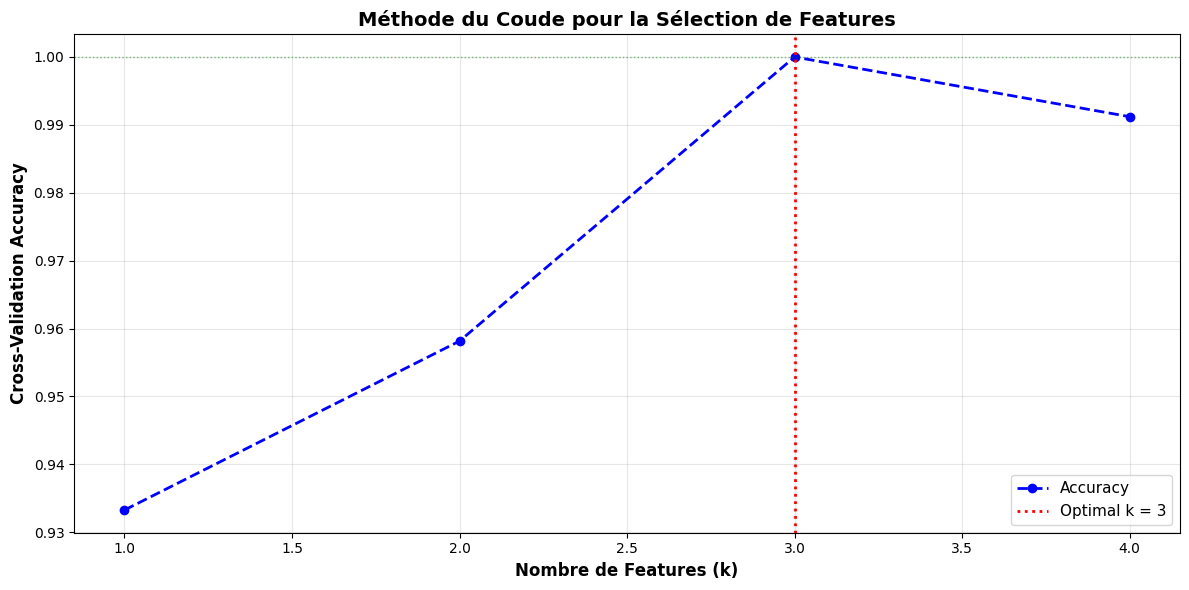


⏳ Sélection finale des features...

📊 TOP 3 FEATURES SÉLECTIONNÉES
             Feature  F-Score  Importance (%)
unique_topics_per_ip  7657.88           47.55
     requests_per_ip  4737.96           29.42
 general_application  3707.85           23.02

⏳ Génération du graphique des F-scores...


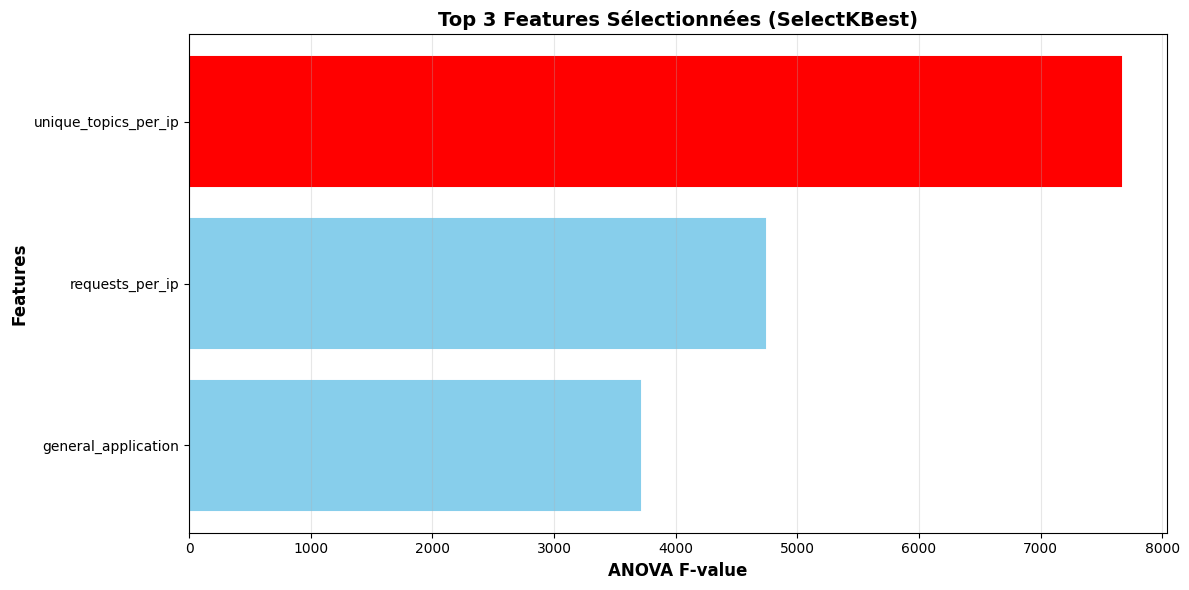


⏳ Génération du graphique des importances...


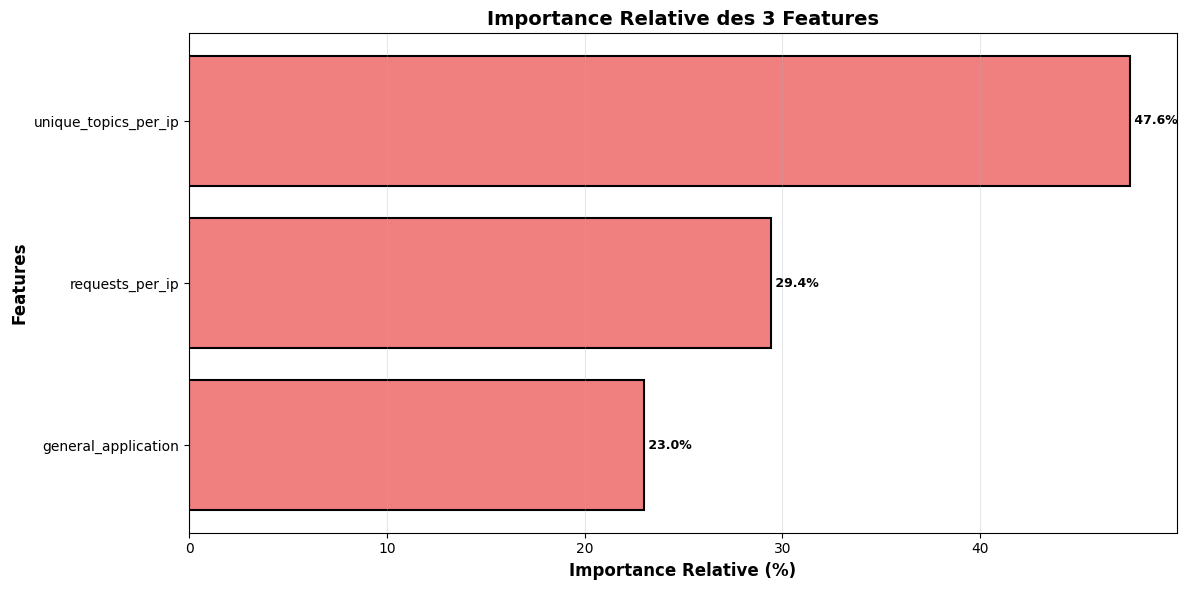


⏳ Création du dataset final...

✅ Dataset final créé:
   Shape: (4660, 4)
   Features: ['general_application', 'requests_per_ip', 'unique_topics_per_ip']

💾 Sauvegarder le dataset avec features sélectionnées? (o/n): n

✅ SÉLECTION DE FEATURES TERMINÉE

📊 RÉSUMÉ:
   • Nombre initial de features: 4
   • Nombre optimal de features:  3
   • Réduction:  25.0%
   • Accuracy avec features sélectionnées:  1.0000

🎯 TOP 5 FEATURES LES PLUS IMPORTANTES:
   1. unique_topics_per_ip: 47.55%
   2. requests_per_ip: 29.42%
   3. general_application: 23.02%

💡 VARIABLES DISPONIBLES:
   • X_final: Dataset avec features sélectionnées + is_ddos
   • selected_features: Liste des features sélectionnées
   • selector: Objet SelectKBest (pour transformer de nouvelles données)

✅ Mémoire nettoyée!


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt  # ✅ Corrigé (pas d'espace)
import gc

print("="*70)
print("🔧 SÉLECTION DES MEILLEURES FEATURES POUR is_ddos")
print("="*70)

# ============================================================
# ÉTAPE 1: PRÉPARER X ET y
# ============================================================
print("\n⏳ Préparation des données...")

# Créer une copie
data_for_selection = datatrainset. copy()

# Vérifier que is_ddos existe
if 'is_ddos' not in data_for_selection.columns:
    raise ValueError("❌ La colonne 'is_ddos' n'existe pas!  Créez d'abord la variable cible.")

# Séparer X et y
y = data_for_selection['is_ddos']. copy()

# Colonnes à exclure de X
cols_to_exclude = ['is_ddos', '@timestamp', 'timestamp_parsed',
                   'general_ip', 'general_mac', 'general_full_id',
                   'general_device_name', 'mqtt_message_value', 'mqtt_topic']

X = data_for_selection.drop(columns=[col for col in cols_to_exclude if col in data_for_selection.columns])

print(f"✅ Shape initiale de X: {X.shape}")
print(f"✅ Shape de y:  {y.shape}")
print(f"✅ Distribution de y:\n{y.value_counts()}")

# ============================================================
# ÉTAPE 2: TRAITER LES COLONNES DATETIME
# ============================================================
print("\n⏳ Traitement des dates...")

for col in X.select_dtypes(include=['datetime', 'datetime64']).columns:
    print(f"   Extraction des features de {col}...")
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X[col + '_hour'] = X[col].dt.hour
    X[col + '_dayofweek'] = X[col]. dt.dayofweek
    X. drop(columns=col, inplace=True)

# ============================================================
# ÉTAPE 3: ENCODER LES VARIABLES CATÉGORIELLES
# ============================================================
print("\n⏳ Encodage des variables catégorielles...")

le = LabelEncoder()
categorical_cols = X. select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    try:
        X[col] = X[col].fillna('MISSING')
        X[col] = le.fit_transform(X[col].astype(str))
        print(f"   ✓ {col} encodé")
    except Exception as e:
        print(f"   ✗ {col} ignoré: {str(e)}")
        X.drop(columns=col, inplace=True)

# ============================================================
# ÉTAPE 4: NETTOYER LES DONNÉES
# ============================================================
print("\n⏳ Nettoyage des données...")

# Supprimer les colonnes avec une seule valeur unique
X = X. loc[:, X.nunique() > 1]
print(f"   ✓ Après suppression des colonnes constantes:  {X.shape}")

# Gérer les valeurs manquantes
print(f"   Valeurs manquantes avant: {X.isna().sum().sum()}")
X = X.fillna(X.median())  # Remplir avec la médiane
print(f"   ✓ Valeurs manquantes remplies")

# Gérer les valeurs infinies
X = X. replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# S'assurer que X et y ont les mêmes indices
y = y. loc[X.index]

print(f"✅ Shape finale de X: {X.shape}")
print(f"✅ Shape finale de y: {y. shape}")

if X.shape[1] == 0:
    raise ValueError("❌ Aucune variable explicative valide après le prétraitement.")

# ============================================================
# ÉTAPE 5: SÉLECTION DE VARIABLES (MÉTHODE DU COUDE)
# ============================================================
print("\n⏳ Sélection des features avec méthode du coude...")
print("   (Cela peut prendre quelques minutes... )")

scores = []
k_range = range(1, min(X.shape[1] + 1, 31))  # Limiter à 30 max pour la RAM

for k in k_range:
    try:
        selector = SelectKBest(f_classif, k=k)
        X_selected = selector. fit_transform(X, y)

        # Cross-validation
        cv_scores = cross_val_score(
            LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
            X_selected, y, cv=5, scoring='accuracy'
        )
        scores.append(cv_scores.mean())

        if k % 5 == 0:
            print(f"   k={k}:  Accuracy = {cv_scores. mean():.4f}")
    except Exception as e:
        print(f"   ⚠️ Erreur pour k={k}:  {str(e)}")
        scores.append(0)

# Trouver le k optimal
optimal_k = k_range[scores.index(max(scores))]
print(f"\n✅ Nombre optimal de features:  {optimal_k}")
print(f"✅ Accuracy maximale:  {max(scores):.4f}")

# ============================================================
# ÉTAPE 6: VISUALISATION ELBOW
# ============================================================
print("\n⏳ Génération du graphique Elbow...")

plt.figure(figsize=(12, 6))
plt.plot(k_range, scores, marker='o', linestyle='--', color='b', linewidth=2, markersize=6, label='Accuracy')
plt.axvline(optimal_k, color='red', linestyle=':', linewidth=2, label=f'Optimal k = {optimal_k}')
plt.axhline(max(scores), color='green', linestyle=':', linewidth=1, alpha=0.5)
plt.title('Méthode du Coude pour la Sélection de Features', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de Features (k)', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Validation Accuracy', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 7: SÉLECTION FINALE DES VARIABLES
# ============================================================
print("\n⏳ Sélection finale des features...")

selector = SelectKBest(f_classif, k=optimal_k)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Importance relative
total_score = sum(feature_scores)
importance_percentages = [(s / total_score) * 100 for s in feature_scores]

# Afficher les résultats
print("\n" + "="*70)
print(f"📊 TOP {optimal_k} FEATURES SÉLECTIONNÉES")
print("="*70)

results_df = pd.DataFrame({
    'Feature': selected_features,
    'F-Score': feature_scores,
    'Importance (%)': importance_percentages
}).sort_values('F-Score', ascending=False)

print(results_df.to_string(index=False))

# ============================================================
# ÉTAPE 8: VISUALISATION DES F-SCORES
# ============================================================
print("\n⏳ Génération du graphique des F-scores...")

# Trier par importance
sorted_indices = np.argsort(feature_scores)
sorted_features = selected_features[sorted_indices]
sorted_scores = feature_scores[sorted_indices]

plt.figure(figsize=(12, max(6, len(sorted_features) * 0.4)))
bars = plt.barh(sorted_features, sorted_scores, color='skyblue', edgecolor='black', linewidth=1.5)  # ✅ Corrigé

# Colorer différemment selon l'importance
colors = ['red' if s > np. percentile(sorted_scores, 75) else
          'orange' if s > np.percentile(sorted_scores, 50) else
          'skyblue' for s in sorted_scores]
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('ANOVA F-value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Top {optimal_k} Features Sélectionnées (SelectKBest)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 9: VISUALISATION DES IMPORTANCES EN %
# ============================================================
print("\n⏳ Génération du graphique des importances...")

# Trier par importance
sorted_df = results_df.sort_values('Importance (%)', ascending=True)

plt.figure(figsize=(12, max(6, len(sorted_df) * 0.4)))
bars = plt.barh(sorted_df['Feature'], sorted_df['Importance (%)'],
                color='lightcoral', edgecolor='black', linewidth=1.5)

plt.xlabel('Importance Relative (%)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Importance Relative des {optimal_k} Features', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (feature, importance) in enumerate(zip(sorted_df['Feature'], sorted_df['Importance (%)'])):
    plt.text(importance, i, f' {importance:.1f}%', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 10: CRÉER LE DATASET AVEC FEATURES SÉLECTIONNÉES
# ============================================================
print("\n⏳ Création du dataset final...")

# Créer le dataset final avec les features sélectionnées
X_final = pd.DataFrame(X_selected, columns=selected_features, index=X.index)
X_final['is_ddos'] = y

print(f"\n✅ Dataset final créé:")
print(f"   Shape: {X_final.shape}")
print(f"   Features: {list(selected_features)}")

# Sauvegarder (optionnel)
save_choice = input("\n💾 Sauvegarder le dataset avec features sélectionnées? (o/n): ").strip().lower()

if save_choice == 'o':
    X_final. to_csv('dataset_selected_features.csv', index=False)
    print("✅ Sauvegardé:  'dataset_selected_features. csv'")

    # Sauvegarder la liste des features
    with open('selected_features.txt', 'w') as f:
        for feat in selected_features:
            f.write(f"{feat}\n")
    print("✅ Liste des features sauvegardée: 'selected_features.txt'")

# ============================================================
# RÉSUMÉ FINAL
# ============================================================
print("\n" + "="*70)
print("✅ SÉLECTION DE FEATURES TERMINÉE")
print("="*70)

print(f"\n📊 RÉSUMÉ:")
print(f"   • Nombre initial de features: {X.shape[1]}")
print(f"   • Nombre optimal de features:  {optimal_k}")
print(f"   • Réduction:  {(1 - optimal_k/X.shape[1])*100:.1f}%")
print(f"   • Accuracy avec features sélectionnées:  {max(scores):.4f}")

print(f"\n🎯 TOP 5 FEATURES LES PLUS IMPORTANTES:")
for i, (feat, imp) in enumerate(zip(results_df['Feature']. head(5),
                                     results_df['Importance (%)'].head(5)), 1):
    print(f"   {i}. {feat}: {imp:.2f}%")

print(f"\n💡 VARIABLES DISPONIBLES:")
print(f"   • X_final: Dataset avec features sélectionnées + is_ddos")
print(f"   • selected_features: Liste des features sélectionnées")
print(f"   • selector: Objet SelectKBest (pour transformer de nouvelles données)")

# Nettoyer la mémoire
del data_for_selection, X, X_selected
gc.collect()
print("\n✅ Mémoire nettoyée!")

📊 ANALYSE EN COMPOSANTES PRINCIPALES (PCA)

⏳ Préparation des données...
✅ Shape initiale: (4660, 11)

⏳ Encodage des variables catégorielles...
   ✓ general_application encodé
   ✓ mqtt_duplicate encodé
   ✓ mqtt_message_type encodé
   ✓ mqtt_retained encodé
   ✓ day_of_week encodé

⏳ Nettoyage des données...
   Colonnes numériques: 11
   Après suppression des constantes: (4660, 4)
   Valeurs manquantes: 0
✅ Shape finale: (4660, 4)

⏳ Standardisation des données...
✅ Données standardisées (moyenne=0, std=1)

⏳ Application de la PCA...
✅ PCA calculée:  4 composantes

📊 VARIANCE EXPLIQUÉE PAR COMPOSANTE
PC1: 62.56% (Cumulé: 62.56%)
PC2: 25.34% (Cumulé: 87.90%)
PC3: 11.56% (Cumulé: 99.46%)
PC4: 0.54% (Cumulé: 100.00%)

📊 NOMBRE DE COMPOSANTES NÉCESSAIRES:
   • Pour 80% de variance: 2 composantes
   • Pour 90% de variance: 3 composantes
   • Pour 95% de variance: 3 composantes

⏳ Génération du Scree Plot...


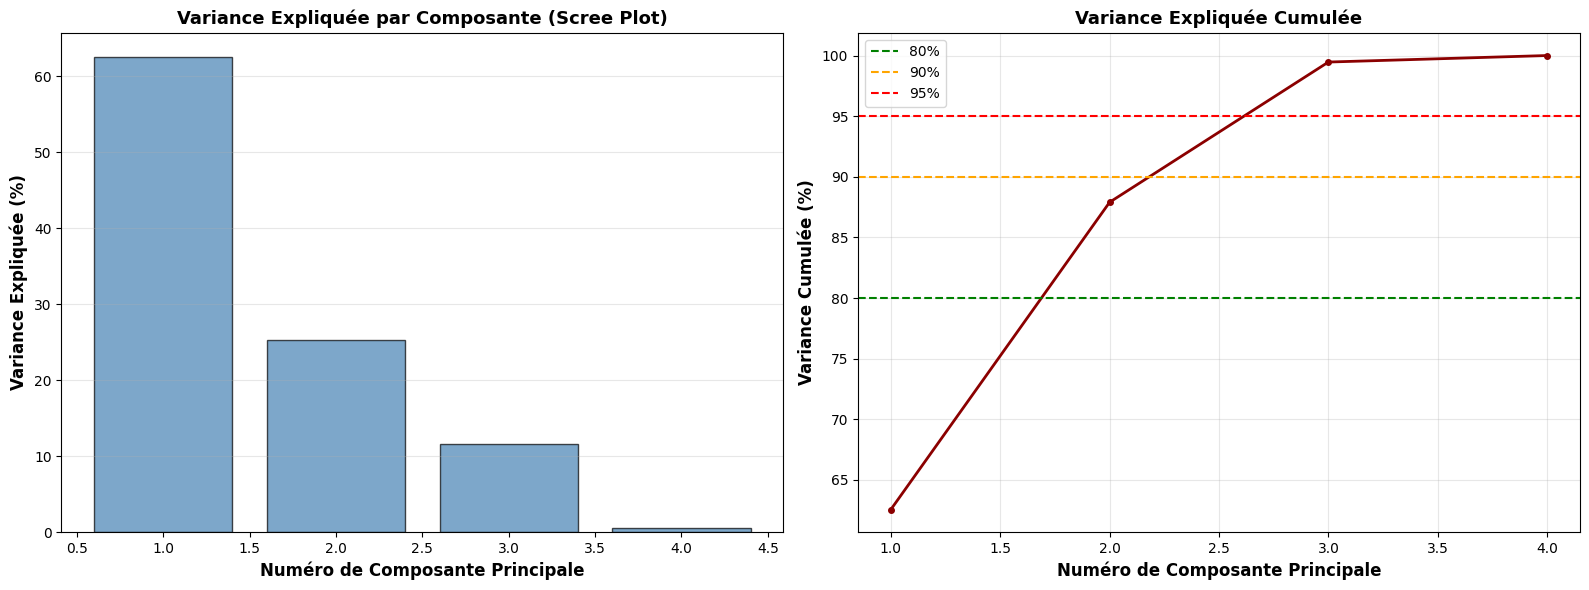


⏳ Projection sur les 2 premières composantes principales...


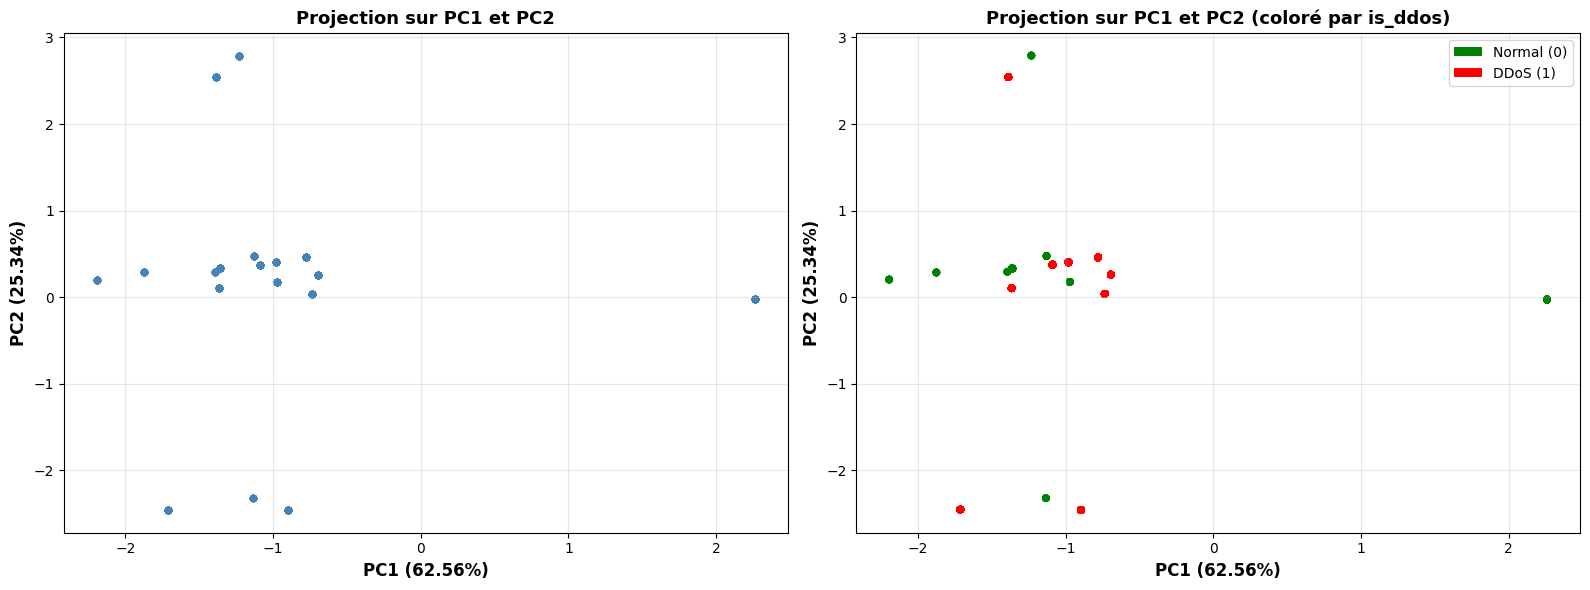


⏳ Analyse des contributions des variables...

📊 TOP 15 VARIABLES CONTRIBUANT LE PLUS À PC1 ET PC2:
                      PC1   PC2  contribution
mqtt_message_type    0.10  0.99          0.99
unique_topics_per_ip 0.96 -0.10          0.97
requests_per_ip      0.96 -0.11          0.97
general_application  0.81  0.13          0.82


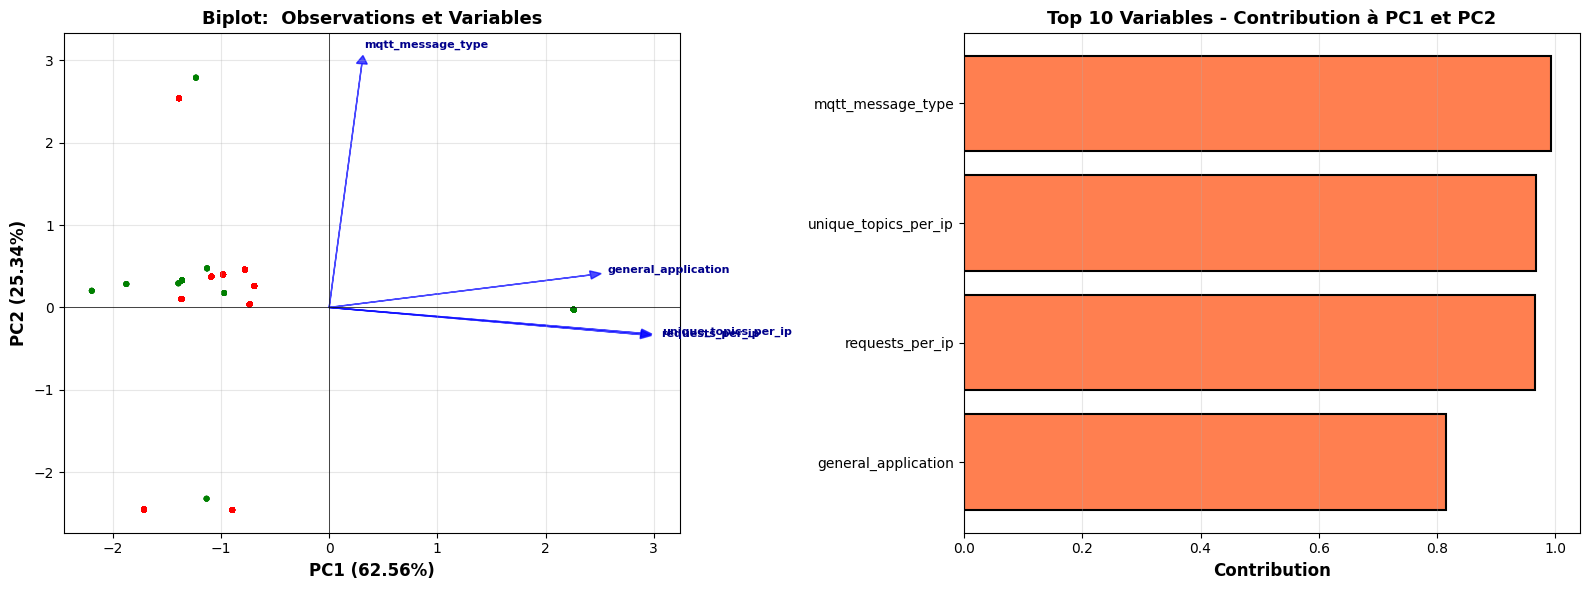


⏳ Création d'un dataset avec composantes principales...

✅ Dataset réduit créé:
   Shape: (4660, 4)
   Variance expliquée: 99.46%

✅ PCA TERMINÉE

📊 RÉSUMÉ:
   • Nombre de variables originales: 4
   • Nombre de composantes (90% variance): 3
   • Réduction dimensionnelle: 25.0%
   • Variance totale conservée: 99.46%

💡 VARIABLES DISPONIBLES:
   • pca_final_df:  Dataset avec composantes principales + is_ddos
   • acp: Objet PCA complet (toutes composantes)
   • pca_final: Objet PCA optimal (3 composantes)
   • scaler: StandardScaler (pour transformer de nouvelles données)

✅ Mémoire nettoyée!


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import gc

print("="*70)
print("📊 ANALYSE EN COMPOSANTES PRINCIPALES (PCA)")
print("="*70)

# ============================================================
# ÉTAPE 1: PRÉPARER LES DONNÉES
# ============================================================
print("\n⏳ Préparation des données...")

# Créer une copie
data_for_pca = datatrainset.copy()

# Colonnes à exclure
cols_to_exclude = ['is_ddos', '@timestamp', 'timestamp_parsed',
                   'general_ip', 'general_mac', 'general_full_id',
                   'general_device_name', 'mqtt_message_value', 'mqtt_topic']

# Garder is_ddos séparément pour la visualisation
y = data_for_pca['is_ddos']. copy() if 'is_ddos' in data_for_pca. columns else None

# Supprimer les colonnes à exclure
X = data_for_pca. drop(columns=[col for col in cols_to_exclude if col in data_for_pca.columns])

print(f"✅ Shape initiale: {X.shape}")

# ============================================================
# ÉTAPE 2: ENCODER LES VARIABLES CATÉGORIELLES
# ============================================================
print("\n⏳ Encodage des variables catégorielles...")

le = LabelEncoder()
for col in X.select_dtypes(include=['object', 'bool']).columns:
    try:
        X[col] = X[col].fillna('MISSING')
        X[col] = le.fit_transform(X[col]. astype(str))
        print(f"   ✓ {col} encodé")
    except Exception as e:
        print(f"   ✗ {col} ignoré: {str(e)}")
        X. drop(columns=col, inplace=True)

# ============================================================
# ÉTAPE 3: NETTOYER LES DONNÉES
# ============================================================
print("\n⏳ Nettoyage des données...")

# Sélectionner seulement les colonnes numériques
numerical_cols = X.select_dtypes(include=[np. number])

print(f"   Colonnes numériques: {numerical_cols.shape[1]}")

# Supprimer les colonnes constantes
numerical_cols = numerical_cols. loc[:, numerical_cols.nunique() > 1]
print(f"   Après suppression des constantes: {numerical_cols. shape}")

# Gérer les valeurs manquantes
print(f"   Valeurs manquantes: {numerical_cols.isna().sum().sum()}")
numerical_cols = numerical_cols.fillna(numerical_cols. median())

# Gérer les valeurs infinies
numerical_cols = numerical_cols.replace([np.inf, -np.inf], np.nan)
numerical_cols = numerical_cols.fillna(numerical_cols.median())

print(f"✅ Shape finale: {numerical_cols.shape}")

# ============================================================
# ÉTAPE 4: STANDARDISATION (CRUCIAL POUR PCA)
# ============================================================
print("\n⏳ Standardisation des données...")

scaler = StandardScaler()
numerical_cols_scaled = scaler. fit_transform(numerical_cols)

print("✅ Données standardisées (moyenne=0, std=1)")

# ============================================================
# ÉTAPE 5: APPLIQUER PCA
# ============================================================
print("\n⏳ Application de la PCA...")

acp = PCA()
acp.fit(numerical_cols_scaled)

# Obtenir le ratio de variance expliquée
explained_variance_ratio = acp.explained_variance_ratio_

# Calculer la variance expliquée cumulée
cumulative_variance = explained_variance_ratio.cumsum()

print(f"✅ PCA calculée:  {len(explained_variance_ratio)} composantes")

# ============================================================
# ÉTAPE 6: AFFICHER LES STATISTIQUES
# ============================================================
print("\n" + "="*70)
print("📊 VARIANCE EXPLIQUÉE PAR COMPOSANTE")
print("="*70)

for i in range(min(10, len(explained_variance_ratio))):
    print(f"PC{i+1}: {explained_variance_ratio[i]*100:.2f}% (Cumulé: {cumulative_variance[i]*100:.2f}%)")

# Trouver le nombre de composantes pour 80%, 90%, 95%
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np. argmax(cumulative_variance >= 0.95) + 1

print(f"\n📊 NOMBRE DE COMPOSANTES NÉCESSAIRES:")
print(f"   • Pour 80% de variance: {n_components_80} composantes")
print(f"   • Pour 90% de variance: {n_components_90} composantes")
print(f"   • Pour 95% de variance: {n_components_95} composantes")

# ============================================================
# ÉTAPE 7: VISUALISATION - SCREE PLOT
# ============================================================
print("\n⏳ Génération du Scree Plot...")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Variance expliquée par composante
n_to_show = min(30, len(explained_variance_ratio))
axs[0].bar(range(1, n_to_show + 1), explained_variance_ratio[:n_to_show]*100,
           color='steelblue', edgecolor='black', alpha=0.7)
axs[0].set_xlabel('Numéro de Composante Principale', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Variance Expliquée (%)', fontsize=12, fontweight='bold')
axs[0].set_title('Variance Expliquée par Composante (Scree Plot)', fontsize=13, fontweight='bold')
axs[0].grid(axis='y', alpha=0.3)

# Graphique 2: Variance cumulée
axs[1]. plot(range(1, n_to_show + 1), cumulative_variance[:n_to_show]*100,
            marker='o', linewidth=2, markersize=4, color='darkred')
axs[1].axhline(80, color='green', linestyle='--', linewidth=1.5, label='80%')
axs[1].axhline(90, color='orange', linestyle='--', linewidth=1.5, label='90%')
axs[1].axhline(95, color='red', linestyle='--', linewidth=1.5, label='95%')
axs[1].set_xlabel('Numéro de Composante Principale', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Variance Cumulée (%)', fontsize=12, fontweight='bold')
axs[1].set_title('Variance Expliquée Cumulée', fontsize=13, fontweight='bold')
axs[1].legend(fontsize=10)
axs[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 8: PROJECTION SUR LES 2 PREMIÈRES COMPOSANTES
# ============================================================
print("\n⏳ Projection sur les 2 premières composantes principales...")

# Transformer les données
X_pca = acp.transform(numerical_cols_scaled)

# Créer un DataFrame avec les composantes principales
pca_df = pd.DataFrame(
    X_pca[: , :2],
    columns=['PC1', 'PC2'],
    index=numerical_cols. index
)

if y is not None:
    pca_df['is_ddos'] = y.loc[pca_df. index]

# Visualisation
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Sans coloration
axs[0]. scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, s=20, color='steelblue')
axs[0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}%)', fontsize=12, fontweight='bold')
axs[0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}%)', fontsize=12, fontweight='bold')
axs[0].set_title('Projection sur PC1 et PC2', fontsize=13, fontweight='bold')
axs[0].grid(alpha=0.3)

# Graphique 2: Avec coloration par is_ddos
if y is not None:
    colors = ['green' if x == 0 else 'red' for x in pca_df['is_ddos']]
    axs[1].scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.5, s=20)
    axs[1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}%)', fontsize=12, fontweight='bold')
    axs[1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}%)', fontsize=12, fontweight='bold')
    axs[1].set_title('Projection sur PC1 et PC2 (coloré par is_ddos)', fontsize=13, fontweight='bold')

    # Légende
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', label='Normal (0)'),
                      Patch(facecolor='red', label='DDoS (1)')]
    axs[1].legend(handles=legend_elements, fontsize=10)
    axs[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 9: CONTRIBUTION DES VARIABLES (LOADING PLOT)
# ============================================================
print("\n⏳ Analyse des contributions des variables...")

# Récupérer les loadings (composantes)
loadings = acp.components_. T * np.sqrt(acp.explained_variance_)

# Créer un DataFrame avec les loadings
loading_df = pd.DataFrame(
    loadings[: , :2],
    columns=['PC1', 'PC2'],
    index=numerical_cols. columns
)

# Calculer la contribution totale aux 2 premières composantes
loading_df['contribution'] = np.sqrt(loading_df['PC1']**2 + loading_df['PC2']**2)
loading_df = loading_df.sort_values('contribution', ascending=False)

# Afficher les top 15
print("\n📊 TOP 15 VARIABLES CONTRIBUANT LE PLUS À PC1 ET PC2:")
print(loading_df.head(15).to_string())

# Visualisation - Biplot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Scatter des observations
if y is not None:
    colors = ['green' if x == 0 else 'red' for x in pca_df['is_ddos']]
    axs[0].scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=0.3, s=10)
else:
    axs[0]. scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3, s=10, color='steelblue')

# Ajouter les vecteurs des top 10 variables
top_10_vars = loading_df.head(10)
for var in top_10_vars.index:
    axs[0]. arrow(0, 0, loading_df.loc[var, 'PC1']*3, loading_df.loc[var, 'PC2']*3,
                 head_width=0.1, head_length=0.1, fc='blue', ec='blue', alpha=0.7)
    axs[0].text(loading_df.loc[var, 'PC1']*3.2, loading_df.loc[var, 'PC2']*3.2,
                var, fontsize=8, color='darkblue', fontweight='bold')

axs[0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}%)', fontsize=12, fontweight='bold')
axs[0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}%)', fontsize=12, fontweight='bold')
axs[0].set_title('Biplot:  Observations et Variables', fontsize=13, fontweight='bold')
axs[0].grid(alpha=0.3)
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].axvline(0, color='black', linewidth=0.5)

# Graphique 2: Contribution des top 10 variables
axs[1].barh(range(len(top_10_vars)), top_10_vars['contribution'],
            color='coral', edgecolor='black', linewidth=1.5)
axs[1].set_yticks(range(len(top_10_vars)))
axs[1].set_yticklabels(top_10_vars. index, fontsize=10)
axs[1].set_xlabel('Contribution', fontsize=12, fontweight='bold')
axs[1].set_title('Top 10 Variables - Contribution à PC1 et PC2', fontsize=13, fontweight='bold')
axs[1].invert_yaxis()
axs[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 10: CRÉER UN DATASET RÉDUIT
# ============================================================
print("\n⏳ Création d'un dataset avec composantes principales...")

# Choisir le nombre de composantes (90% de variance)
n_components_final = n_components_90

# Transformer avec le nombre optimal de composantes
pca_final = PCA(n_components=n_components_final)
X_pca_final = pca_final.fit_transform(numerical_cols_scaled)

# Créer un DataFrame
pca_final_df = pd.DataFrame(
    X_pca_final,
    columns=[f'PC{i+1}' for i in range(n_components_final)],
    index=numerical_cols.index
)

if y is not None:
    pca_final_df['is_ddos'] = y.loc[pca_final_df.index]

print(f"\n✅ Dataset réduit créé:")
print(f"   Shape: {pca_final_df.shape}")
print(f"   Variance expliquée: {pca_final.explained_variance_ratio_.sum()*100:.2f}%")

# ============================================================
# RÉSUMÉ FINAL
# ============================================================
print("\n" + "="*70)
print("✅ PCA TERMINÉE")
print("="*70)

print(f"\n📊 RÉSUMÉ:")
print(f"   • Nombre de variables originales: {numerical_cols.shape[1]}")
print(f"   • Nombre de composantes (90% variance): {n_components_final}")
print(f"   • Réduction dimensionnelle: {(1 - n_components_final/numerical_cols.shape[1])*100:.1f}%")
print(f"   • Variance totale conservée: {pca_final.explained_variance_ratio_.sum()*100:.2f}%")

print(f"\n💡 VARIABLES DISPONIBLES:")
print(f"   • pca_final_df:  Dataset avec composantes principales + is_ddos")
print(f"   • acp: Objet PCA complet (toutes composantes)")
print(f"   • pca_final: Objet PCA optimal ({n_components_final} composantes)")
print(f"   • scaler: StandardScaler (pour transformer de nouvelles données)")

# Nettoyer la mémoire
del data_for_pca, X, numerical_cols_scaled
gc.collect()
print("\n✅ Mémoire nettoyée!")


📊 CERCLES DE CORRÉLATION PCA

📊 Option 1: Cercle complet (toutes les variables)
──────────────────────────────────────────────────────────────────────


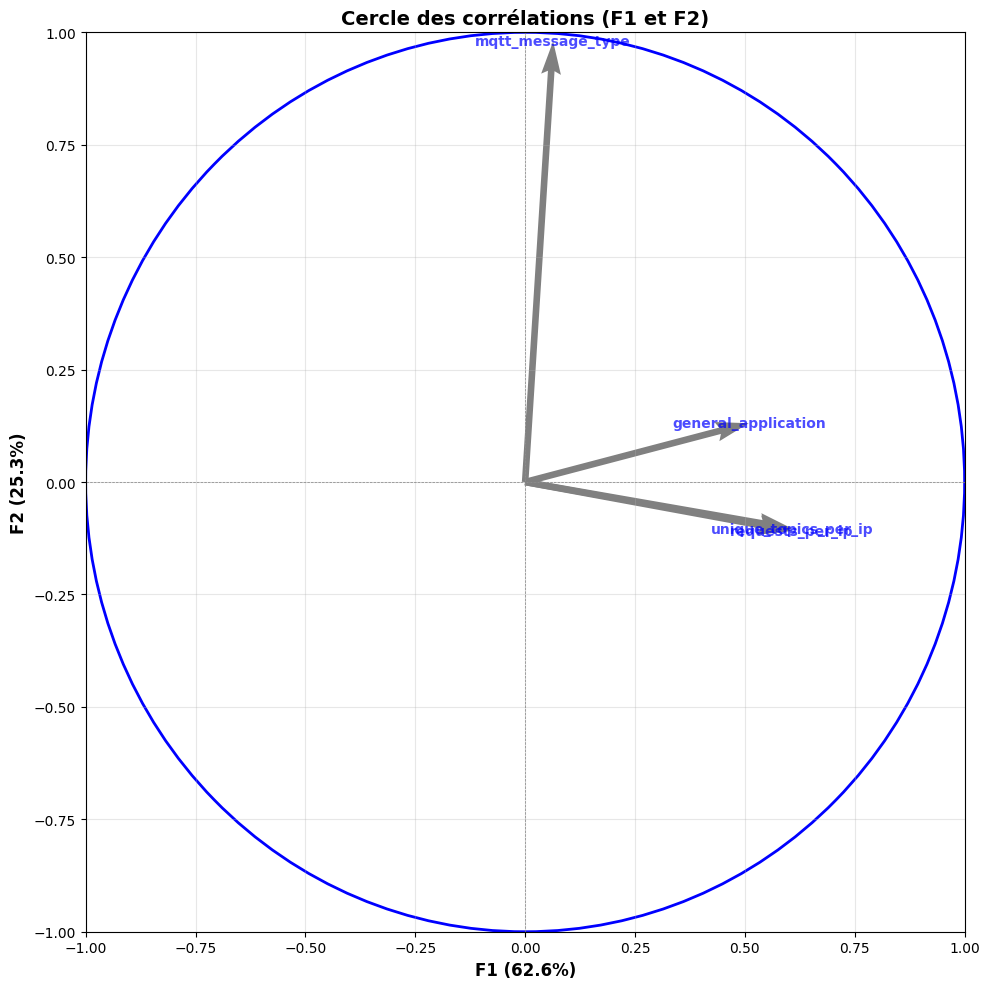


📊 Option 2: Cercles par batch (économie de RAM)
──────────────────────────────────────────────────────────────────────

⏳ Génération de 1 cercles de corrélation...


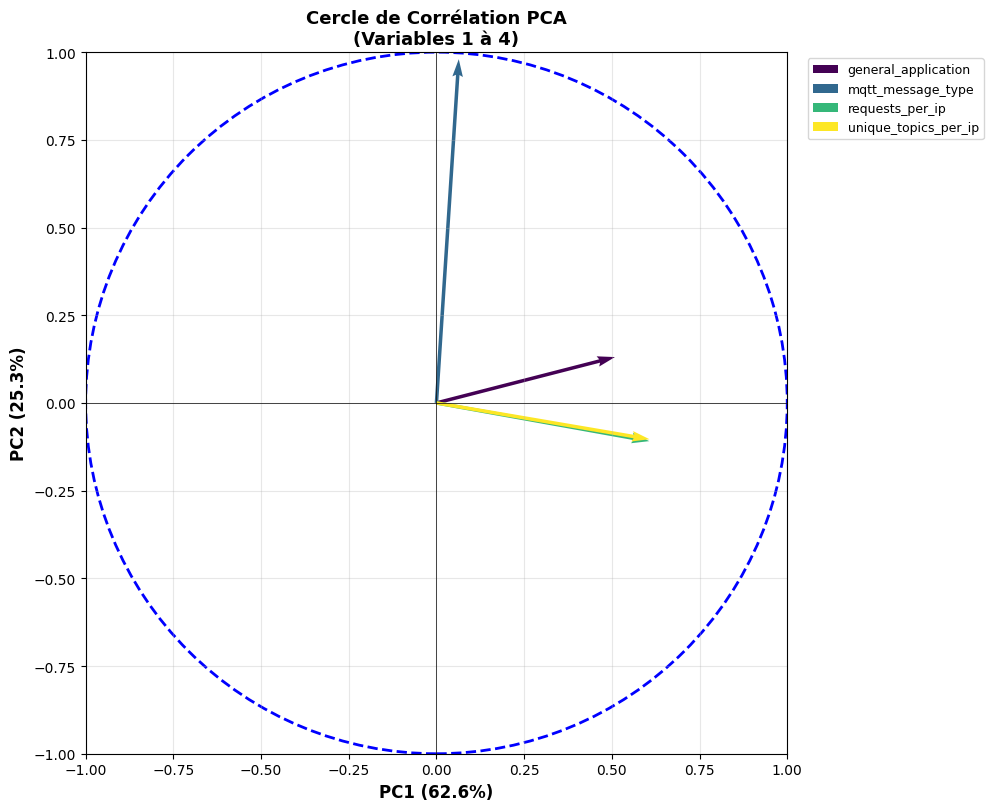

✅ 1 cercles générés

📊 Option 3: Top 15 variables les plus contributives
──────────────────────────────────────────────────────────────────────


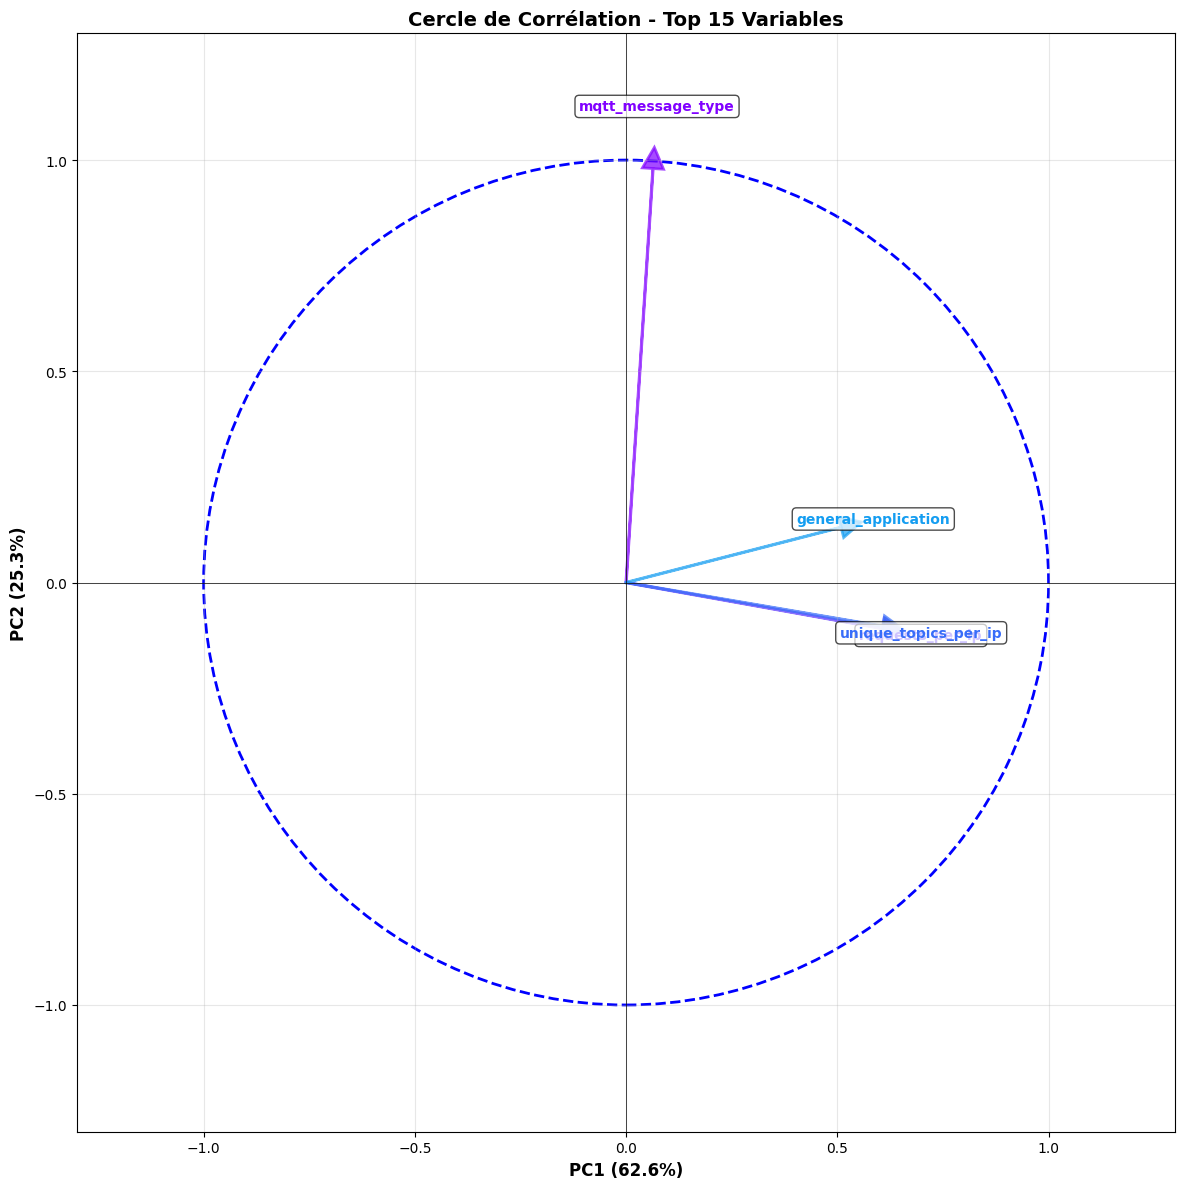


📊 Option 4: Plusieurs plans factoriels
──────────────────────────────────────────────────────────────────────


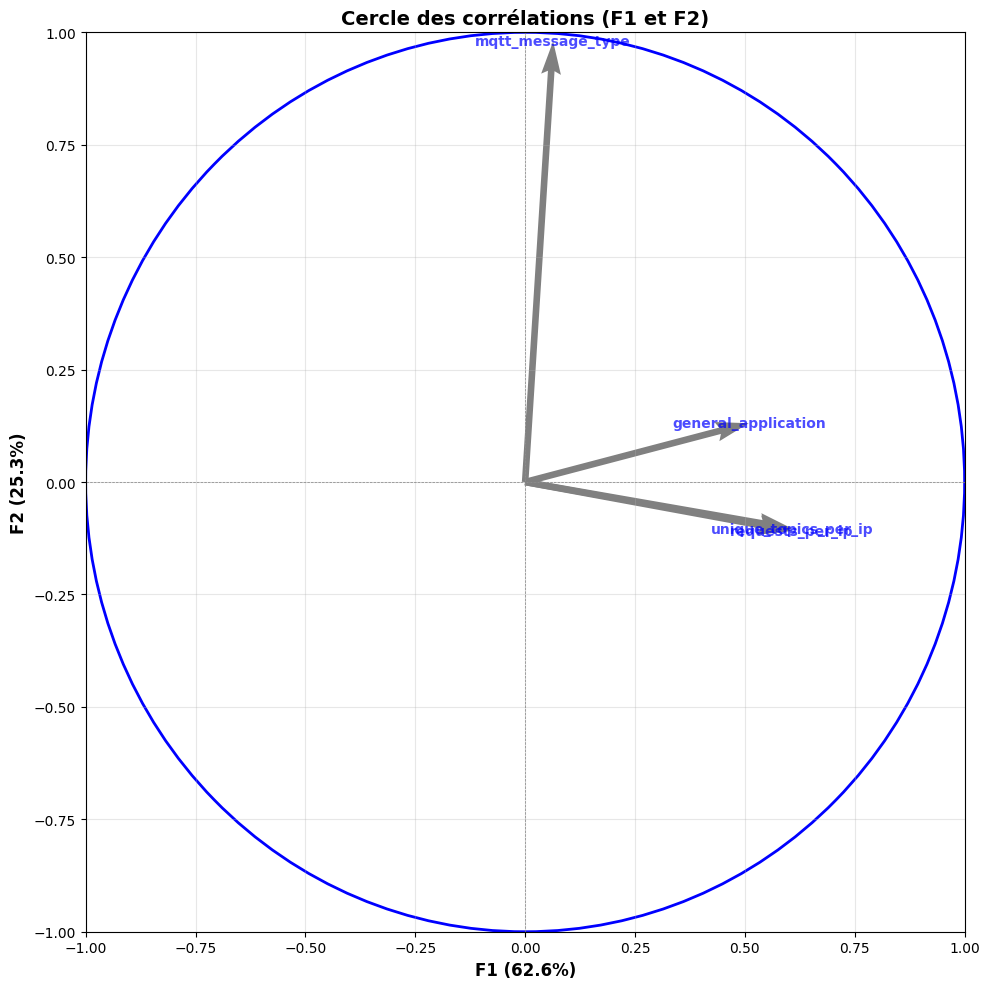

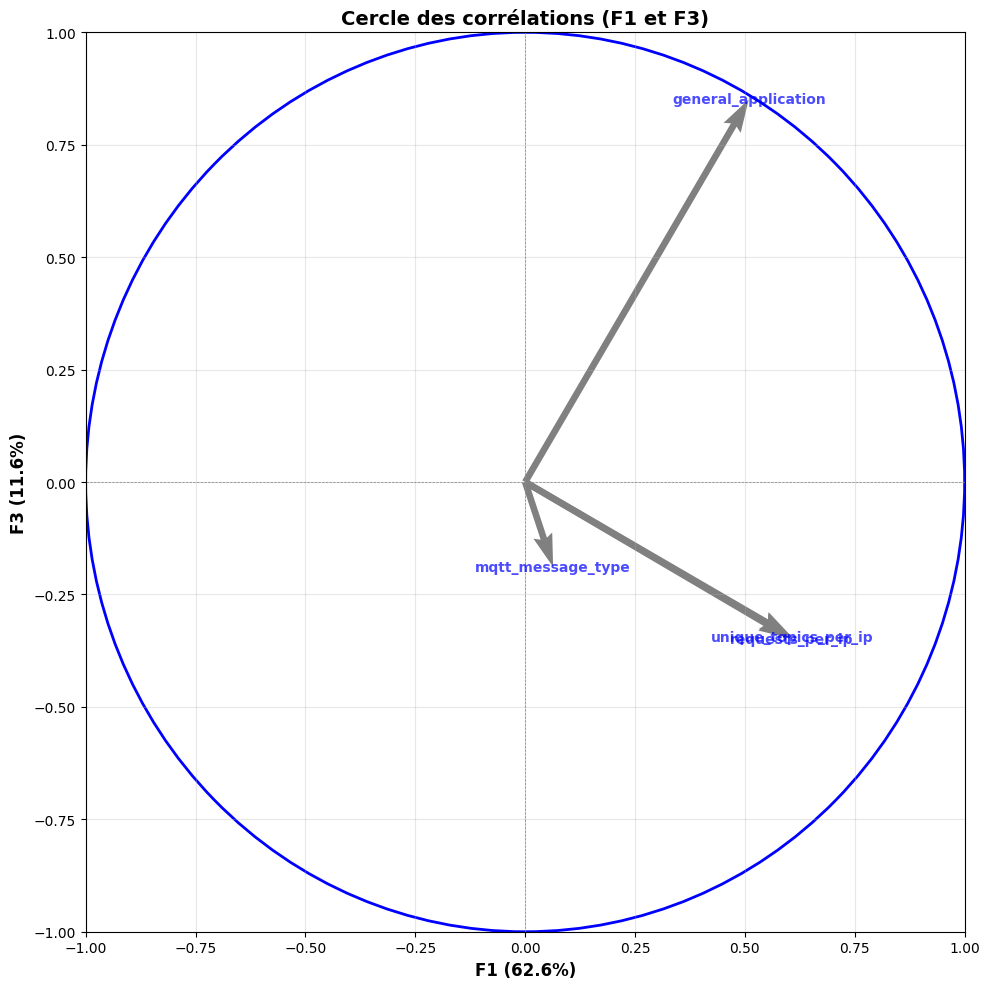

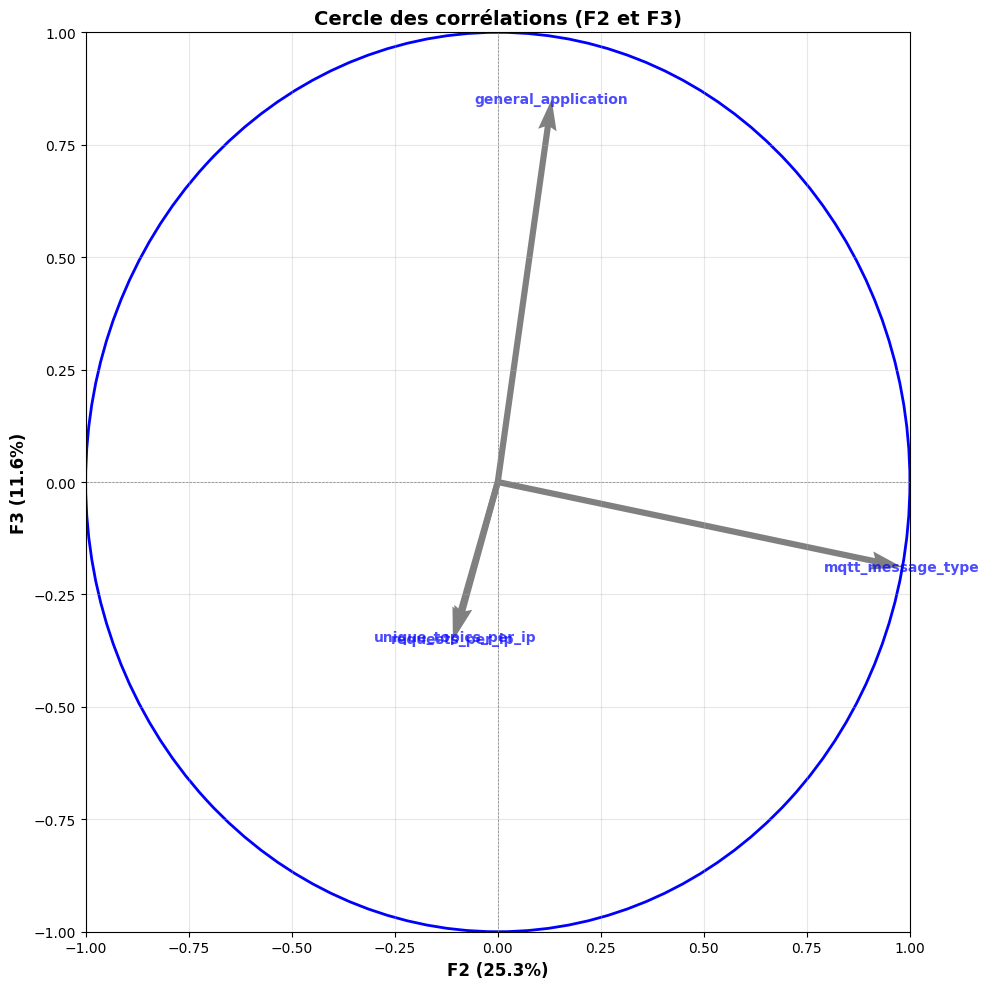


✅ Tous les cercles de corrélation ont été générés!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.collections import LineCollection

print("\n" + "="*70)
print("📊 CERCLES DE CORRÉLATION PCA")
print("="*70)

# ============================================================
# FONCTION 1: CERCLE DE CORRÉLATION COMPLET
# ============================================================
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """
    Affiche le cercle des corrélations pour la PCA

    Paramètres:
    -----------
    pcs :  array, composantes principales
    n_comp : int, nombre de composantes
    pca : objet PCA
    axis_ranks : list de tuples, paires d'axes à afficher
    labels : list, noms des variables
    label_rotation : int, rotation des labels
    lims : tuple, limites du graphique (xmin, xmax, ymin, ymax)
    """
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            # Initialisation de la figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # Détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # Affichage des flèches
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=0.1, color='black'))

            # Affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize=10, ha='center', va='center',
                                 rotation=label_rotation, color="blue", alpha=0.7, fontweight='bold')

            # Affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', linewidth=2)
            plt.gca().add_artist(circle)

            # Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--', linewidth=0.5)
            plt.plot([0, 0], [-1, 1], color='grey', ls='--', linewidth=0.5)

            # Nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)),
                       fontsize=12, fontweight='bold')
            plt.ylabel('F{} ({}%)'.format(d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)),
                       fontsize=12, fontweight='bold')

            plt.title("Cercle des corrélations (F{} et F{})".format(d1 + 1, d2 + 1),
                      fontsize=14, fontweight='bold')
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()

# ============================================================
# FONCTION 2: CERCLE PAR BATCH (OPTIMISÉ RAM)
# ============================================================
def afficher_circles(pca, df, batch_size=4):
    """
    Affiche les cercles de corrélation par batch pour économiser la mémoire

    Paramètres:
    -----------
    pca : objet PCA
    df : DataFrame, données utilisées pour la PCA
    batch_size : int, nombre de variables à afficher par graphique
    """
    composantes = pca.components_
    num_features = df.shape[1]
    colors = cm.viridis(np.linspace(0, 1, num_features))

    print(f"\n⏳ Génération de {int(np.ceil(num_features / batch_size))} cercles de corrélation...")

    for i in range(0, num_features, batch_size):
        plt.figure(figsize=(10, 10))

        # Cercle de corrélation
        circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=2)
        plt.gca().add_artist(circle)

        # Afficher les flèches pour ce batch
        for j in range(i, min(i + batch_size, num_features)):
            plt.quiver(0, 0, composantes[0, j], composantes[1, j],
                       angles='xy', scale_units='xy', scale=1,
                       label=df.columns[j], color=colors[j], width=0.005)

        # Configuration du graphique
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)

        # Axes
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)',
                   fontsize=12, fontweight='bold')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)',
                   fontsize=12, fontweight='bold')

        # Légende et titre
        plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
        plt.title(f'Cercle de Corrélation PCA\n(Variables {i+1} à {min(i+batch_size, num_features)})',
                  fontsize=13, fontweight='bold')
        plt.gca().set_aspect('equal', adjustable='box')

        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

    print(f"✅ {int(np.ceil(num_features / batch_size))} cercles générés")

# ============================================================
# FONCTION 3: CERCLE AVEC TOP VARIABLES
# ============================================================
def afficher_circle_top_variables(pca, df, top_n=15):
    """
    Affiche seulement les top N variables les plus contributives

    Paramètres:
    -----------
    pca : objet PCA
    df : DataFrame
    top_n : int, nombre de variables à afficher
    """
    composantes = pca. components_

    # Calculer la contribution de chaque variable aux 2 premières composantes
    contributions = np.sqrt(composantes[0, :]**2 + composantes[1, :]**2)

    # Obtenir les indices des top variables
    top_indices = np.argsort(contributions)[::-1][:top_n]

    # Visualisation
    plt.figure(figsize=(12, 12))

    # Cercle
    circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_artist(circle)

    # Couleurs
    colors = cm.rainbow(np.linspace(0, 1, top_n))

    # Afficher les flèches
    for idx, i in enumerate(top_indices):
        x, y = composantes[0, i], composantes[1, i]
        plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05,
                  fc=colors[idx], ec=colors[idx], linewidth=2, alpha=0.7)
        plt.text(x*1.15, y*1.15, df.columns[i], fontsize=10, ha='center', va='center',
                 color=colors[idx], fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

    # Configuration
    plt.xlim(-1.3, 1.3)
    plt.ylim(-1.3, 1.3)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)',
               fontsize=12, fontweight='bold')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)',
               fontsize=12, fontweight='bold')

    plt.title(f'Cercle de Corrélation - Top {top_n} Variables',
              fontsize=14, fontweight='bold')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# ============================================================
# UTILISATION DES FONCTIONS
# ============================================================

print("\n📊 Option 1: Cercle complet (toutes les variables)")
print("─" * 70)

# Récupérer les composantes principales
composantes = acp.components_

# Afficher le cercle de corrélation pour PC1 vs PC2
display_circles(
    pcs=composantes,
    n_comp=acp.n_components_,
    pca=acp,
    axis_ranks=[(0, 1)],  # PC1 vs PC2
    labels=numerical_cols. columns,
    label_rotation=0,
    lims=None
)

print("\n📊 Option 2: Cercles par batch (économie de RAM)")
print("─" * 70)

# Afficher par batch de 6 variables
afficher_circles(acp, numerical_cols, batch_size=6)

print("\n📊 Option 3: Top 15 variables les plus contributives")
print("─" * 70)

# Afficher seulement les top 15 variables
afficher_circle_top_variables(acp, numerical_cols, top_n=15)

# ============================================================
# AFFICHER PLUSIEURS PLANS FACTORIELS
# ============================================================
print("\n📊 Option 4: Plusieurs plans factoriels")
print("─" * 70)

# PC1 vs PC2, PC1 vs PC3, PC2 vs PC3
display_circles(
    pcs=composantes,
    n_comp=min(5, acp.n_components_),
    pca=acp,
    axis_ranks=[(0, 1), (0, 2), (1, 2)],  # Plusieurs paires
    labels=numerical_cols.columns,
    label_rotation=0,
    lims=None
)

print("\n✅ Tous les cercles de corrélation ont été générés!")

📊 ANALYSE PCA ET CONTRIBUTIONS DES FEATURES

⏳ Préparation des données...
✅ Shape de X: (4660, 4)
✅ Shape de y: (4660,)

⏳ Application de l'ACP (2 composantes)...
✅ PCA 2D appliquée

📊 VARIANCE EXPLIQUÉE

Variance expliquée par chaque composante principale:
   PC1: 99.99%
   PC2: 0.01%

Variance expliquée cumulée:
   PC1 à PC1: 99.99%
   PC1 à PC2: 100.00%

📊 CONTRIBUTIONS DES FEATURES

📊 TOP 15 Contributions à PC1 (en pourcentage):
requests_per_ip        98.99
general_application     0.56
unique_topics_per_ip    0.45
mqtt_message_type       0.00
Name: PC1, dtype: float64

📊 TOP 15 Contributions à PC2 (en pourcentage):
general_application    96.50
mqtt_message_type       1.62
unique_topics_per_ip    1.33
requests_per_ip         0.55
Name: PC2, dtype: float64

⏳ Génération des graphiques en camembert...


/tmp/ipython-input-3080689572.py:99: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap(colormap)(np.linspace(0.3, 1, n))


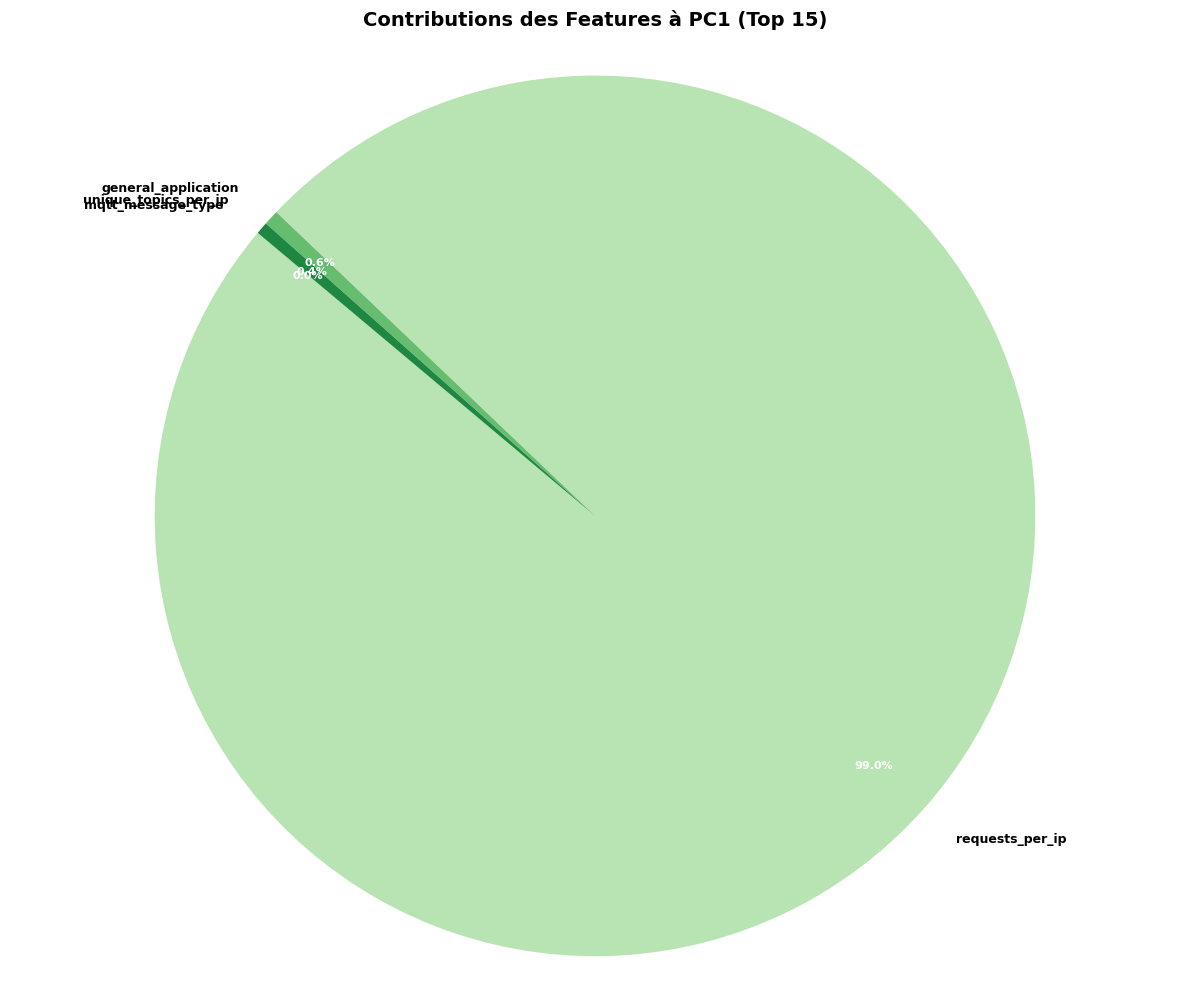

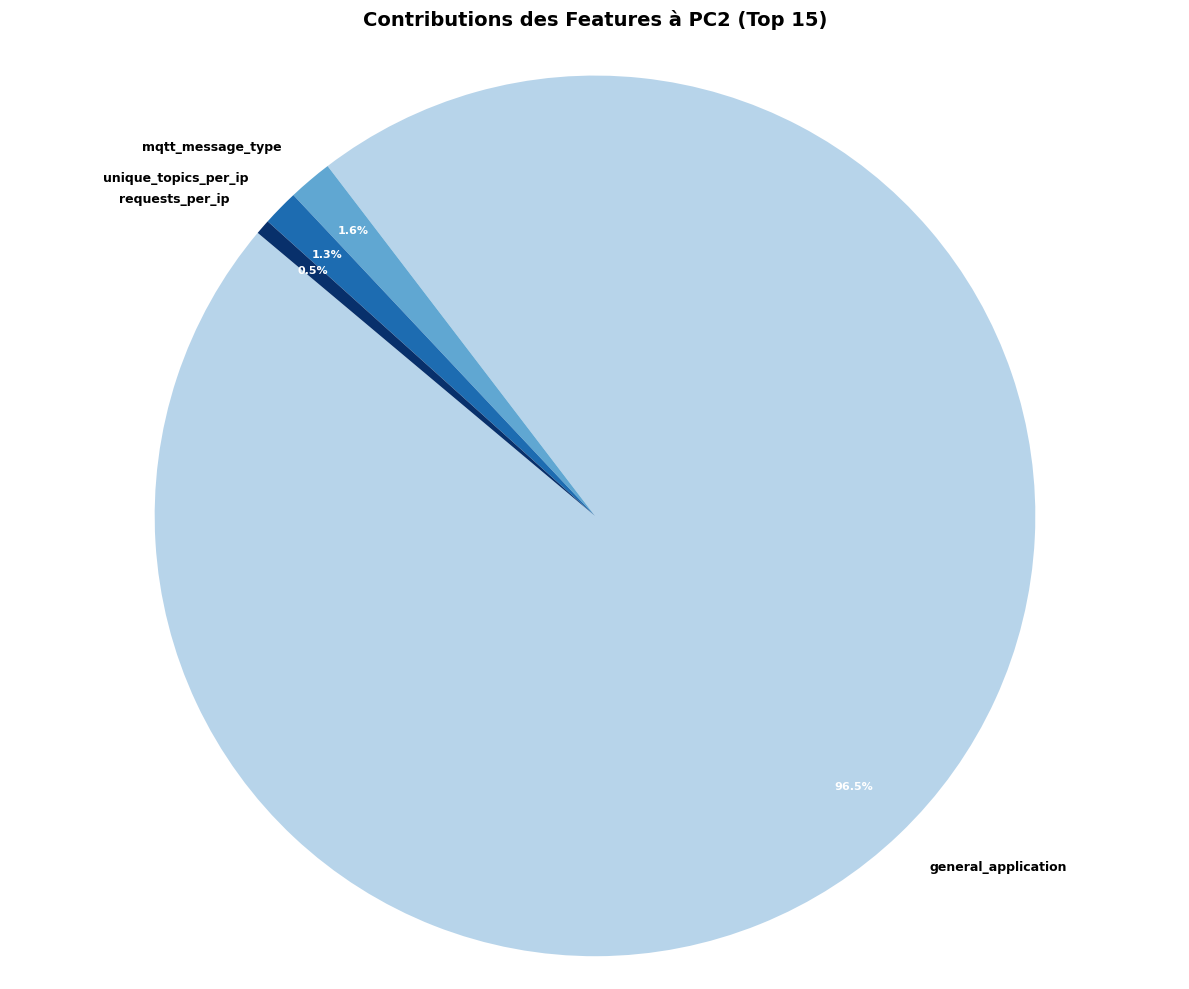


⏳ Génération des graphiques à barres...


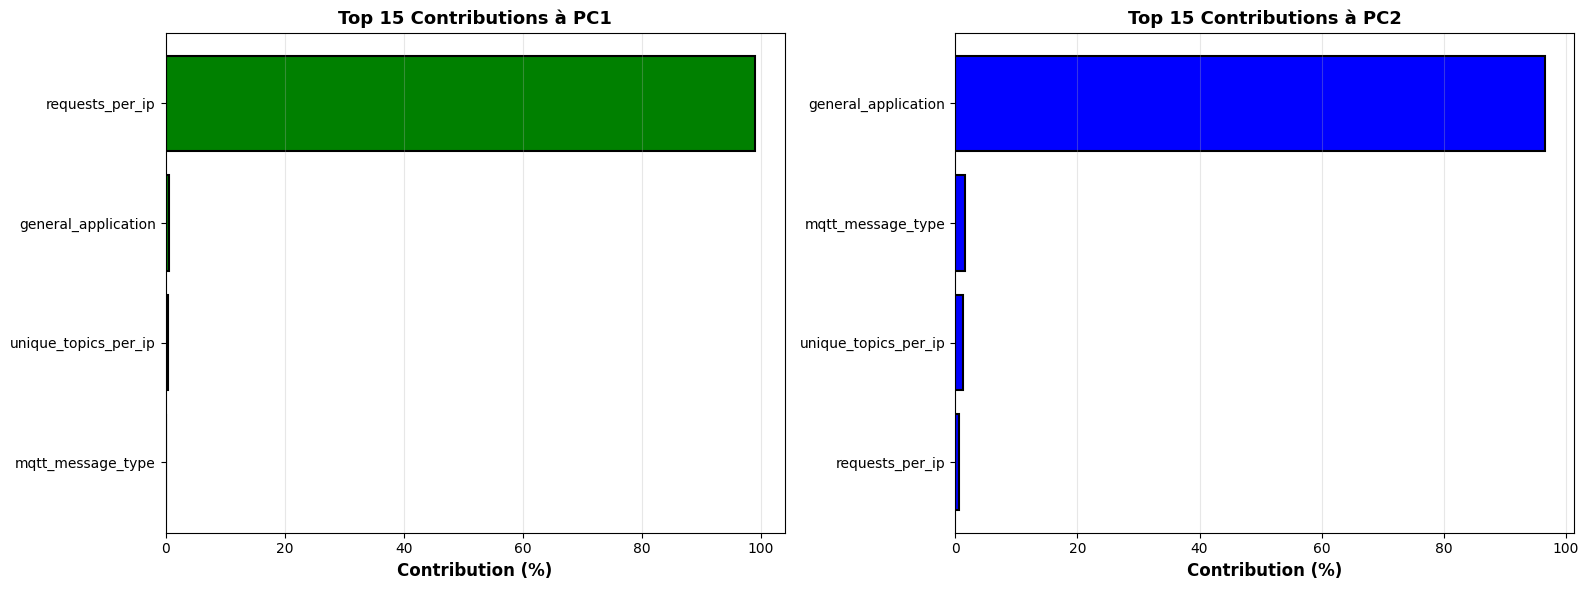


⏳ Génération du scatter plot PCA...


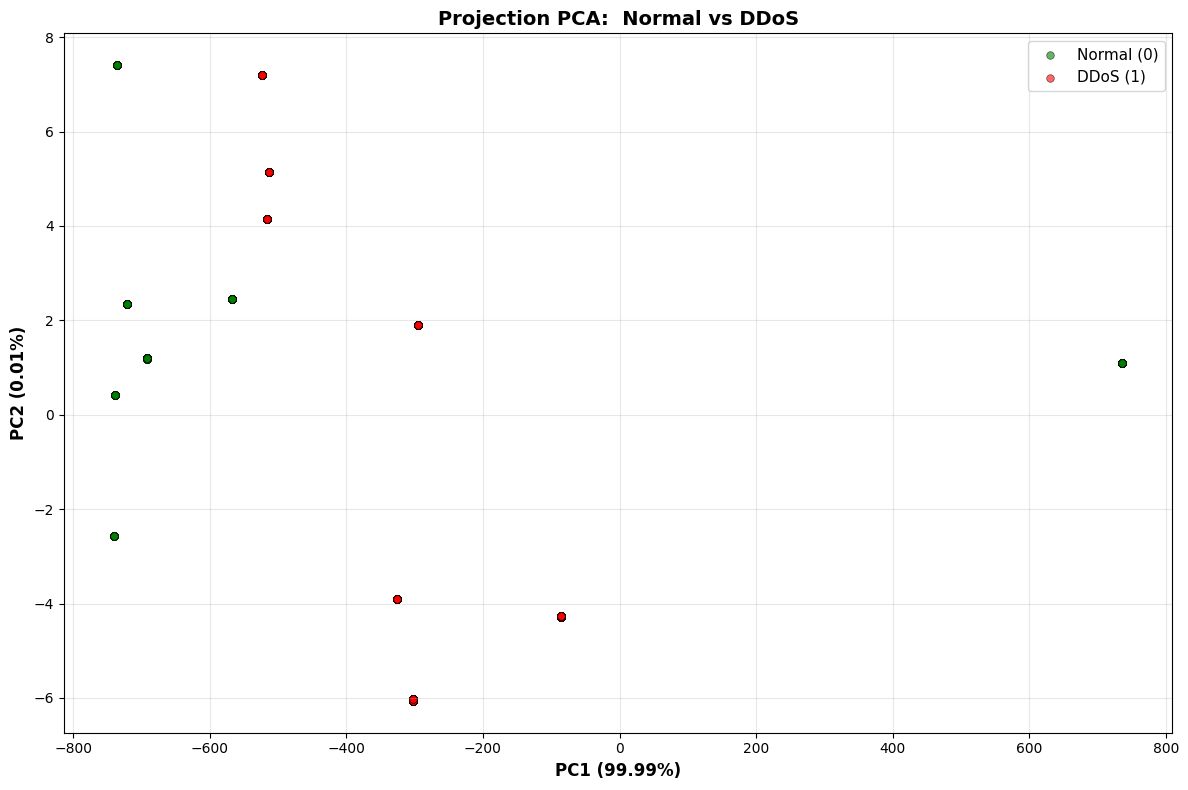


⏳ Génération de la heatmap des loadings...


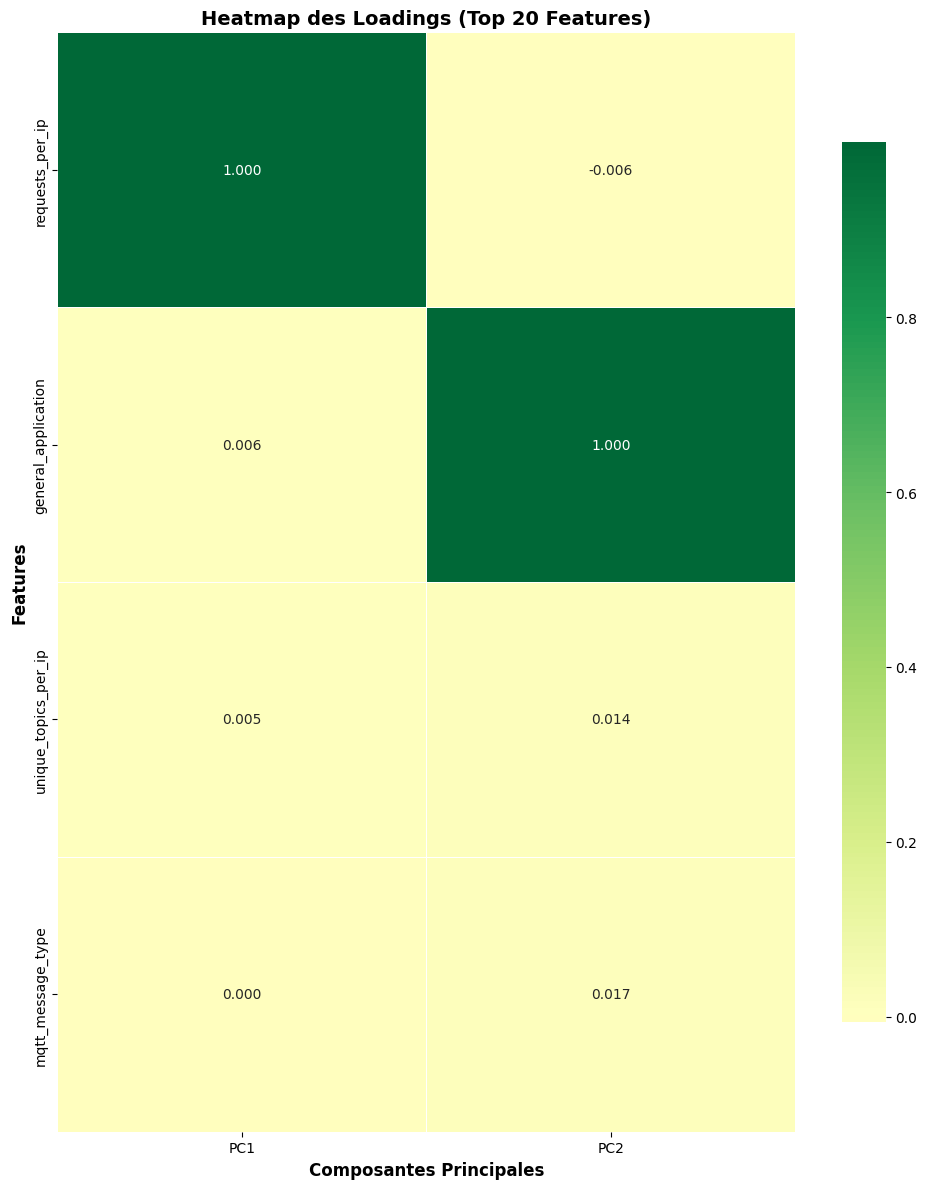


✅ ANALYSE PCA TERMINÉE

📊 RÉSUMÉ:
   • Nombre de features analysées: 4
   • Variance expliquée par PC1: 99.99%
   • Variance expliquée par PC2: 0.01%
   • Variance totale (PC1+PC2): 100.00%

🎯 TOP 3 FEATURES POUR PC1:
   1. requests_per_ip: 98.99%
   2. general_application: 0.56%
   3. unique_topics_per_ip: 0.45%

🎯 TOP 3 FEATURES POUR PC2:
   1. general_application: 96.50%
   2. mqtt_message_type: 1.62%
   3. unique_topics_per_ip: 1.33%

💡 VARIABLES DISPONIBLES:
   • pca_df: DataFrame avec PC1, PC2 et is_ddos
   • acp_2d:  Objet PCA (2 composantes)
   • pc1_percent: Contributions des features à PC1
   • pc2_percent: Contributions des features à PC2


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("="*70)
print("📊 ANALYSE PCA ET CONTRIBUTIONS DES FEATURES")
print("="*70)

# ============================================================
# ÉTAPE 1: PRÉPARER LES DONNÉES
# ============================================================
print("\n⏳ Préparation des données...")

# Sélectionner uniquement les variables numériques
X = numerical_cols. copy()  # Utiliser numerical_cols déjà nettoyé

# Définir la variable cible (is_ddos)
y = datatrainset['is_ddos']. loc[X.index]  # Variable cible alignée avec X

print(f"✅ Shape de X: {X.shape}")
print(f"✅ Shape de y: {y.shape}")

# ============================================================
# ÉTAPE 2: APPLIQUER L'ACP
# ============================================================
print("\n⏳ Application de l'ACP (2 composantes)...")

# Appliquer l'ACP uniquement sur les variables numériques
acp_2d = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
X_pca = acp_2d.fit_transform(X)  # Transformation

# Créer un DataFrame pour les résultats de l'ACP
pca_df = pd. DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)

# Ajout de la variable cible pour colorier selon les classes
pca_df['is_ddos'] = y.values  # On ajoute la variable cible

print("✅ PCA 2D appliquée")

# ============================================================
# ÉTAPE 3: AFFICHER LA VARIANCE EXPLIQUÉE
# ============================================================
print("\n" + "="*70)
print("📊 VARIANCE EXPLIQUÉE")
print("="*70)

print(f"\nVariance expliquée par chaque composante principale:")
print(f"   PC1: {acp_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {acp_2d.explained_variance_ratio_[1]*100:.2f}%")

print(f"\nVariance expliquée cumulée:")
cumulative = np.cumsum(acp_2d.explained_variance_ratio_)
for i, val in enumerate(cumulative):
    print(f"   PC1 à PC{i+1}: {val*100:.2f}%")

# ============================================================
# ÉTAPE 4: CALCULER LES LOADINGS (CONTRIBUTIONS)
# ============================================================
print("\n" + "="*70)
print("📊 CONTRIBUTIONS DES FEATURES")
print("="*70)

# Calculer les "loadings" (contributions des features dans chaque composante)
loadings = pd.DataFrame(
    acp_2d.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(acp_2d.n_components_)]
)

# Extraire les loadings pour PC1 et PC2
pc1_loadings = loadings.loc["PC1"]
pc2_loadings = loadings.loc["PC2"]

# Convertir en valeurs absolues et normaliser pour obtenir les pourcentages
pc1_percent = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()) * 100
pc2_percent = (np.abs(pc2_loadings) / np.abs(pc2_loadings).sum()) * 100

# Trier les valeurs de la plus grande à la plus petite
pc1_percent = pc1_percent. sort_values(ascending=False)
pc2_percent = pc2_percent.sort_values(ascending=False)

# Afficher les top 15 contributions
print("\n📊 TOP 15 Contributions à PC1 (en pourcentage):")
print(pc1_percent.head(15))

print("\n📊 TOP 15 Contributions à PC2 (en pourcentage):")
print(pc2_percent.head(15))

# ============================================================
# ÉTAPE 5: VISUALISATIONS - PIE CHARTS
# ============================================================
print("\n⏳ Génération des graphiques en camembert...")

# Générer des nuances de couleur
def generate_color_shades(n, colormap='Greens'):
    """Générer n nuances d'une palette de couleurs"""
    return plt.cm.get_cmap(colormap)(np.linspace(0.3, 1, n))

# Fonction pour tracer un graphique en camembert
def plot_pie_chart(data, title, top_n=15, colormap='Greens'):
    """
    Tracer un graphique en camembert avec les top N features

    Paramètres:
    -----------
    data :  Series, données à afficher
    title : str, titre du graphique
    top_n : int, nombre de features à afficher
    colormap : str, palette de couleurs
    """
    # Sélectionner les top N
    data_top = data.head(top_n)

    # Générer les couleurs
    colors = generate_color_shades(len(data_top), colormap)

    plt.figure(figsize=(12, 10))

    # Créer le pie chart
    wedges, texts, autotexts = plt.pie(
        data_top,
        labels=data_top.index,
        startangle=140,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        textprops={'fontsize': 10}
    )

    # Améliorer la lisibilité
    for text in texts:
        text.set_fontsize(9)
        text.set_fontweight('bold')

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(8)
        autotext.set_fontweight('bold')

    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Tracer les graphiques en camembert pour PC1 et PC2
plot_pie_chart(pc1_percent, "Contributions des Features à PC1 (Top 15)", top_n=15, colormap='Greens')
plot_pie_chart(pc2_percent, "Contributions des Features à PC2 (Top 15)", top_n=15, colormap='Blues')

# ============================================================
# ÉTAPE 6: VISUALISATIONS - BAR CHARTS
# ============================================================
print("\n⏳ Génération des graphiques à barres...")

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Top 15 contributions à PC1
top_15_pc1 = pc1_percent.head(15)
axs[0].barh(range(len(top_15_pc1)), top_15_pc1.values, color='green', edgecolor='black', linewidth=1.5)
axs[0].set_yticks(range(len(top_15_pc1)))
axs[0].set_yticklabels(top_15_pc1.index, fontsize=10)
axs[0].set_xlabel('Contribution (%)', fontsize=12, fontweight='bold')
axs[0].set_title('Top 15 Contributions à PC1', fontsize=13, fontweight='bold')
axs[0].invert_yaxis()
axs[0].grid(axis='x', alpha=0.3)

# Graphique 2: Top 15 contributions à PC2
top_15_pc2 = pc2_percent.head(15)
axs[1].barh(range(len(top_15_pc2)), top_15_pc2.values, color='blue', edgecolor='black', linewidth=1.5)
axs[1].set_yticks(range(len(top_15_pc2)))
axs[1].set_yticklabels(top_15_pc2.index, fontsize=10)
axs[1].set_xlabel('Contribution (%)', fontsize=12, fontweight='bold')
axs[1].set_title('Top 15 Contributions à PC2', fontsize=13, fontweight='bold')
axs[1].invert_yaxis()
axs[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 7: VISUALISATION - SCATTER PLOT
# ============================================================
print("\n⏳ Génération du scatter plot PCA...")

plt.figure(figsize=(12, 8))

# Séparer les données par classe
normal = pca_df[pca_df['is_ddos'] == 0]
ddos = pca_df[pca_df['is_ddos'] == 1]

# Scatter plot
plt.scatter(normal['PC1'], normal['PC2'], c='green', label='Normal (0)',
            alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
plt.scatter(ddos['PC1'], ddos['PC2'], c='red', label='DDoS (1)',
            alpha=0.6, s=30, edgecolors='black', linewidth=0.5)

plt.xlabel(f'PC1 ({acp_2d.explained_variance_ratio_[0]*100:.2f}%)',
           fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({acp_2d.explained_variance_ratio_[1]*100:.2f}%)',
           fontsize=12, fontweight='bold')
plt.title('Projection PCA:  Normal vs DDoS', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 8: HEATMAP DES LOADINGS
# ============================================================
print("\n⏳ Génération de la heatmap des loadings...")

# Sélectionner les top 20 features par contribution totale
total_contribution = (np.abs(pc1_loadings) + np.abs(pc2_loadings)).sort_values(ascending=False)
top_20_features = total_contribution.head(20).index

# Créer un DataFrame avec les loadings des top 20
loadings_top20 = loadings[top_20_features].T

plt.figure(figsize=(10, 12))
sns.heatmap(loadings_top20, annot=True, cmap='RdYlGn', center=0,
            fmt='.3f', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Heatmap des Loadings (Top 20 Features)', fontsize=14, fontweight='bold')
plt.xlabel('Composantes Principales', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# RÉSUMÉ FINAL
# ============================================================
print("\n" + "="*70)
print("✅ ANALYSE PCA TERMINÉE")
print("="*70)

print(f"\n📊 RÉSUMÉ:")
print(f"   • Nombre de features analysées: {X.shape[1]}")
print(f"   • Variance expliquée par PC1: {acp_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"   • Variance expliquée par PC2: {acp_2d.explained_variance_ratio_[1]*100:.2f}%")
print(f"   • Variance totale (PC1+PC2): {cumulative[1]*100:.2f}%")

print(f"\n🎯 TOP 3 FEATURES POUR PC1:")
for i, (feat, val) in enumerate(pc1_percent.head(3).items(), 1):
    print(f"   {i}. {feat}: {val:.2f}%")

print(f"\n🎯 TOP 3 FEATURES POUR PC2:")
for i, (feat, val) in enumerate(pc2_percent.head(3).items(), 1):
    print(f"   {i}. {feat}: {val:.2f}%")

print(f"\n💡 VARIABLES DISPONIBLES:")
print(f"   • pca_df: DataFrame avec PC1, PC2 et is_ddos")
print(f"   • acp_2d:  Objet PCA (2 composantes)")
print(f"   • pc1_percent: Contributions des features à PC1")
print(f"   • pc2_percent: Contributions des features à PC2")

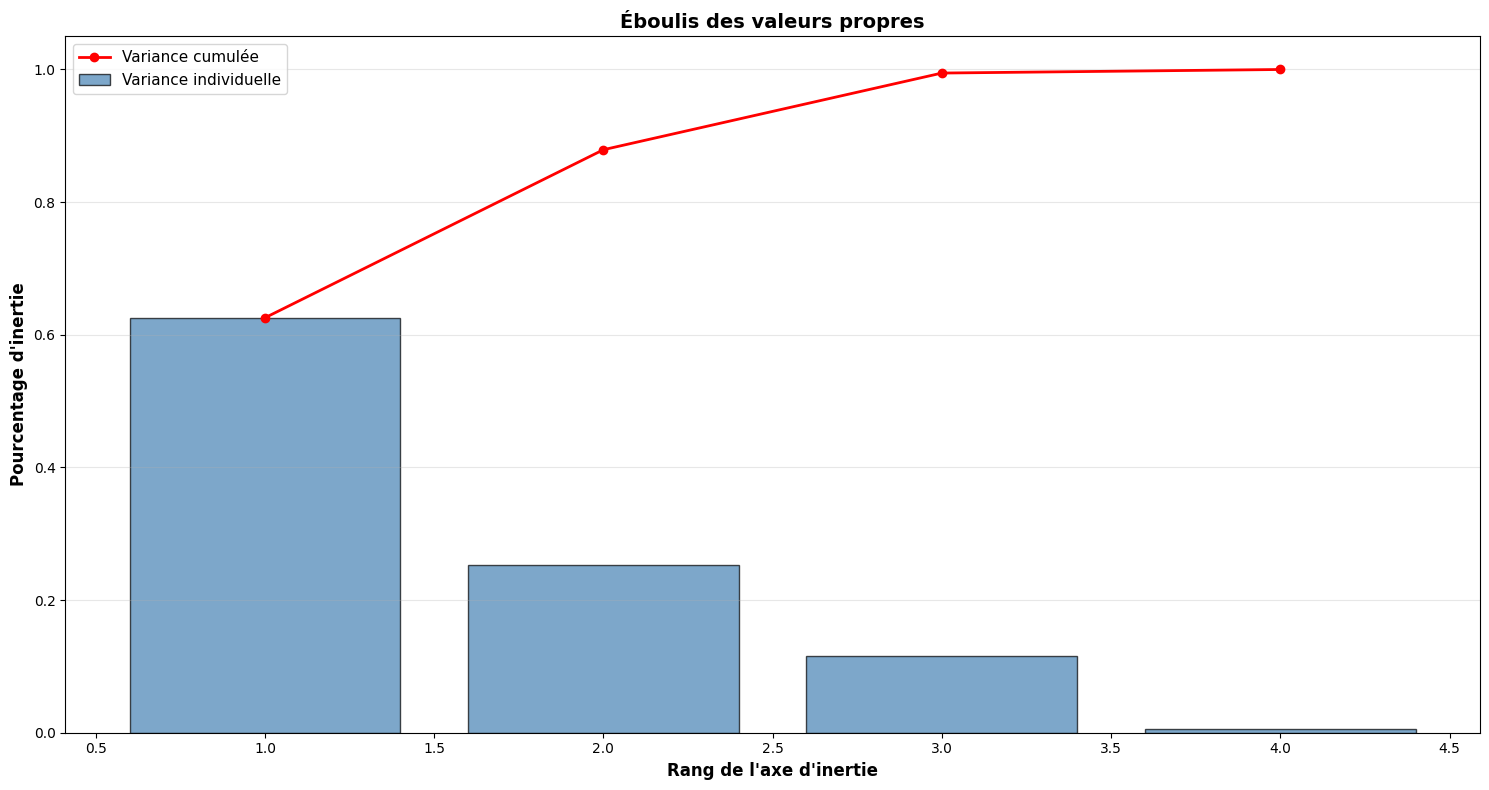

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# FONCTION POUR AFFICHER LES COMPOSANTES PRINCIPALES
# ============================================================

def plot_var_expliquee(acp):
    """
    Affiche l'éboulis des valeurs propres (Scree Plot)

    Paramètres:
    -----------
    acp : objet PCA
    """
    var_expliquee = acp.explained_variance_ratio_

    plt.bar(np.arange(len(var_expliquee)) + 1, var_expliquee,
            color='steelblue', edgecolor='black', alpha=0.7, label='Variance individuelle')
    plt.plot(np.arange(len(var_expliquee)) + 1, var_expliquee.cumsum(),
             c="red", marker='o', linewidth=2, markersize=6, label='Variance cumulée')

    plt.xlabel("Rang de l'axe d'inertie", fontsize=12, fontweight='bold')
    plt.ylabel("Pourcentage d'inertie", fontsize=12, fontweight='bold')
    plt.title("Éboulis des valeurs propres", fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Utilisation
plt.figure(figsize=(15, 8))
plot_var_expliquee(acp)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
import pandas as pd
import numpy as np

print("="*70)
print("🎯 DÉCLARATION DES FEATURES IDÉALES POUR DÉTECTION DDoS")
print("="*70)

# ============================================================
# FEATURES BASÉES SUR L'ENCODAGE ET LA SÉLECTION
# ============================================================

# Features numériques originales (importantes selon corrélation)
features_numeriques = [
    'mqtt_qos',                    # Quality of Service
    'mqtt_duplicate',              # Flag duplicate
    'mqtt_retained',               # Flag retained
    'requests_per_ip',             # Nombre de requêtes par IP
    'duplicate_rate_per_ip',       # Taux de duplication par IP
    'unique_topics_per_ip',        # Diversité des topics par IP
]

# Features temporelles (extraites de @timestamp)
features_temporelles = [
    'hour',                        # Heure de la journée (0-23)
    'day_of_week',                 # Jour de la semaine (0-6)
    'day',                         # Jour du mois
    'month',                       # Mois de l'année
]

# Features catégorielles ENCODÉES (avec suffixe _encoded)
features_categoriques_encodees = [
    'general_device_name_encoded', # Nom du device (encodé)
    'mqtt_topic_encoded',          # Topic MQTT (encodé)
    'general_mac_encoded',         # Adresse MAC (encodée)
]

# Features d'agrégation par IP (si disponibles)
features_agregation_ip = [
    'requests_per_ip',             # Déjà listé mais important
    'duplicate_rate_per_ip',       # Déjà listé mais important
    'unique_topics_per_ip',        # Déjà listé mais important
    'avg_qos_per_ip',              # QoS moyen par IP (si créé)
    'retained_rate_per_ip',        # Taux de retained par IP (si créé)
]

# ============================================================
# LISTE COMPLÈTE DES FEATURES IDÉALES
# ============================================================

# Combiner toutes les features (sans doublons)
features_ideales = list(set(
    features_numeriques +
    features_temporelles +
    features_categoriques_encodees +
    features_agregation_ip
))

print(f"\n📊 FEATURES IDÉALES DÉFINIES:")
print(f"   Total: {len(features_ideales)} features")

print(f"\n🔢 Features Numériques ({len(features_numeriques)}):")
for feat in features_numeriques:
    print(f"   • {feat}")

print(f"\n📅 Features Temporelles ({len(features_temporelles)}):")
for feat in features_temporelles:
    print(f"   • {feat}")

print(f"\n🏷️  Features Catégorielles Encodées ({len(features_categoriques_encodees)}):")
for feat in features_categoriques_encodees:
    print(f"   • {feat}")

print(f"\n📊 Features d'Agrégation IP ({len(features_agregation_ip)}):")
for feat in features_agregation_ip:
    print(f"   • {feat}")

# ============================================================
# VÉRIFIER LA DISPONIBILITÉ DES FEATURES
# ============================================================
print("\n" + "="*70)
print("🔍 VÉRIFICATION DE LA DISPONIBILITÉ")
print("="*70)

# Vérifier quelles features existent dans datatrainset
features_disponibles = []
features_manquantes = []

for feat in features_ideales:
    if feat in datatrainset.columns:
        features_disponibles.append(feat)
    else:
        features_manquantes.append(feat)

print(f"\n✅ Features disponibles: {len(features_disponibles)}/{len(features_ideales)}")
for feat in features_disponibles:
    print(f"   ✓ {feat}")

if features_manquantes:
    print(f"\n⚠️  Features manquantes: {len(features_manquantes)}")
    for feat in features_manquantes:
        print(f"   ✗ {feat}")

# ============================================================
# CRÉER LE DATASET AVEC FEATURES DISPONIBLES
# ============================================================
print("\n" + "="*70)
print("📦 CRÉATION DU DATASET")
print("="*70)

# Utiliser seulement les features disponibles
X_ideal = datatrainset[features_disponibles]. copy()
y_ideal = datatrainset['is_ddos']. copy()

# Statistiques avant nettoyage
print(f"\n📊 Avant nettoyage:")
print(f"   Shape: {X_ideal.shape}")
print(f"   Valeurs manquantes: {X_ideal.isna().sum().sum()}")
print(f"   Valeurs infinies: {np.isinf(X_ideal. select_dtypes(include=[np.number])).sum().sum()}")

# Nettoyer les données
print(f"\n🧹 Nettoyage en cours...")

# Gérer les valeurs manquantes
X_ideal = X_ideal.fillna(X_ideal.median(numeric_only=True))

# Gérer les valeurs infinies
numeric_cols = X_ideal.select_dtypes(include=[np. number]).columns
X_ideal[numeric_cols] = X_ideal[numeric_cols].replace([np.inf, -np.inf], np.nan)
X_ideal[numeric_cols] = X_ideal[numeric_cols].fillna(X_ideal[numeric_cols].median())

# Aligner y avec X
y_ideal = y_ideal. loc[X_ideal.index]

print(f"\n✅ Après nettoyage:")
print(f"   Shape: {X_ideal.shape}")
print(f"   Valeurs manquantes: {X_ideal.isna().sum().sum()}")
print(f"   Valeurs infinies: {np.isinf(X_ideal.select_dtypes(include=[np.number])).sum().sum()}")

# ============================================================
# STATISTIQUES DESCRIPTIVES
# ============================================================
print("\n" + "="*70)
print("📊 STATISTIQUES DESCRIPTIVES")
print("="*70)

print(f"\n{X_ideal.describe().T. to_string()}")

# ============================================================
# DISTRIBUTION DE LA VARIABLE CIBLE
# ============================================================
print("\n" + "="*70)
print("🎯 DISTRIBUTION DE is_ddos")
print("="*70)

print(f"\n{y_ideal.value_counts()}")
print(f"\nPourcentages:")
print(f"{y_ideal.value_counts(normalize=True) * 100}")

# ============================================================
# EXPORTER LA LISTE DES FEATURES
# ============================================================
print("\n" + "="*70)
print("💾 EXPORT")
print("="*70)

# Créer un dictionnaire avec toutes les informations
features_info = {
    'features_ideales': features_ideales,
    'features_disponibles': features_disponibles,
    'features_manquantes':  features_manquantes,
    'features_numeriques': features_numeriques,
    'features_temporelles': features_temporelles,
    'features_categoriques_encodees': features_categoriques_encodees,
    'features_agregation_ip': features_agregation_ip
}

# Sauvegarder dans un fichier Python
with open('features_ideales_config.py', 'w') as f:
    f.write("# Configuration des features idéales pour détection DDoS\n\n")
    f.write("# Features numériques originales\n")
    f.write(f"features_numeriques = {features_numeriques}\n\n")
    f.write("# Features temporelles\n")
    f.write(f"features_temporelles = {features_temporelles}\n\n")
    f.write("# Features catégorielles encodées\n")
    f.write(f"features_categoriques_encodees = {features_categoriques_encodees}\n\n")
    f.write("# Features d'agrégation par IP\n")
    f.write(f"features_agregation_ip = {features_agregation_ip}\n\n")
    f.write("# Liste complète des features idéales\n")
    f.write(f"features_ideales = {features_ideales}\n\n")
    f.write("# Features disponibles dans le dataset\n")
    f.write(f"features_disponibles = {features_disponibles}\n")

print(f"✅ Configuration sauvegardée dans 'features_ideales_config.py'")

# ============================================================
# RÉSUMÉ FINAL
# ============================================================
print("\n" + "="*70)
print("✅ DÉCLARATION DES FEATURES TERMINÉE")
print("="*70)

print(f"\n📊 RÉSUMÉ:")
print(f"   • Features idéales définies: {len(features_ideales)}")
print(f"   • Features disponibles: {len(features_disponibles)}")
print(f"   • Features manquantes: {len(features_manquantes)}")
print(f"   • Dataset final: {X_ideal.shape}")
print(f"   • Distribution DDoS: {y_ideal. sum()} / {len(y_ideal)} ({y_ideal.sum()/len(y_ideal)*100:.1f}%)")

print(f"\n💡 VARIABLES CRÉÉES:")
print(f"   • features_ideales: Liste complète")
print(f"   • features_disponibles: Features dans le dataset")
print(f"   • X_ideal: DataFrame avec features disponibles")
print(f"   • y_ideal:  Variable cible is_ddos")

print(f"\n🎯 PROCHAINES ÉTAPES:")
print(f"   1. Utiliser X_ideal et y_ideal pour l'entraînement")
print(f"   2. Appliquer une standardisation si nécessaire")
print(f"   3. Entraîner vos modèles de classification")

🎯 DÉCLARATION DES FEATURES IDÉALES POUR DÉTECTION DDoS

📊 FEATURES IDÉALES DÉFINIES:
   Total: 15 features

🔢 Features Numériques (6):
   • mqtt_qos
   • mqtt_duplicate
   • mqtt_retained
   • requests_per_ip
   • duplicate_rate_per_ip
   • unique_topics_per_ip

📅 Features Temporelles (4):
   • hour
   • day_of_week
   • day
   • month

🏷️  Features Catégorielles Encodées (3):
   • general_device_name_encoded
   • mqtt_topic_encoded
   • general_mac_encoded

📊 Features d'Agrégation IP (5):
   • requests_per_ip
   • duplicate_rate_per_ip
   • unique_topics_per_ip
   • avg_qos_per_ip
   • retained_rate_per_ip

🔍 VÉRIFICATION DE LA DISPONIBILITÉ

✅ Features disponibles: 8/15
   ✓ requests_per_ip
   ✓ mqtt_duplicate
   ✓ day_of_week
   ✓ mqtt_qos
   ✓ mqtt_retained
   ✓ duplicate_rate_per_ip
   ✓ unique_topics_per_ip
   ✓ hour

⚠️  Features manquantes: 7
   ✗ general_mac_encoded
   ✗ day
   ✗ retained_rate_per_ip
   ✗ month
   ✗ avg_qos_per_ip
   ✗ general_device_name_encoded
   ✗ mqtt_top

🔍 DIAGNOSTIC ET CORRECTION DU PROBLÈME

🔍 DIAGNOSTIC

📊 Distribution dans DATATRAINSET:
is_ddos
1    2779
0    1881
Name: count, dtype: int64

📊 Distribution dans DATATESTSET:
is_ddos
0    1165
Name: count, dtype: int64

🚨 PROBLÈME:  datatestset n'a qu'UNE classe → Split non stratifié!

🔧 SOLUTION:   SPLIT STRATIFIÉ
✅ Dataset complet: (5825, 22)
✅ Train: (4660, 8) - {0: 2437, 1: 2223}
✅ Test:  (1165, 8) - {0: 609, 1: 556}

🔧 ENCODAGE
✅ Encodage terminé
✅ 6 features alignées

⏳ Standardisation...
✅ Standardisation terminée

🔍 DIAGNOSTIC DATA LEAKAGE
✅ Pas de data leakage évident

🎯 ENTRAÎNEMENT

⏳ Entraînement du modèle...


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


✅ Entraîné en 29 itérations
   Loss final: 0.0807

⏳ Prédictions...

📊 RÉSULTATS FINAUX

╔════════════════════════════════════╗
║   MÉTRIQUES FINALES                ║
╠════════════════════════════════════╣
║ Accuracy:     0.9622 (96.22%)    ║
║ Precision:  0.9267 (92.67%)    ║
║ Recall:     1.0000 (100.00%)    ║
║ F1-Score:   0.9619 (96.19%)    ║
║ ROC-AUC:    1.0000 (100.00%)    ║
╚════════════════════════════════════╝

📋 Classification Report:
              precision    recall  f1-score   support

  Normal (0)       1.00      0.93      0.96       609
    DDoS (1)       0.93      1.00      0.96       556

    accuracy                           0.96      1165
   macro avg       0.96      0.96      0.96      1165
weighted avg       0.97      0.96      0.96      1165


📊 Matrice de Confusion:
   TN (Vrais Négatifs):  565
   FP (Faux Positifs):   44
   FN (Faux Négatifs):   0
   TP (Vrais Positifs):  556

📊 Taux:
   TPR (Sensibilité):    1.0000
   TNR (Spécificité):    0.9278
   FPR (Faux

/tmp/ipython-input-1606181088.py:286: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


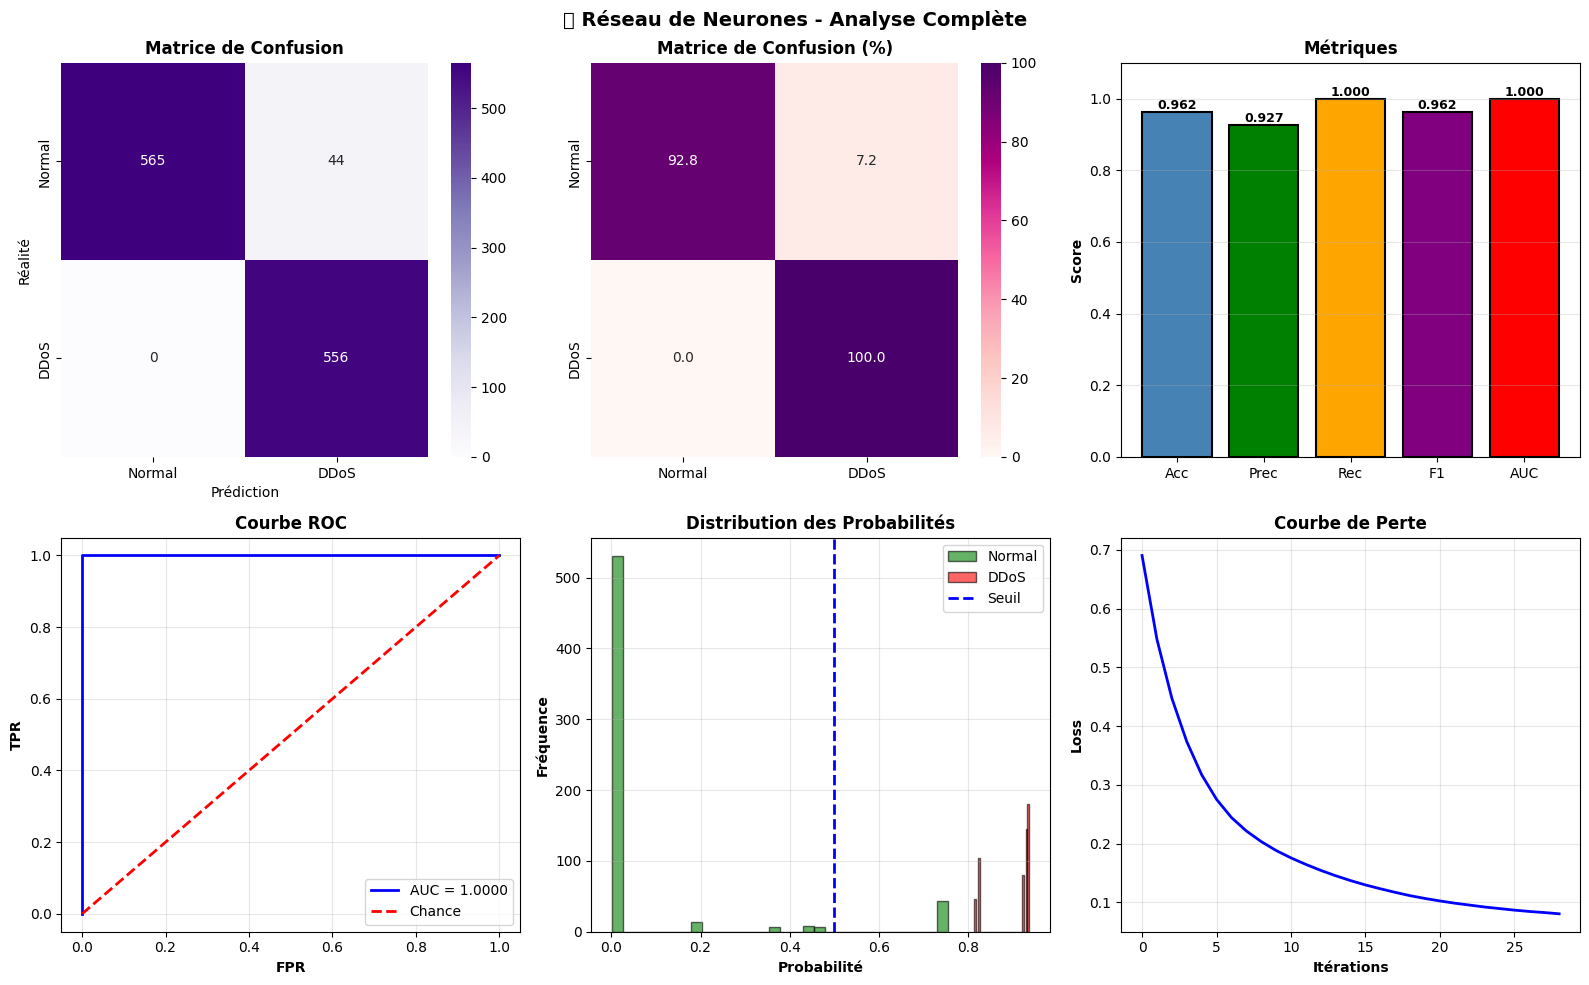


✅ ENTRAÎNEMENT TERMINÉ

📊 CONFIGURATION:
   • Dataset complet: 5825 échantillons
   • Train: 4660 échantillons (80.0%)者にしました。
   • Test:   1165 échantillons (20.0%)者にしました。
   • Features: 6
   • Architecture: (100,)

🎯 PERFORMANCES:
   • Accuracy: 96.22%
   • F1-Score: 96.19%
   • ROC-AUC:   100.00%

🔍 DIAGNOSTIC:
   ⚠️  Très haute accuracy → Possible data leakage

💡 Variables disponibles:
   • model:  Modèle MLP entraîné
   • scaler: StandardScaler
   • X_train_scaled, X_test_scaled: Données standardisées
   • y_train, y_test, y_pred, y_proba: Cibles et prédictions


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("🔍 DIAGNOSTIC ET CORRECTION DU PROBLÈME")
print("="*70)

# ============================================================
# DIAGNOSTIC
# ============================================================
print("\n" + "="*70)
print("🔍 DIAGNOSTIC")
print("="*70)

print(f"\n📊 Distribution dans DATATRAINSET:")
print(datatrainset['is_ddos'].value_counts())

print(f"\n📊 Distribution dans DATATESTSET:")
print(datatestset['is_ddos'].value_counts())

if datatestset['is_ddos'].nunique() == 1:
    print(f"\n🚨 PROBLÈME:  datatestset n'a qu'UNE classe → Split non stratifié!")

# ============================================================
# SOLUTION:  SPLIT STRATIFIÉ
# ============================================================
print("\n" + "="*70)
print("🔧 SOLUTION:   SPLIT STRATIFIÉ")
print("="*70)

# Recombiner
data_complete = pd.concat([datatrainset, datatestset], ignore_index=True)
print(f"✅ Dataset complet: {data_complete.shape}")

# Préparer X et y
X_complete = data_complete[X_ideal.columns.tolist()]
y_complete = data_complete['is_ddos']. astype(int)

# Nettoyer
X_complete = X_complete. fillna(X_complete.median(numeric_only=True))
num_cols = X_complete.select_dtypes(include=[np. number]).columns
X_complete[num_cols] = X_complete[num_cols].replace([np.inf, -np. inf], np.nan)
X_complete[num_cols] = X_complete[num_cols].fillna(X_complete[num_cols]. median())

# SPLIT STRATIFIÉ
X_train, X_test, y_train, y_test = train_test_split(
    X_complete, y_complete,
    test_size=0.2,
    random_state=42,
    stratify=y_complete
)

print(f"✅ Train: {X_train.shape} - {y_train.value_counts().to_dict()}")
print(f"✅ Test:  {X_test.shape} - {y_test.value_counts().to_dict()}")

# ============================================================
# ENCODAGE
# ============================================================
print("\n" + "="*70)
print("🔧 ENCODAGE")
print("="*70)

le_dict = {}
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

if len(cat_cols) > 0:
    for col in cat_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col]. fillna('MISSING').astype(str))
        le_dict[col] = le

    X_train = X_train.select_dtypes(include=[np. number])

    for col in X_test.select_dtypes(include=['object', 'category']).columns:
        if col in le_dict:
            vals = X_test[col].fillna('MISSING').astype(str)
            mask = ~vals.isin(le_dict[col].classes_)
            vals[mask] = 'MISSING'
            X_test[col] = le_dict[col].transform(vals)

    X_test = X_test.select_dtypes(include=[np.number])
    print(f"✅ Encodage terminé")

# Aligner
for col in set(X_train.columns) - set(X_test.columns):
    X_test[col] = 0
X_test = X_test[X_train.columns]

print(f"✅ {X_train.shape[1]} features alignées")

# ============================================================
# STANDARDISATION
# ============================================================
print("\n⏳ Standardisation...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Standardisation terminée")

# ============================================================
# DIAGNOSTIC DATA LEAKAGE (AUTOMATIQUE)
# ============================================================
print("\n" + "="*70)
print("🔍 DIAGNOSTIC DATA LEAKAGE")
print("="*70)

suspicious = []
suspicious_indices = []

for idx, col in enumerate(X_train.columns):
    corr = abs(X_train[col].corr(y_train))
    if corr > 0.95:
        print(f"   🚨 {col}:  {corr:.4f} - DATA LEAKAGE!")
        suspicious.append(col)
        suspicious_indices.append(idx)

if suspicious:
    print(f"\n⚠️  {len(suspicious)} features suspectes → SUPPRESSION AUTOMATIQUE")
    X_train_scaled = np.delete(X_train_scaled, suspicious_indices, axis=1)
    X_test_scaled = np.delete(X_test_scaled, suspicious_indices, axis=1)

    # Mettre à jour X_train et X_test
    X_train = X_train. drop(columns=suspicious)
    X_test = X_test.drop(columns=suspicious)

    print(f"✅ Features supprimées.  Nouveau shape: {X_train_scaled.shape}")
else:
    print("✅ Pas de data leakage évident")

# ============================================================
# ENTRAÎNEMENT
# ============================================================
print("\n" + "="*70)
print("🎯 ENTRAÎNEMENT")
print("="*70)

print("\n⏳ Entraînement du modèle...")

model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=False
)

model.fit(X_train_scaled, y_train)

print(f"✅ Entraîné en {model.n_iter_} itérations")
print(f"   Loss final: {model.loss_:.4f}")

# ============================================================
# PRÉDICTIONS
# ============================================================
print("\n⏳ Prédictions...")

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# ============================================================
# MÉTRIQUES
# ============================================================
print("\n" + "="*70)
print("📊 RÉSULTATS FINAUX")
print("="*70)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

print("\n╔════════════════════════════════════╗")
print("║   MÉTRIQUES FINALES                ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy:     {accuracy:.4f} ({accuracy*100:5.2f}%)    ║")
print(f"║ Precision:  {precision:.4f} ({precision*100:5.2f}%)    ║")
print(f"║ Recall:     {recall:.4f} ({recall*100:5.2f}%)    ║")
print(f"║ F1-Score:   {f1:.4f} ({f1*100:5.2f}%)    ║")
print(f"║ ROC-AUC:    {roc_auc:.4f} ({roc_auc*100:5.2f}%)    ║")
print("╚════════════════════════════════════╝")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'DDoS (1)']))

# Matrice de confusion détaillée
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n📊 Matrice de Confusion:")
print(f"   TN (Vrais Négatifs):  {tn}")
print(f"   FP (Faux Positifs):   {fp}")
print(f"   FN (Faux Négatifs):   {fn}")
print(f"   TP (Vrais Positifs):  {tp}")

print(f"\n📊 Taux:")
print(f"   TPR (Sensibilité):    {tp/(tp+fn):.4f}")
print(f"   TNR (Spécificité):    {tn/(tn+fp):.4f}")
print(f"   FPR (Faux Positifs):  {fp/(fp+tn):.4f}")
print(f"   FNR (Faux Négatifs):  {fn/(fn+tp):.4f}")

# ============================================================
# VISUALISATIONS
# ============================================================
print("\n⏳ Génération des visualisations...")

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# 1. Matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axs[0, 0],
            xticklabels=['Normal', 'DDoS'],
            yticklabels=['Normal', 'DDoS'])
axs[0, 0].set_title('Matrice de Confusion', fontweight='bold')
axs[0, 0].set_xlabel('Prédiction')
axs[0, 0].set_ylabel('Réalité')

# 2. Matrice de confusion %
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='RdPu', ax=axs[0, 1],
            xticklabels=['Normal', 'DDoS'],
            yticklabels=['Normal', 'DDoS'])
axs[0, 1].set_title('Matrice de Confusion (%)', fontweight='bold')

# 3. Métriques
metrics = {'Acc': accuracy, 'Prec': precision, 'Rec':  recall, 'F1': f1, 'AUC': roc_auc}
colors = ['steelblue', 'green', 'orange', 'purple', 'red']
bars = axs[0, 2].bar(metrics.keys(), metrics.values(), color=colors,
                      edgecolor='black', linewidth=1.5)
for bar in bars:
    h = bar.get_height()
    axs[0, 2].text(bar.get_x() + bar.get_width()/2., h, f'{h:.3f}',
                   ha='center', va='bottom', fontweight='bold', fontsize=9)
axs[0, 2]. set_ylim(0, 1.1)
axs[0, 2].set_ylabel('Score', fontweight='bold')
axs[0, 2]. set_title('Métriques', fontweight='bold')
axs[0, 2]. grid(axis='y', alpha=0.3)

# 4. Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
axs[1, 0].plot(fpr, tpr, 'b-', lw=2, label=f'AUC = {roc_auc:.4f}')
axs[1, 0].plot([0, 1], [0, 1], 'r--', lw=2, label='Chance')
axs[1, 0].set_xlabel('FPR', fontweight='bold')
axs[1, 0].set_ylabel('TPR', fontweight='bold')
axs[1, 0].set_title('Courbe ROC', fontweight='bold')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# 5. Distribution des probabilités
proba_normal = y_proba[y_test == 0]
proba_ddos = y_proba[y_test == 1]
axs[1, 1].hist(proba_normal, bins=30, alpha=0.6, label='Normal', color='green', edgecolor='black')
axs[1, 1].hist(proba_ddos, bins=30, alpha=0.6, label='DDoS', color='red', edgecolor='black')
axs[1, 1].axvline(0.5, color='blue', linestyle='--', lw=2, label='Seuil')
axs[1, 1].set_xlabel('Probabilité', fontweight='bold')
axs[1, 1].set_ylabel('Fréquence', fontweight='bold')
axs[1, 1].set_title('Distribution des Probabilités', fontweight='bold')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# 6. Loss curve
if hasattr(model, 'loss_curve_'):
    axs[1, 2].plot(model. loss_curve_, 'b-', lw=2)
    axs[1, 2].set_xlabel('Itérations', fontweight='bold')
    axs[1, 2].set_ylabel('Loss', fontweight='bold')
    axs[1, 2].set_title('Courbe de Perte', fontweight='bold')
    axs[1, 2].grid(alpha=0.3)
else:
    axs[1, 2].text(0.5, 0.5, 'Loss curve\nnon disponible',
                   ha='center', va='center', transform=axs[1, 2].transAxes)

plt.suptitle('🧠 Réseau de Neurones - Analyse Complète', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# RÉSUMÉ FINAL
# ============================================================
print("\n" + "="*70)
print("✅ ENTRAÎNEMENT TERMINÉ")
print("="*70)

print(f"\n📊 CONFIGURATION:")
print(f"   • Dataset complet: {len(y_complete)} échantillons")
print(f"   • Train: {len(y_train)} échantillons ({len(y_train)/len(y_complete)*100:.1f}%)者にしました。")
print(f"   • Test:   {len(y_test)} échantillons ({len(y_test)/len(y_complete)*100:.1f}%)者にしました。")
print(f"   • Features: {X_train_scaled.shape[1]}")
print(f"   • Architecture: {model.hidden_layer_sizes}")

print(f"\n🎯 PERFORMANCES:")
print(f"   • Accuracy: {accuracy*100:.2f}%")
print(f"   • F1-Score: {f1*100:.2f}%")
print(f"   • ROC-AUC:   {roc_auc*100:.2f}%")

print(f"\n🔍 DIAGNOSTIC:")
if accuracy == 1.0:
    print(f"   🚨 ATTENTION: 100% accuracy → Vérifier data leakage!")
elif accuracy > 0.95:
    print(f"   ⚠️  Très haute accuracy → Possible data leakage")
elif f1 > 0.8:
    print(f"   ✅ Excellent modèle!")
elif f1 > 0.6:
    print(f"   ✅ Bon modèle")
else:
    print(f"   ⚠️  Modèle à améliorer")

print(f"\n💡 Variables disponibles:")
print(f"   • model:  Modèle MLP entraîné")
print(f"   • scaler: StandardScaler")
print(f"   • X_train_scaled, X_test_scaled: Données standardisées")
print(f"   • y_train, y_test, y_pred, y_proba: Cibles et prédictions")



🌳 COMPARAISON:  ARBRE DE DÉCISION, KNN, RANDOM FOREST

✅ Données disponibles:
   • X_train:  (4660, 6)
   • X_test:   (1165, 6)
   • Features: 6

🔧 DÉFINITION DES MODÈLES
✅ 8 modèles définis

🎯 ENTRAÎNEMENT DES MODÈLES

⏳ Entraînement:  🌳 Arbre de Décision (Simple)...
   ✓ Accuracy: 1.0000, F1: 1.0000, Gap: 0.0000, Temps: 0.00s

⏳ Entraînement:  🌳 Arbre de Décision (Profond)...
   ✓ Accuracy: 1.0000, F1: 1.0000, Gap: 0.0000, Temps: 0.00s

⏳ Entraînement:  🔵 KNN (k=3)...
   ✓ Accuracy: 1.0000, F1: 1.0000, Gap: 0.0000, Temps: 0.00s

⏳ Entraînement:  🔵 KNN (k=5)...
   ✓ Accuracy: 1.0000, F1: 1.0000, Gap: 0.0000, Temps: 0.01s

⏳ Entraînement:  🔵 KNN (k=10)...
   ✓ Accuracy: 1.0000, F1: 1.0000, Gap: 0.0000, Temps: 0.01s

⏳ Entraînement:  🌲 Random Forest (50 arbres)...
   ✓ Accuracy: 1.0000, F1: 1.0000, Gap: 0.0000, Temps: 0.16s

⏳ Entraînement:  🌲 Random Forest (100 arbres)...
   ✓ Accuracy: 1.0000, F1: 1.0000, Gap: 0.0000, Temps: 0.32s

⏳ Entraînement:  🌲 Random Forest (200 arbres)...
   ✓

/tmp/ipython-input-4241258394.py:276: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4241258394.py:276: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4241258394.py:276: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

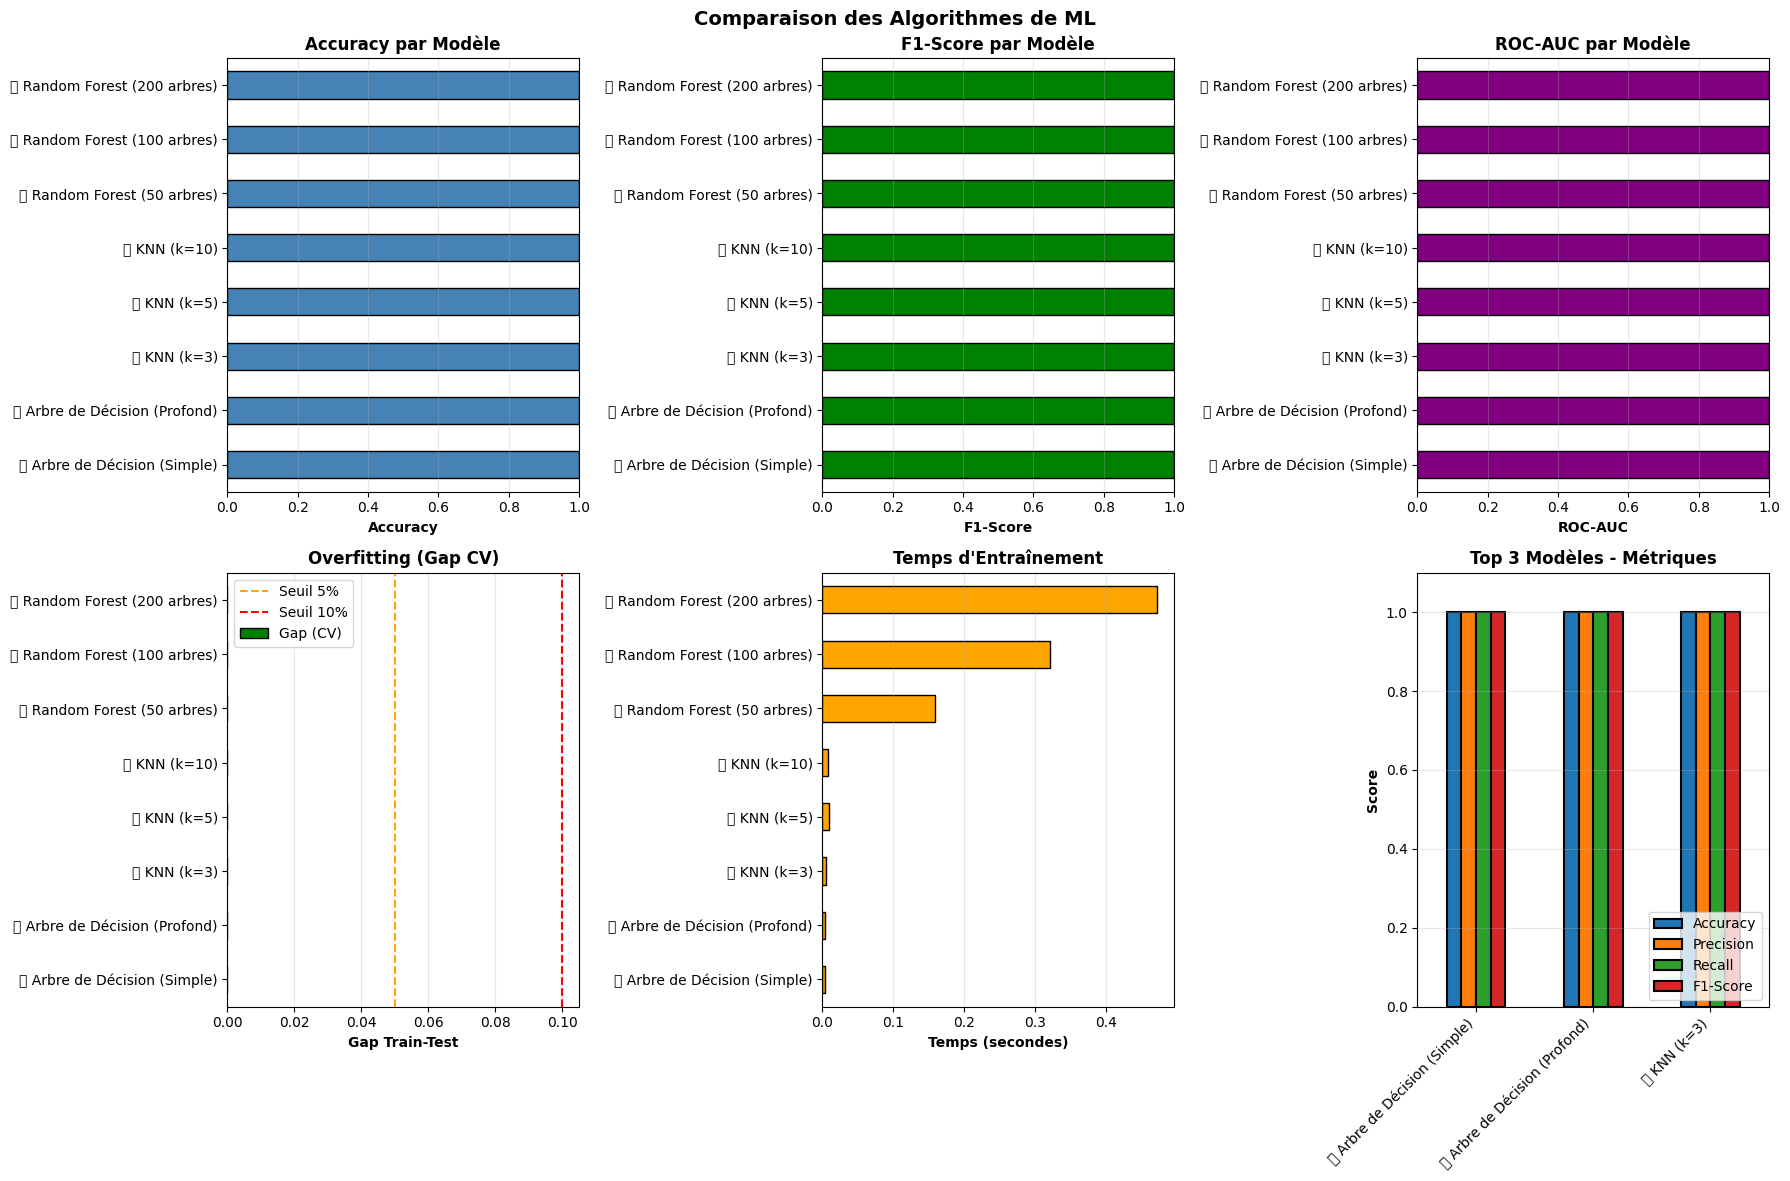


⏳ Analyse détaillée du meilleur modèle...


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-4241258394.py:368: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


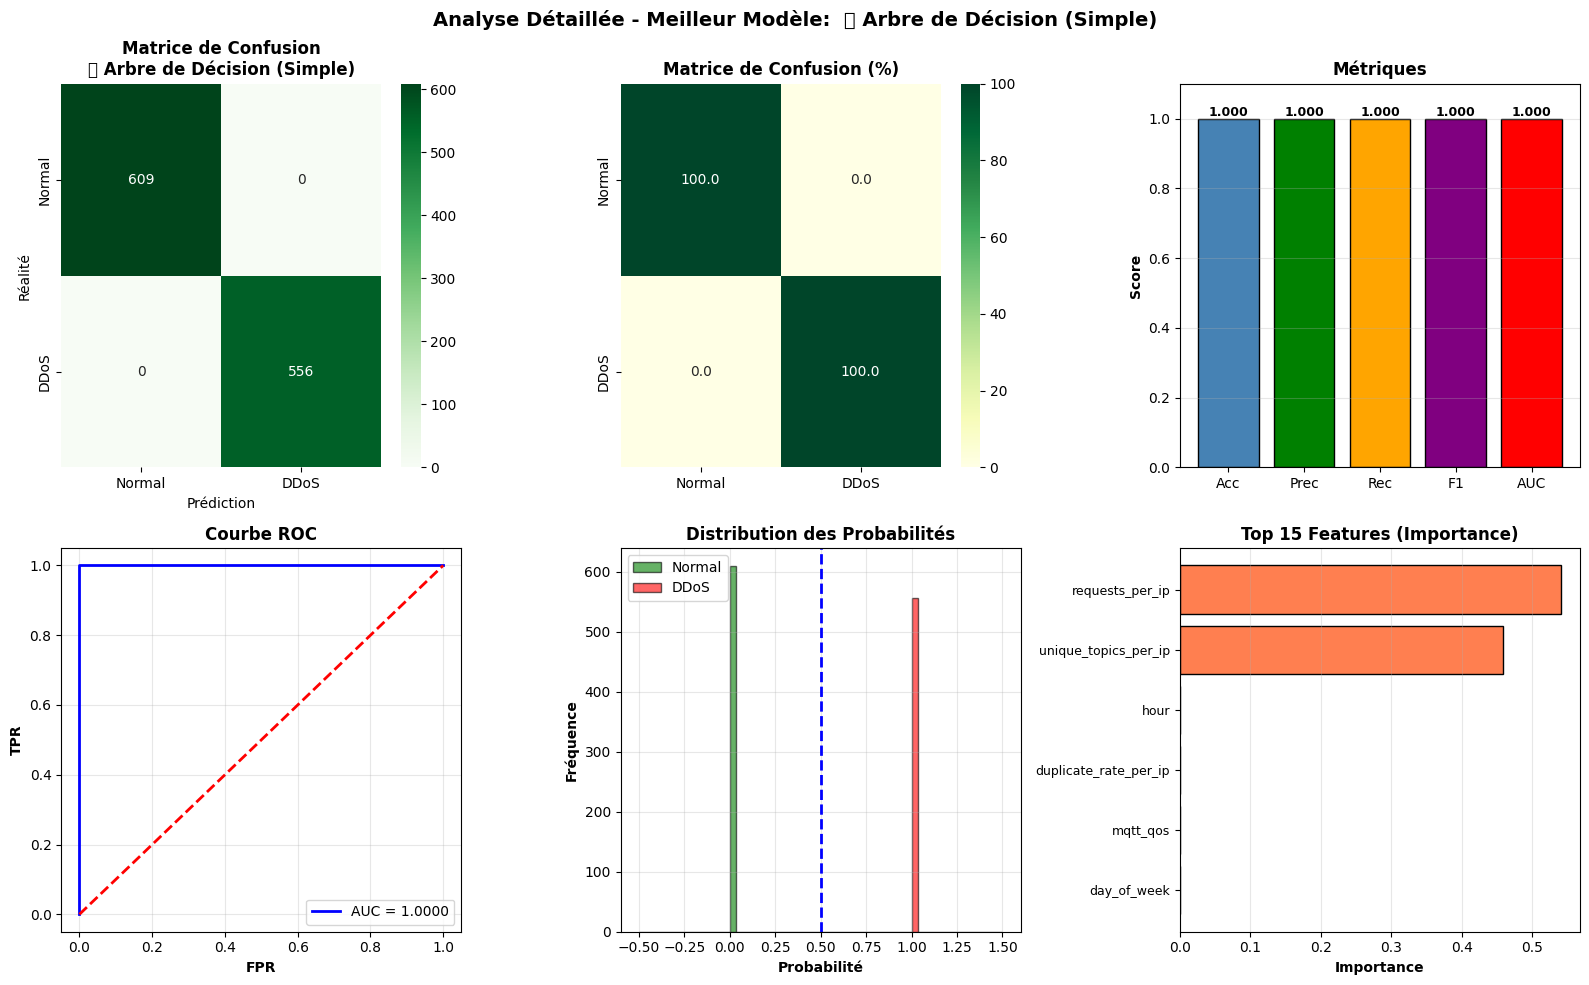


✅ RAPPORT FINAL - COMPARAISON DES ALGORITHMES

📊 CLASSEMENT PAR F1-SCORE:
   1. 🌳 Arbre de Décision (Simple)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000
   2. 🌳 Arbre de Décision (Profond)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000
   3. 🔵 KNN (k=3)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000
   4. 🔵 KNN (k=5)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000
   5. 🔵 KNN (k=10)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000
   6. 🌲 Random Forest (50 arbres)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000
   7. 🌲 Random Forest (100 arbres)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000
   8. 🌲 Random Forest (200 arbres)
      F1: 1.0000, Acc: 1.0000, Gap: 0.0000

🏆 MEILLEUR MODÈLE: 🌳 Arbre de Décision (Simple)
   Architecture: DecisionTreeClassifier

╔════════════════════════════════════╗
║   PERFORMANCES FINALES             ║
╠════════════════════════════════════╣
║ Accuracy:      1.0000 (100.00%)    ║
║ Precision:  1.0000 (100.00%)    ║
║ Recall:     1.0000 (100.00%)    ║
║ F1-Score:   1.0000 (100.00%)   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("="*70)
print("🌳 COMPARAISON:  ARBRE DE DÉCISION, KNN, RANDOM FOREST")
print("="*70)

# Les données sont déjà préparées depuis le code précédent
# X_train, X_test, y_train, y_test sont disponibles
# X_train_scaled, X_test_scaled sont disponibles

print(f"\n✅ Données disponibles:")
print(f"   • X_train:  {X_train.shape}")
print(f"   • X_test:   {X_test.shape}")
print(f"   • Features: {X_train.shape[1]}")

# ============================================================
# ÉTAPE 1: DÉFINIR LES MODÈLES
# ============================================================
print("\n" + "="*70)
print("🔧 DÉFINITION DES MODÈLES")
print("="*70)

models = {
    '🌳 Arbre de Décision (Simple)': {
        'model': DecisionTreeClassifier(
            max_depth=10,
            min_samples_split=20,
            min_samples_leaf=10,
            random_state=42
        ),
        'use_scaled': False  # Arbre n'a pas besoin de standardisation
    },
    '🌳 Arbre de Décision (Profond)': {
        'model': DecisionTreeClassifier(
            max_depth=20,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        ),
        'use_scaled': False
    },
    '🔵 KNN (k=3)': {
        'model':  KNeighborsClassifier(
            n_neighbors=3,
            weights='distance',
            n_jobs=-1
        ),
        'use_scaled': True  # KNN bénéficie de la standardisation
    },
    '🔵 KNN (k=5)': {
        'model': KNeighborsClassifier(
            n_neighbors=5,
            weights='distance',
            n_jobs=-1
        ),
        'use_scaled': True
    },
    '🔵 KNN (k=10)': {
        'model':  KNeighborsClassifier(
            n_neighbors=10,
            weights='distance',
            n_jobs=-1
        ),
        'use_scaled': True
    },
    '🌲 Random Forest (50 arbres)': {
        'model': RandomForestClassifier(
            n_estimators=50,
            max_depth=15,
            min_samples_split=10,
            random_state=42,
            n_jobs=-1
        ),
        'use_scaled': False
    },
    '🌲 Random Forest (100 arbres)': {
        'model': RandomForestClassifier(
            n_estimators=100,
            max_depth=20,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ),
        'use_scaled': False
    },
    '🌲 Random Forest (200 arbres)': {
        'model': RandomForestClassifier(
            n_estimators=200,
            max_depth=25,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ),
        'use_scaled': False
    }
}

print(f"✅ {len(models)} modèles définis")

# ============================================================
# ÉTAPE 2: ENTRAÎNER TOUS LES MODÈLES
# ============================================================
print("\n" + "="*70)
print("🎯 ENTRAÎNEMENT DES MODÈLES")
print("="*70)

results = {}

for name, config in models.items():
    print(f"\n⏳ Entraînement:  {name}...")

    model = config['model']
    use_scaled = config['use_scaled']

    # Choisir les bonnes données
    X_train_use = X_train_scaled if use_scaled else X_train
    X_test_use = X_test_scaled if use_scaled else X_test

    # Entraînement
    start = time.time()
    model.fit(X_train_use, y_train)
    train_time = time.time() - start

    # Prédictions
    y_pred = model.predict(X_test_use)

    # Probabilités (si disponible)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_use)[:, 1]
    else:
        y_proba = y_pred  # Fallback

    # Métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    try:
        roc = roc_auc_score(y_test, y_proba)
    except:
        roc = np.nan

    # Cross-validation pour détecter overfitting
    cv_results = cross_validate(
        model, X_train_use, y_train,
        cv=3,
        scoring=['accuracy', 'f1'],
        return_train_score=True,
        n_jobs=-1
    )

    train_acc_cv = cv_results['train_accuracy'].mean()
    test_acc_cv = cv_results['test_accuracy'].mean()
    gap = train_acc_cv - test_acc_cv

    # Sauvegarder
    results[name] = {
        'model': model,
        'accuracy': acc,
        'precision':  prec,
        'recall':  rec,
        'f1':  f1,
        'roc_auc': roc,
        'train_time': train_time,
        'cv_train_acc': train_acc_cv,
        'cv_test_acc':  test_acc_cv,
        'gap': gap,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'use_scaled': use_scaled
    }

    print(f"   ✓ Accuracy: {acc:.4f}, F1: {f1:.4f}, Gap: {gap:.4f}, Temps: {train_time:.2f}s")

# ============================================================
# ÉTAPE 3: TABLEAU COMPARATIF
# ============================================================
print("\n" + "="*70)
print("📊 TABLEAU COMPARATIF DES MODÈLES")
print("="*70)

comparison_df = pd.DataFrame({
    name: {
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall'],
        'F1-Score': res['f1'],
        'ROC-AUC': res['roc_auc'],
        'Temps (s)': res['train_time'],
        'Gap (CV)': res['gap']
    }
    for name, res in results.items()
}).T

print(f"\n{comparison_df.to_string()}")

# Trouver le meilleur modèle
best_name = comparison_df['F1-Score'].idxmax()
best_results = results[best_name]

print(f"\n🏆 MEILLEUR MODÈLE:  {best_name}")
print(f"   F1-Score: {best_results['f1']:.4f}")
print(f"   Accuracy: {best_results['accuracy']:.4f}")
print(f"   Gap: {best_results['gap']:.4f}")

# ============================================================
# ÉTAPE 4: VISUALISATIONS COMPARATIVES
# ============================================================
print("\n⏳ Génération des visualisations comparatives...")

# Figure 1: Comparaison globale
fig1, axs1 = plt.subplots(2, 3, figsize=(18, 12))

# 1. Accuracy par modèle
comparison_df['Accuracy'].plot(kind='barh', ax=axs1[0, 0], color='steelblue', edgecolor='black')
axs1[0, 0].set_xlabel('Accuracy', fontweight='bold')
axs1[0, 0]. set_title('Accuracy par Modèle', fontweight='bold')
axs1[0, 0].grid(axis='x', alpha=0.3)
axs1[0, 0].set_xlim(0, 1)

# 2. F1-Score par modèle
comparison_df['F1-Score'].plot(kind='barh', ax=axs1[0, 1], color='green', edgecolor='black')
axs1[0, 1].set_xlabel('F1-Score', fontweight='bold')
axs1[0, 1].set_title('F1-Score par Modèle', fontweight='bold')
axs1[0, 1].grid(axis='x', alpha=0.3)
axs1[0, 1].set_xlim(0, 1)

# 3. ROC-AUC par modèle
comparison_df['ROC-AUC'].plot(kind='barh', ax=axs1[0, 2], color='purple', edgecolor='black')
axs1[0, 2].set_xlabel('ROC-AUC', fontweight='bold')
axs1[0, 2].set_title('ROC-AUC par Modèle', fontweight='bold')
axs1[0, 2].grid(axis='x', alpha=0.3)
axs1[0, 2]. set_xlim(0, 1)

# 4. Gap (Overfitting)
colors_gap = ['red' if g > 0.1 else 'orange' if g > 0.05 else 'green'
              for g in comparison_df['Gap (CV)']]
comparison_df['Gap (CV)'].plot(kind='barh', ax=axs1[1, 0], color=colors_gap, edgecolor='black')
axs1[1, 0]. axvline(0.05, color='orange', linestyle='--', label='Seuil 5%')
axs1[1, 0].axvline(0.10, color='red', linestyle='--', label='Seuil 10%')
axs1[1, 0].set_xlabel('Gap Train-Test', fontweight='bold')
axs1[1, 0].set_title('Overfitting (Gap CV)', fontweight='bold')
axs1[1, 0].legend()
axs1[1, 0].grid(axis='x', alpha=0.3)

# 5. Temps d'entraînement
comparison_df['Temps (s)'].plot(kind='barh', ax=axs1[1, 1], color='orange', edgecolor='black')
axs1[1, 1].set_xlabel('Temps (secondes)', fontweight='bold')
axs1[1, 1].set_title('Temps d\'Entraînement', fontweight='bold')
axs1[1, 1].grid(axis='x', alpha=0.3)

# 6. Comparaison des métriques (top 3)
top_3 = comparison_df.nlargest(3, 'F1-Score')
metrics_comparison = top_3[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
metrics_comparison.plot(kind='bar', ax=axs1[1, 2], edgecolor='black', linewidth=1.5)
axs1[1, 2].set_ylabel('Score', fontweight='bold')
axs1[1, 2]. set_title('Top 3 Modèles - Métriques', fontweight='bold')
axs1[1, 2].set_xticklabels(axs1[1, 2]. get_xticklabels(), rotation=45, ha='right')
axs1[1, 2].legend(loc='lower right')
axs1[1, 2].grid(axis='y', alpha=0.3)
axs1[1, 2].set_ylim(0, 1.1)

plt.suptitle('Comparaison des Algorithmes de ML', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 5: ANALYSE DÉTAILLÉE DU MEILLEUR MODÈLE
# ============================================================
print("\n⏳ Analyse détaillée du meilleur modèle...")

fig2, axs2 = plt.subplots(2, 3, figsize=(16, 10))

best_model = best_results['model']
y_pred_best = best_results['y_pred']
y_proba_best = best_results['y_proba']

# 1. Matrice de confusion
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axs2[0, 0],
            xticklabels=['Normal', 'DDoS'],
            yticklabels=['Normal', 'DDoS'])
axs2[0, 0].set_title(f'Matrice de Confusion\n{best_name}', fontweight='bold')
axs2[0, 0].set_xlabel('Prédiction')
axs2[0, 0].set_ylabel('Réalité')

# 2. Matrice %
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='YlGn', ax=axs2[0, 1],
            xticklabels=['Normal', 'DDoS'],
            yticklabels=['Normal', 'DDoS'])
axs2[0, 1].set_title('Matrice de Confusion (%)', fontweight='bold')

# 3. Métriques
metrics = {
    'Acc': best_results['accuracy'],
    'Prec': best_results['precision'],
    'Rec':  best_results['recall'],
    'F1': best_results['f1'],
    'AUC': best_results['roc_auc']
}
colors = ['steelblue', 'green', 'orange', 'purple', 'red']
bars = axs2[0, 2].bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black')
for bar in bars:
    h = bar.get_height()
    if not np.isnan(h):
        axs2[0, 2].text(bar.get_x() + bar.get_width()/2., h, f'{h:.3f}',
                        ha='center', va='bottom', fontweight='bold', fontsize=9)
axs2[0, 2].set_ylim(0, 1.1)
axs2[0, 2].set_ylabel('Score', fontweight='bold')
axs2[0, 2]. set_title('Métriques', fontweight='bold')
axs2[0, 2].grid(axis='y', alpha=0.3)

# 4. Courbe ROC
if not np.isnan(best_results['roc_auc']):
    fpr, tpr, _ = roc_curve(y_test, y_proba_best)
    axs2[1, 0]. plot(fpr, tpr, 'b-', lw=2, label=f'AUC = {best_results["roc_auc"]:.4f}')
    axs2[1, 0].plot([0, 1], [0, 1], 'r--', lw=2)
    axs2[1, 0].set_xlabel('FPR', fontweight='bold')
    axs2[1, 0].set_ylabel('TPR', fontweight='bold')
    axs2[1, 0].set_title('Courbe ROC', fontweight='bold')
    axs2[1, 0].legend()
    axs2[1, 0].grid(alpha=0.3)

# 5. Distribution des probabilités
if not np.isnan(best_results['roc_auc']):
    proba_normal = y_proba_best[y_test == 0]
    proba_ddos = y_proba_best[y_test == 1]
    axs2[1, 1]. hist(proba_normal, bins=30, alpha=0.6, label='Normal', color='green', edgecolor='black')
    axs2[1, 1].hist(proba_ddos, bins=30, alpha=0.6, label='DDoS', color='red', edgecolor='black')
    axs2[1, 1].axvline(0.5, color='blue', linestyle='--', lw=2)
    axs2[1, 1].set_xlabel('Probabilité', fontweight='bold')
    axs2[1, 1].set_ylabel('Fréquence', fontweight='bold')
    axs2[1, 1].set_title('Distribution des Probabilités', fontweight='bold')
    axs2[1, 1].legend()
    axs2[1, 1].grid(alpha=0.3)

# 6. Feature importance (si disponible)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1][: 15]  # Top 15

    axs2[1, 2]. barh(range(len(indices)), importances[indices], color='coral', edgecolor='black')
    axs2[1, 2]. set_yticks(range(len(indices)))
    axs2[1, 2].set_yticklabels([X_train.columns[i] for i in indices], fontsize=9)
    axs2[1, 2].set_xlabel('Importance', fontweight='bold')
    axs2[1, 2].set_title('Top 15 Features (Importance)', fontweight='bold')
    axs2[1, 2].invert_yaxis()
    axs2[1, 2].grid(axis='x', alpha=0.3)
else:
    axs2[1, 2].text(0.5, 0.5, 'Feature importance\nnon disponible pour ce modèle',
                    ha='center', va='center', transform=axs2[1, 2].transAxes)
    axs2[1, 2].set_title('Feature Importance', fontweight='bold')

plt.suptitle(f'Analyse Détaillée - Meilleur Modèle:  {best_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# ÉTAPE 6: VISUALISATION SPÉCIALE POUR RANDOM FOREST
# ============================================================
# Si le meilleur modèle est un Random Forest, afficher plus de détails
if 'Random Forest' in best_name:
    print("\n⏳ Analyse spéciale Random Forest...")

    rf_model = best_model

    fig3, axs3 = plt.subplots(1, 2, figsize=(14, 5))

    # Feature importance détaillée
    importances = rf_model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    axs3[0].barh(range(len(indices)), importances[indices],
                 xerr=std[indices], color='forestgreen', edgecolor='black', alpha=0.7)
    axs3[0].set_yticks(range(len(indices)))
    axs3[0].set_yticklabels([X_train. columns[i] for i in indices], fontsize=9)
    axs3[0].set_xlabel('Importance', fontweight='bold')
    axs3[0].set_title('Feature Importances (avec écart-type)', fontweight='bold')
    axs3[0].invert_yaxis()
    axs3[0].grid(axis='x', alpha=0.3)

    # Nombre d'estimateurs vs Performance
    # (On ne peut pas le faire sans réentraîner, donc on affiche juste les infos)
    info_text = f"Random Forest Details:\n\n"
    info_text += f"Nombre d'arbres: {rf_model.n_estimators}\n"
    info_text += f"Profondeur max: {rf_model.max_depth}\n"
    info_text += f"Min samples split: {rf_model. min_samples_split}\n"
    info_text += f"Nombre de features utilisées: {rf_model.n_features_in_}\n"
    info_text += f"Nombre de classes: {rf_model.n_classes_}\n"

    axs3[1].text(0.1, 0.5, info_text, transform=axs3[1].transAxes,
                 fontsize=11, verticalalignment='center',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axs3[1].axis('off')

    plt.suptitle('Analyse Détaillée - Random Forest', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ============================================================
# ÉTAPE 7: RAPPORT FINAL
# ============================================================
print("\n" + "="*70)
print("✅ RAPPORT FINAL - COMPARAISON DES ALGORITHMES")
print("="*70)

print(f"\n📊 CLASSEMENT PAR F1-SCORE:")
ranking = comparison_df.sort_values('F1-Score', ascending=False)
for i, (name, row) in enumerate(ranking.iterrows(), 1):
    print(f"   {i}. {name}")
    print(f"      F1: {row['F1-Score']:.4f}, Acc: {row['Accuracy']:.4f}, Gap: {row['Gap (CV)']:.4f}")

print(f"\n🏆 MEILLEUR MODÈLE: {best_name}")
print(f"   Architecture: {type(best_model).__name__}")

print("\n╔════════════════════════════════════╗")
print("║   PERFORMANCES FINALES             ║")
print("╠════════════════════════════════════╣")
print(f"║ Accuracy:      {best_results['accuracy']:.4f} ({best_results['accuracy']*100:5.2f}%)    ║")
print(f"║ Precision:  {best_results['precision']:.4f} ({best_results['precision']*100:5.2f}%)    ║")
print(f"║ Recall:     {best_results['recall']:.4f} ({best_results['recall']*100:5.2f}%)    ║")
print(f"║ F1-Score:   {best_results['f1']:.4f} ({best_results['f1']*100:5.2f}%)    ║")
if not np.isnan(best_results['roc_auc']):
    print(f"║ ROC-AUC:    {best_results['roc_auc']:.4f} ({best_results['roc_auc']*100:5.2f}%)    ║")
print("╚════════════════════════════════════╝")

print(f"\n📊 Matrice de Confusion:")
tn, fp, fn, tp = cm.ravel()
print(f"   TN: {tn}, FP: {fp}")
print(f"   FN: {fn}, TP: {tp}")

print(f"\n🔍 DIAGNOSTIC:")
if best_results['accuracy'] == 1.0:
    print(f"   🚨 100% accuracy → Vérifier data leakage!")
elif best_results['gap'] > 0.1:
    print(f"   🚨 Overfitting détecté (gap: {best_results['gap']:.4f})")
elif best_results['gap'] > 0.05:
    print(f"   ⚠️  Overfitting possible (gap: {best_results['gap']:.4f})")
else:
    print(f"   ✅ Bon modèle (gap: {best_results['gap']:.4f})")

print(f"\n📋 Classification Report (Meilleur Modèle):")
print(classification_report(y_test, y_pred_best, target_names=['Normal (0)', 'DDoS (1)']))

print(f"\n💡 Variables disponibles:")
print(f"   • results:  Dict avec tous les modèles")
print(f"   • best_model: Meilleur modèle")
print(f"   • comparison_df: DataFrame comparatif")